Para este proyecto, la limpieza y transformación de los datos se llevó a cabo utilizando Python en el entorno de Visual Studio Code. Python es una herramienta poderosa para la manipulación de datos, y Visual Studio Code ofrece un entorno de desarrollo integrado que facilita la escritura, ejecución y depuración de scripts.



Este proyecto ha permitido profundizar en habilidades de análisis de datos, limpieza y transformación de datos, visualización interactiva y comunicación de resultados. He aprendido a utilizar Python con las librerías Pandas para la limpieza de los datos y Numpy para explorar las propiedades del dataset también Matplotlib y Seaborn para crear visualizaciones que representan los hallazgos  y a aplicar técnicas avanzadas de análisis de series temporales.

In [1]:
import pandas as pd #importo la libreria pandas
import numpy as np #importo la libreria numpy

In [3]:
#Leo el archivo .CSV, y parseo la columna de fecha "date"
data = pd.read_csv('data_latinoamerica.csv', parse_dates=['date'])

#Muestro las primeras 5 filas
data.head()


location_key       date country_code country_name  new_confirmed  \
0           AR 2020-01-01           AR    Argentina            3.0   
1           AR 2020-01-02           AR    Argentina           14.0   
2           AR 2020-01-03           AR    Argentina            3.0   
3           AR 2020-01-04           AR    Argentina            7.0   
4           AR 2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
#chequeo la cantidad de filas y columnas iniciales del dataframe, y lo guardo en una variable para tenerlo presente en el futuro si hace falta
data_col_fil_inicial = np.shape(data) 

In [5]:
#Veo los valores guardados de la variable
data_col_fil_inicial

(12216057, 50)

In [6]:
#El método .unique() retorna los valores únicos y puedo ver cuales son todos los paises incluidos en el dataframe original (y ver como estan escritos)
paises_unicos = data['country_name'].unique() 

#Imprimo en listado de paises únicos
print(paises_unicos)

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dominican Republic' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico'
 'Nicaragua' 'Panama' 'Peru' 'Puerto Rico' 'Paraguay' 'El Salvador'
 'Uruguay' 'Venezuela']


In [7]:
#Defino los paises de interés para el proyecto
paises_interes = ['Colombia','Argentina','Chile','Mexico','Peru','Brazil'] 

#Destino una variable para guardar estos datos
df_paises_interes = data[data['country_name'].isin(paises_interes)] 

In [8]:
#Para chequear el tamaño del nuevo dataframe creado, lo guardo en una variable y le paso el método np.shape
tamaño_df_paises_interes = np.shape(df_paises_interes) 

#Imprimo para obtener el detalle
print(tamaño_df_paises_interes)

(11970289, 50)


In [9]:
#Para el análisis, se filtran los datos a partir del 1 de enero de 2021. Se crea un dataframe con los datos de los países de interés.
df_paises_interes_fecha = df_paises_interes[df_paises_interes['date']>'2021-01-01'] 

In [10]:
#Al igual que el caso anterior, ara chequear el tamaño del nuevo dataframe creado, lo guardo en una variable y le paso el método np.shape
tamaño_df_paises_interes_fecha = np.shape(df_paises_interes_fecha)

#Imprimo para obtener el detalle 
print(tamaño_df_paises_interes_fecha)

(7537296, 50)


In [11]:
#antes de seguir, chequeamos la calidad del dataframe, para ver si hay datos nulos.Pedimos mostrar las columna en las que haya mas de 4.000.000 de nulos 
df_paises_interes_fecha.isnull().sum()[df_paises_interes_fecha.isnull().sum()>4000000] 

cumulative_vaccine_doses_administered    7274069
population_rural                         7533552
population_urban                         7533552
population_density                       7533552
human_development_index                  4075344
gdp_usd                                  7532928
gdp_per_capita_usd                       7532304
smoking_prevalence                       7533552
diabetes_prevalence                      7533552
infant_mortality_rate                    7533552
nurses_per_1000                          7533552
physicians_per_1000                      7533552
population_largest_city                  7533552
area_rural_sq_km                         7533552
area_urban_sq_km                         7533552
life_expectancy                          7533552
adult_male_mortality_rate                7533552
adult_female_mortality_rate              7533552
pollution_mortality_rate                 7533552
comorbidity_mortality_rate               7533552
new_recovered       

In [12]:
#Creo una lista con los nombres cortos de los paises de interés, ya que en el paso anterior vemos que los datos nulos en su mayoria se encuentran en subcategorias de la location_key.
#Es decir, dejamos solo las claves de dos letras de cada país.
paises_interes_pref = ['CL','AR','CO','MX','PE','BR'] 

#Creo el nuevo dataframe 
df_paises_interes_fecha_principal = df_paises_interes_fecha[df_paises_interes_fecha['location_key'].isin(paises_interes_pref)]

In [13]:
#Chequeo el tamaño del nuevo dataframe
tamaño_df_paises_interes_fecha_principal = np.shape(df_paises_interes_fecha_principal) 
print(tamaño_df_paises_interes_fecha_principal)

(3744, 50)


In [14]:
#Ya con lo que sería el dataframe final con el que trabajaremos, se desea ver cuantos valores nulos hay por columna para tomar la decisión de llenarlos o no 
valores_nulos = df_paises_interes_fecha_principal.isnull().sum()[df_paises_interes_fecha_principal.isnull().sum()>0] 
print(valores_nulos)
print(np.shape(df_paises_interes_fecha_principal))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [15]:
#Obtengo los nombes de las columnnas en las que se encuentran lso datos nulos.
valores_nulos.index 

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

In [16]:
#Rellenoo con 0 los nulos delas columnas 'new_recovered, 'cumulative_vaccine_doses_administered' y 'cumulative_recovered'
df_paises_interes_fecha_principal.loc[:, ['new_recovered', 'cumulative_recovered','cumulative_vaccine_doses_administered']] = df_paises_interes_fecha_principal[['new_recovered', 'cumulative_recovered','cumulative_vaccine_doses_administered']].fillna(0)


In [17]:
#Con un ciclo for completamos las columas que contienen nulos con la media de cada grupo de valores por pais (.mean()) 
for pais in paises_interes_pref:  
    for columna in valores_nulos.index:
        media_pais = df_paises_interes_fecha_principal[df_paises_interes_fecha_principal['location_key'] == pais][columna].mean()
        df_paises_interes_fecha_principal.loc[df_paises_interes_fecha_principal['location_key'] == pais, columna] = df_paises_interes_fecha_principal.loc[df_paises_interes_fecha_principal['location_key'] == pais, columna].fillna(media_pais)

In [18]:
#Se guarda el dataframe final con todo el tratamiento de datos hecho
df_paises_interes_fecha_principal.to_csv('DatosFinalesFiltrado.csv', index=False)

In [19]:
#se comprueba que se haya guardado correctamente y lo podemos leer sin problemas, creando una variable donde guardaremos la lectura del archivo .csv
df_paises_filtrados = pd.read_csv('DatosFinalesFiltrado.csv')

In [20]:
#Llamamos a la función para ver su contenido
df_paises_filtrados

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru    5032.183871   
3741           PE  2022-09-15           PE         Peru    5032.183871   
3742           PE  2022-09-16           PE         Peru    5032.183871   
3743           PE  2022-09-17           PE         Peru    5032.183871   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    197.233871          2.576906e+06        188954.366129   
3741    197.233871          2.576906e+06        188954.366129   
3742    197.233871          2.576906e+06        188954.366129   
3743    197.233871          2.576906e+06        188954.366129   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

In [21]:
#Estadistica descriptiva con ciclo for:

for i in df_paises_filtrados.columns: #iteramos sobra cada una de las columnas del dataframe
    print(i) #imprimo el nombre de la columna
    print(df_paises_filtrados[i].describe()) #utilizo el metodo describe para imprimir las estadisticas de la columna
    print('------------------------') #imprimo un separador para mejor lectura

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000

In [22]:
#Estadistica descriptiva con ciclo While:

i=0 #defino con valor 0 a i
while i<len(df_paises_filtrados.columns): #mientras i sea menor al tamaño de columnas , hara un ciclo yendo por cada columana
    print(df_paises_filtrados.columns[i]) #imprimo el nombre de la columna
    print(df_paises_filtrados[df_paises_filtrados.columns[i]].describe()) #utilizo el metodo describe para imprimir las estadisticas de la columna
    print('-------------------------') #imprimo un separador para mejor lectura
    i+=1 #se suma 1 a la variable i para que vuelva a repetir el ciclo while

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      1144

¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?

Estas métricas nos permiten dar un pantallazo rápido y general de los datos que tenemos. Para empezar a tener idea sobre lo que estamos tratando previo a realizar cualquier otro análisis.

¿Se muestran todas las estadísticas en todas las columnas durante el análisis?
No, en las columnas que tenemos datos del tipo cualitativo (categórico) no se muestran las estadísticas. Podremos conocer la cantidad, cuanto valores únicos hay, cual es el el valor más repetido, y con que frecuencia. 
Mientras que en las columnas que tenemos datos del tipo cuantitativo (numérico) si se muestran las estadísticas como la media, la desviación estandar, el valor máximo, el valor mínimo, etc.
Mas allá de eso, dentro de las columnas con dator numéricos, el método .describe() nos deja afuera el valor de mediana, varianza, rango, y moda.

¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?
Tal como se mencionaba anteriormente, la razon por lo que sucede lo anterior radica en el tipo de datos que tenemos en cada columnas.
Al no tener una noción completa de los valores estadisticos podríamos llegar a una conclusión apresurada y errónea. Resulta necesario calcular el resto de valores estadisticos antes de llegar a cualquier conclusión. 

In [23]:
#Creación de una función que permite obtener las medidas estadisticas que el método .describe() no genera
#Con este ciclo for se itera sobre los datos que se le pase como parametro a la función y calcula a través de los métodos propios de cada medida la mediana, la varianza, el rango y la moda.
def describir_datos(datos):
    for i in datos.columns:
        if datos[i].dtype=='float64' or datos[i].dtype=='int64':
            print(i)
            print('Mediana: ', datos[i].median())
            print('Varianza: ', datos[i].var())
            print('Rango: ', datos[i].max() - datos[i].min())
            print('Moda: ', datos[i].mode())
            print('-------------------------')

In [24]:
#Ejecuto la función creada pasandole como parámetro el dataframe de interés
describir_datos(df_paises_filtrados)

new_confirmed
Mediana:  5214.0
Varianza:  586577465.58212
Rango:  298981.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
-------------------------
new_deceased
Mediana:  100.5
Varianza:  257292.4462981465
Rango:  11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
-------------------------
cumulative_confirmed
Mediana:  3632143.5
Varianza:  63828420109841.22
Rango:  34567862.0
Moda:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
-------------------------
cumulative_deceased
Mediana:  13961

¿Qué representa la mediana?
La mediana representa el valor central de un conjunto de datos que esta ordenado de menos a mayor. Es útil cuando se trabaja con conjuntos de datos que tienen valores atípicos o cuando la distribución de los datos no es simétrica.


 
¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

Cuando comparamos la dispersión de los datos en relación con la mediana, la mediana puede ser una medida más robusta en presencia de valores extremos. Si la varianza es alta y el rango es amplio, pero la mediana no varía significativamente, esto puede indicar que los valores extremos están influyendo en la media y en la varianza, pero no en la mediana. Por lo tanto, la mediana proporciona una medida más estable de la tendencia central en presencia de datos extremos.

SEGUNDO AVANCE 

Importamos las librerias con las que trabajaremos 

In [25]:
import pandas as pd #importo la libreria pandas
import numpy as np #importo la libreria numpy
import matplotlib.pyplot as plt #importo la librería matplotlib
import seaborn as sns #importo la libreria seaborn

In [26]:
#trabajaremos a partir del dataframe creado al final del avance anterior.
#Con pandas leemos el .csv que guardamos
df_paises_filtrados = pd.read_csv('DatosFinalesFiltrado.csv')

In [27]:
#Observamos las propiedades estadisticas del dataframe al igual que lo hicimos en el avance anterior
for i in df_paises_filtrados.columns: #iteramos sobra cada una de las columnas del dataframe
    print(i) #imprimo el nombre de la columna
    print(df_paises_filtrados[i].describe()) #utilizo el metodo describe para imprimir las estadisticas de la columna
    print('------------------------') #imprimo un separador para mejor lectura

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000

In [28]:
#Esta fórmula creada anteriormente vamos a ver las estadísticas que faltan
def describir_datos(datos):
    for i in datos.columns:
        if datos[i].dtype=='float64' or datos[i].dtype=='int64':
            print(i)
            print('Mediana: ', datos[i].median())
            print('Varianza: ', datos[i].var())
            print('Rango: ', datos[i].max() - datos[i].min())
            print('Moda: ', datos[i].mode())
            print('-------------------------')

In [29]:
describir_datos(df_paises_filtrados)

new_confirmed
Mediana:  5214.0
Varianza:  586577465.58212
Rango:  298981.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
-------------------------
new_deceased
Mediana:  100.5
Varianza:  257292.4462981465
Rango:  11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
-------------------------
cumulative_confirmed
Mediana:  3632143.5
Varianza:  63828420109841.22
Rango:  34567862.0
Moda:  0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
-------------------------
cumulative_deceased
Mediana:  13961

In [30]:
#defino los paises de interés para el proyecto
paises_interes = ['Colombia','Argentina','Chile','Mexico','Peru','Brazil'] 

#Destino una variable para guardar estos datos
df_paises_interes = df_paises_filtrados[df_paises_filtrados['country_name'].isin(paises_interes)] 

In [31]:
#Me aseguro de pasar los valores de la columna date al tipo datetime
df_paises_filtrados['date'] = pd.to_datetime(df_paises_filtrados['date'])
df_paises_filtrados.set_index('date', inplace=True)

# El primer acercamiento será realizar una matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta para un análisis posterior.

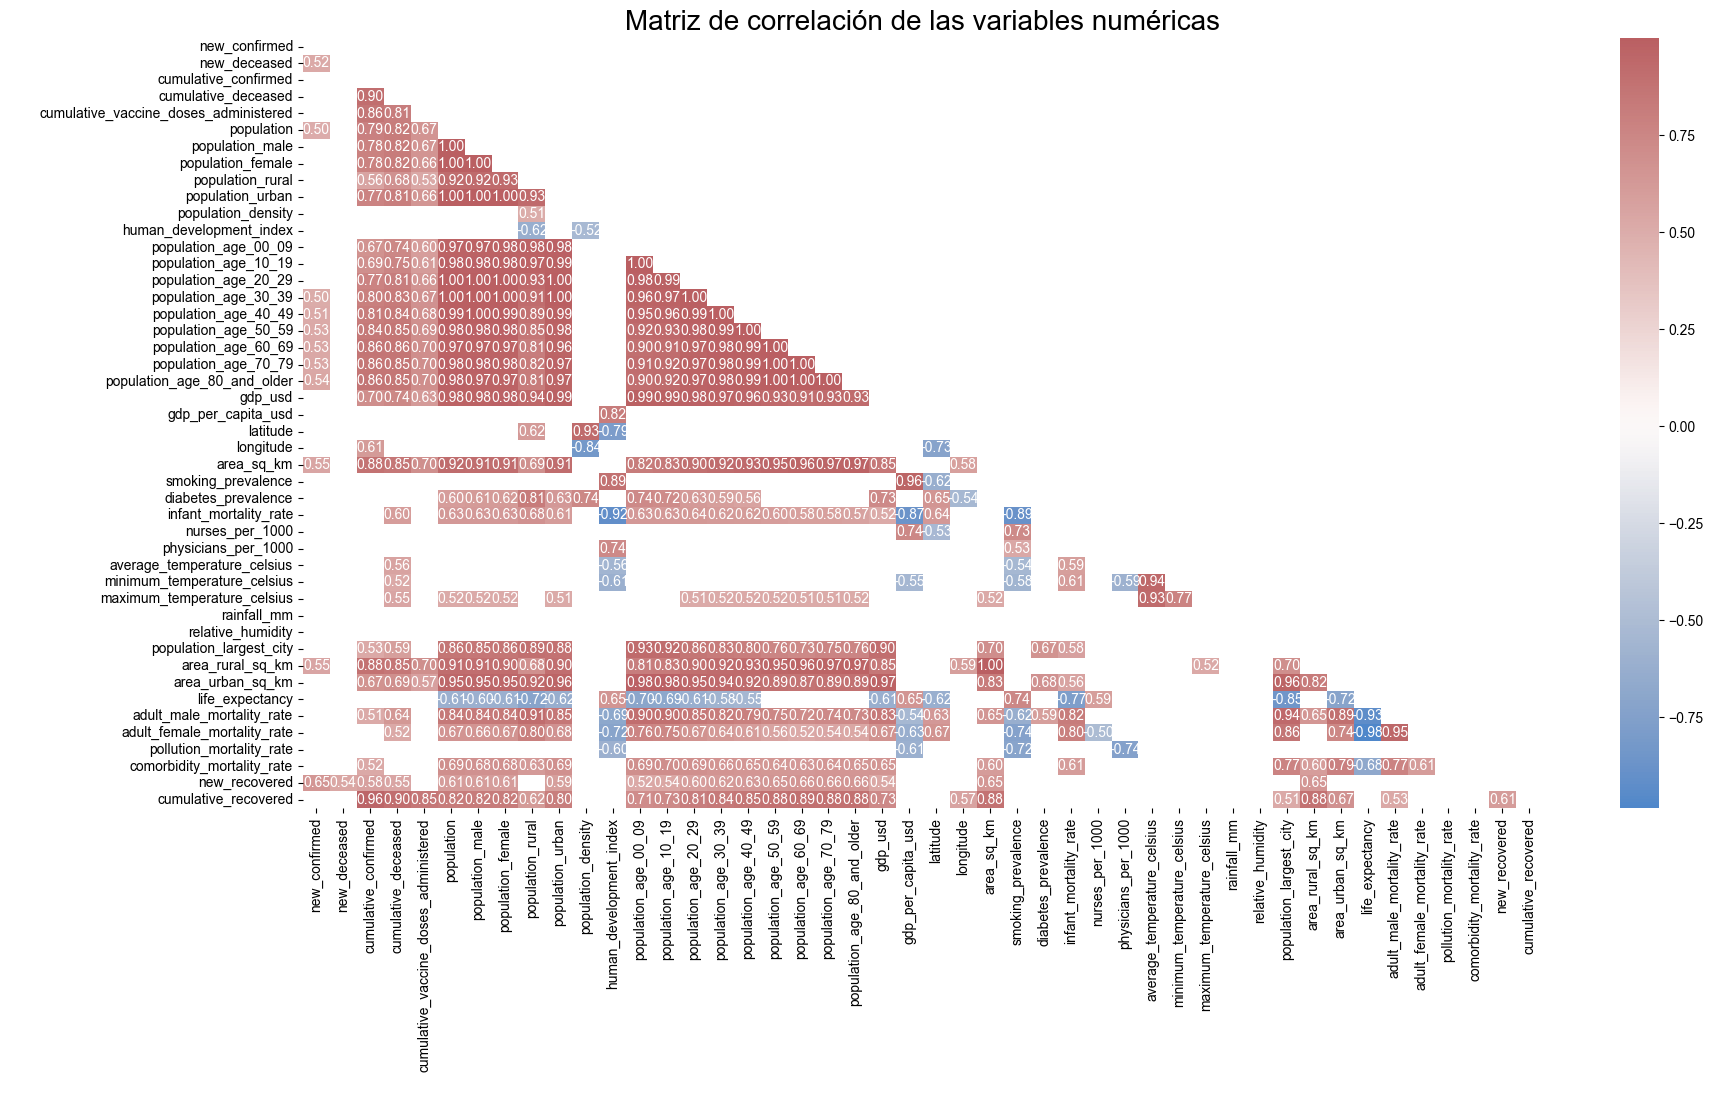

In [32]:
#se solicita: "Matriz de correlación, trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5"
#Con este gráfico, podemos tener una visión general de como se van a correlacionar nuestras variables y vamos  poder hacer hincapié en aquellas con mayor inciendia para analisis futuros.

columnas_numericas = df_paises_filtrados.select_dtypes(include=['float64', 'int64']).columns #aseguramos estar tomando solo valores numericos
matriz_correlacion = df_paises_filtrados[columnas_numericas].corr() #creamos la correlación

mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool)) #creamos la máscara para que nos muestre solo el triangulo inferior de la matriz

matriz_correlacion = matriz_correlacion[abs(matriz_correlacion) > abs(0.5)] #para ayudarnos visualmente, ocultamos todos los valores de correlacion menores a 0.50 y mayores a -0.5

plt.figure(figsize=(20, 10)) #creo la figura, ajusto el tamaño del gráfico

heatmap = sns.heatmap(matriz_correlacion, mask= mascara, annot = True, cmap='vlag',fmt=".2f",alpha=0.8) #Se arma el mapa de calor que nos dará el gráfico de correlación

sns.set_style('darkgrid')
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

#En la gráfica anterior se presentan Las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un heatmap.

Generamos una matriz de correlación visualizada con un heatmap revelando correlaciones fuertes entre variables como:
•	Cumulative_confirmed y Cumulative_deceased
•	Cumulative_recovered y Cumulative_confirmed
•	GDP_per_capita_usd y Human_development_index
•	Area_urban_square_kilometer y Population_largest_city


Utilizamos gráficos de barras para explorar columnas como new_confirmed, new_deceased, population, population_male, population_female, population_rural, y population_urban. Observamos que Brasil destaca significativamente debido a su gran población.

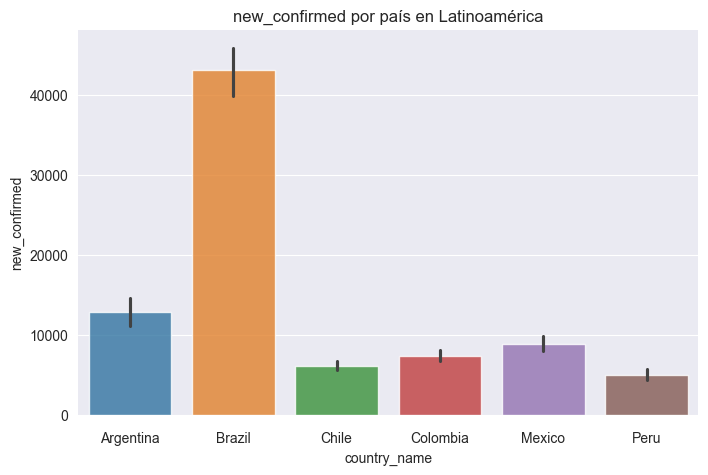

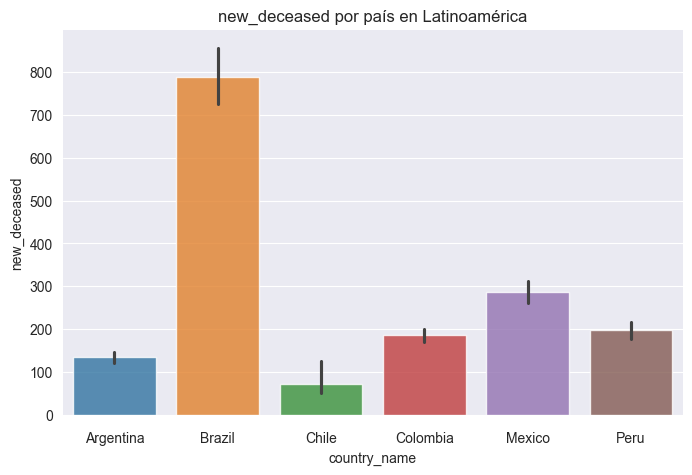

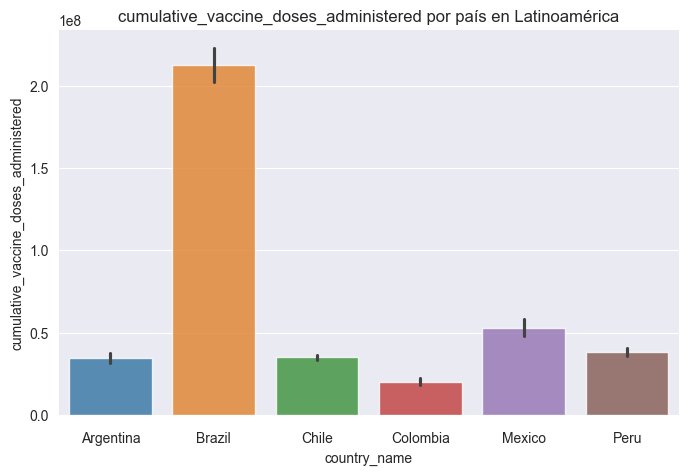

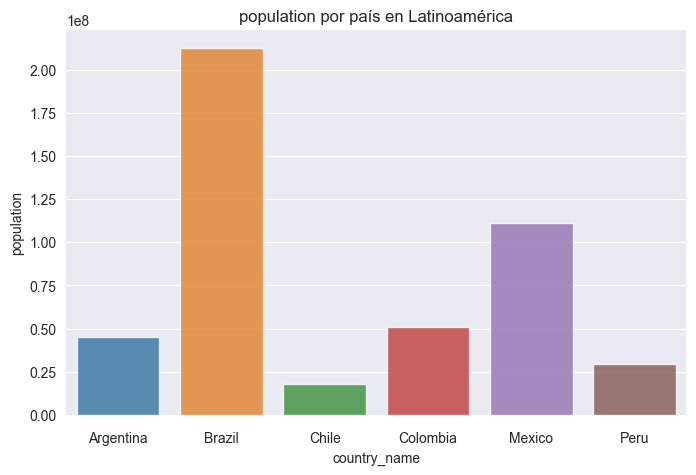

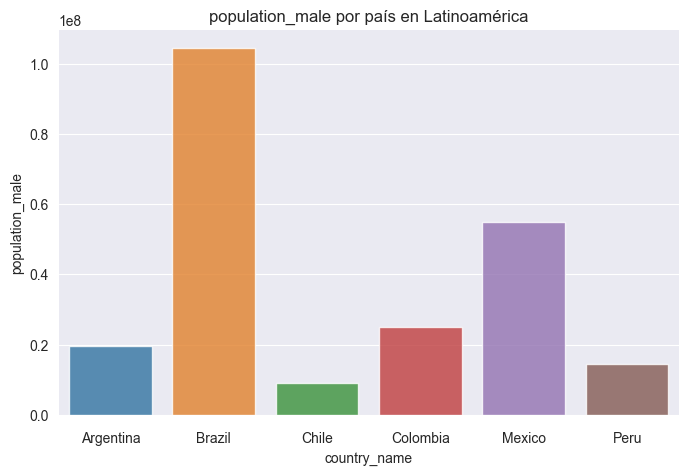

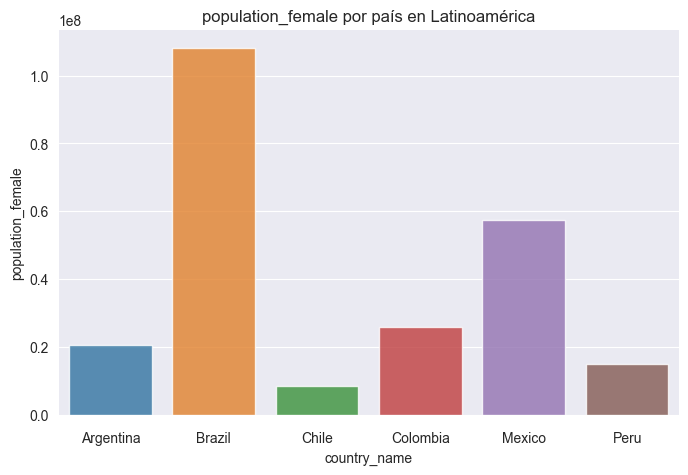

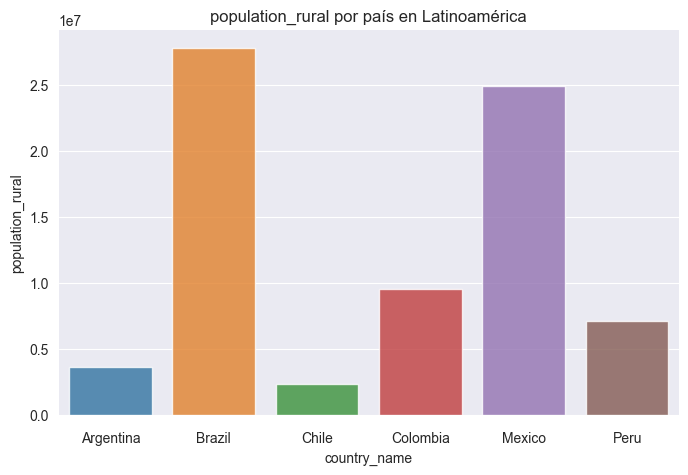

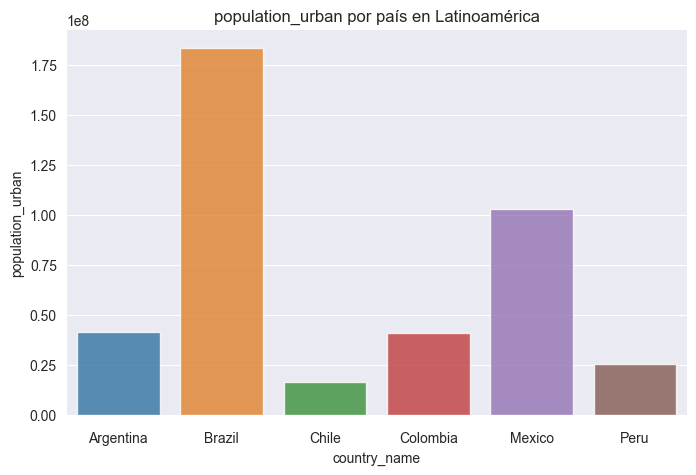

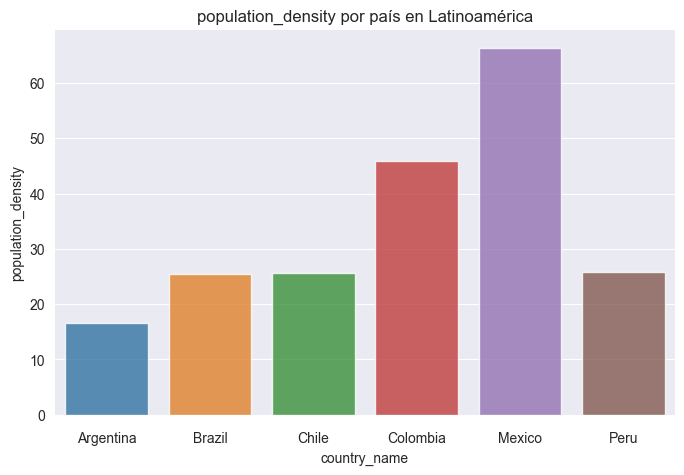

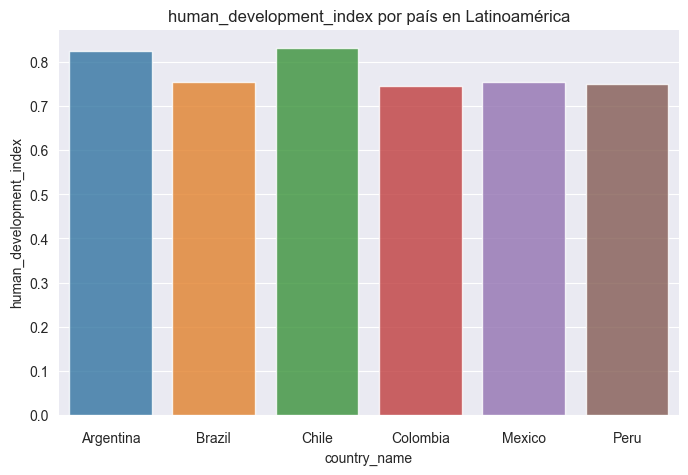

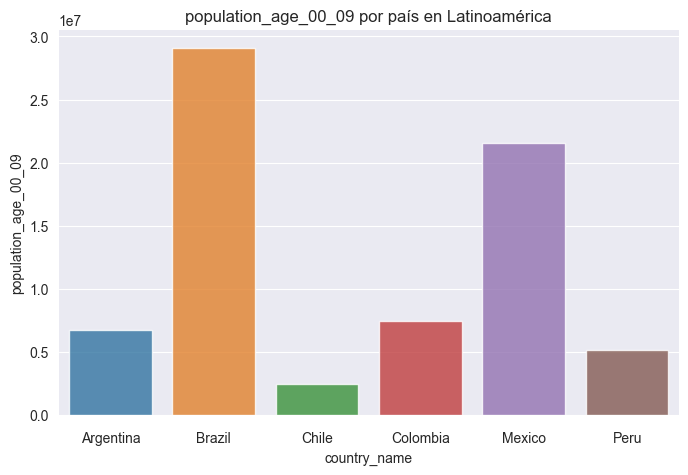

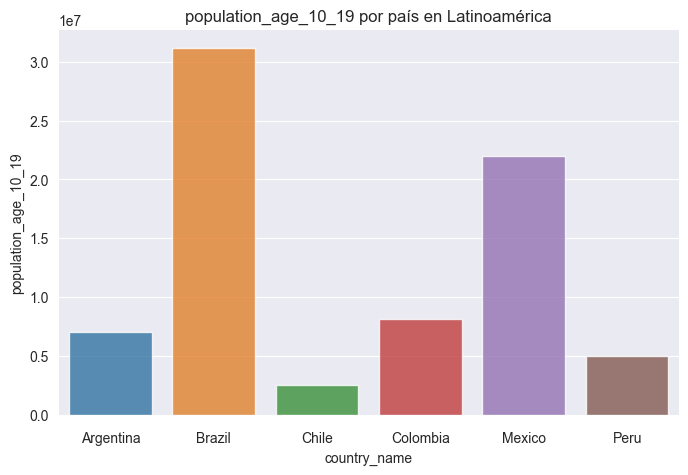

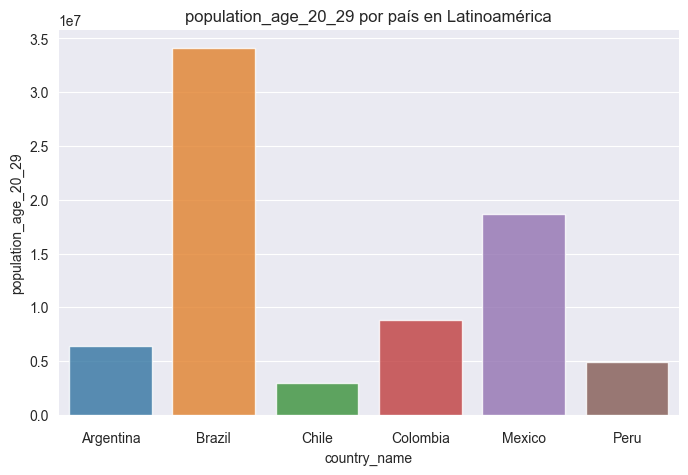

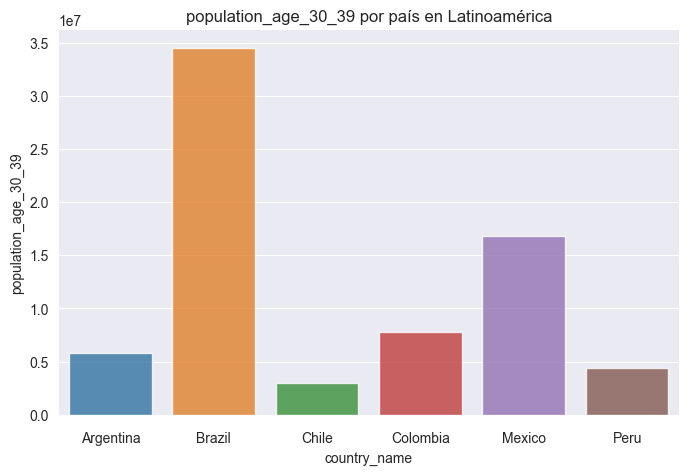

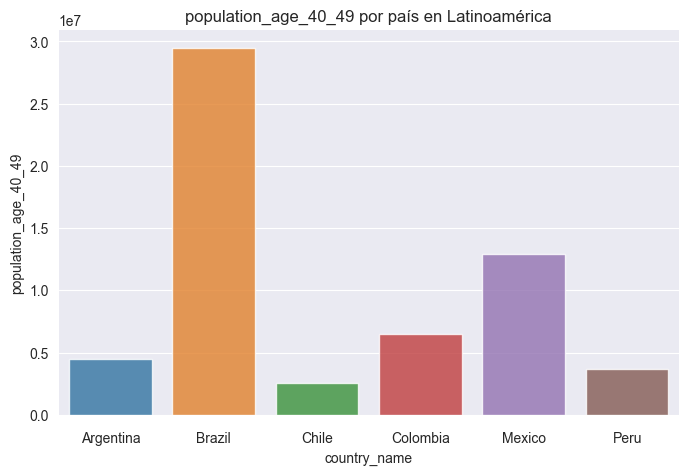

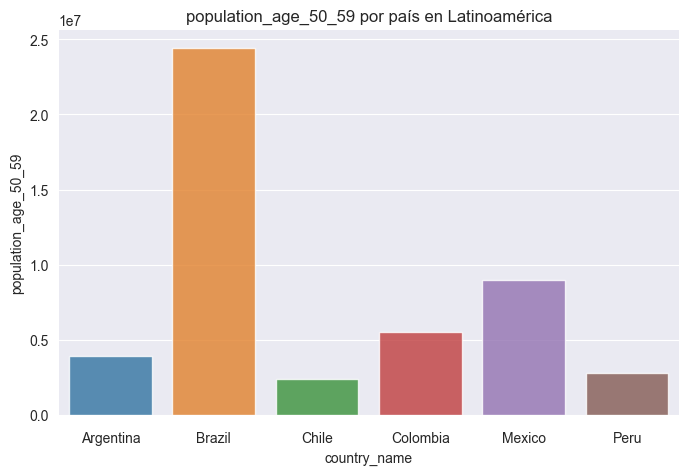

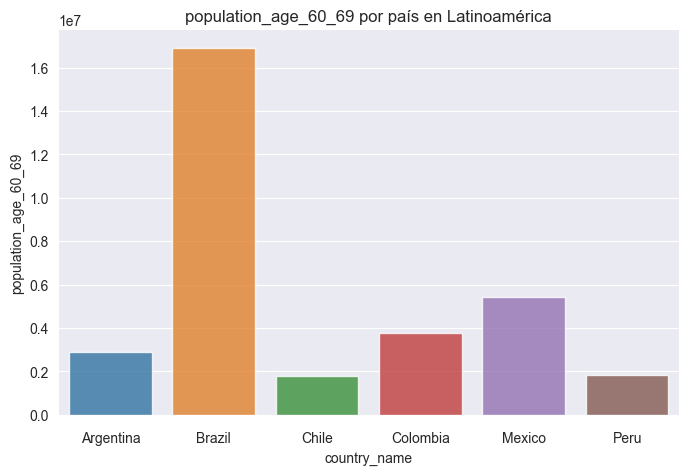

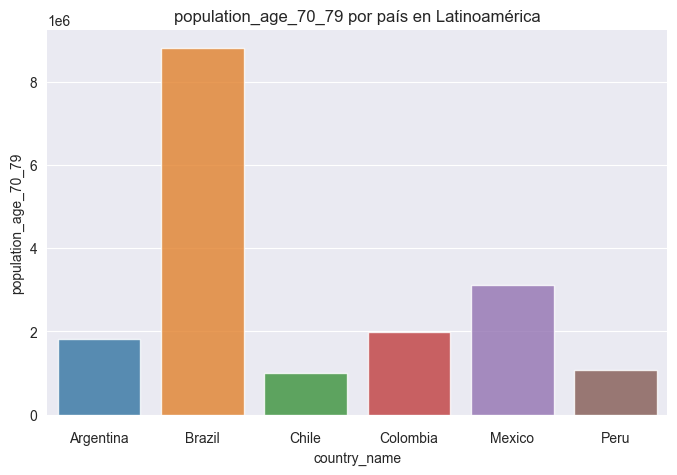

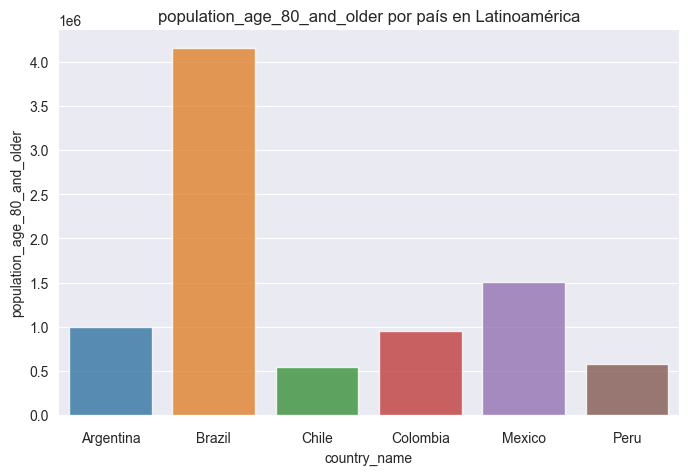

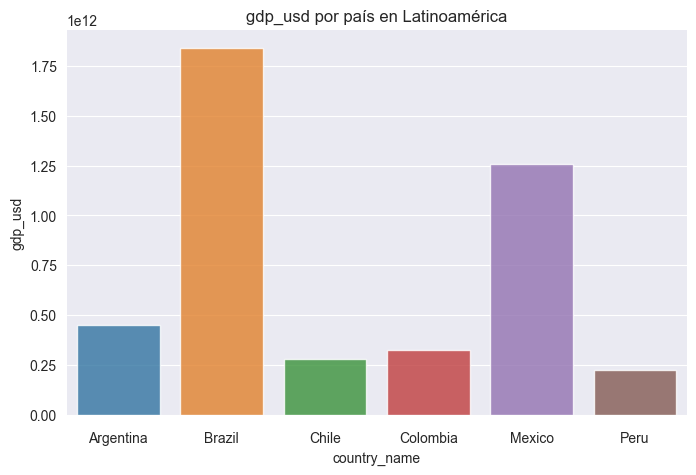

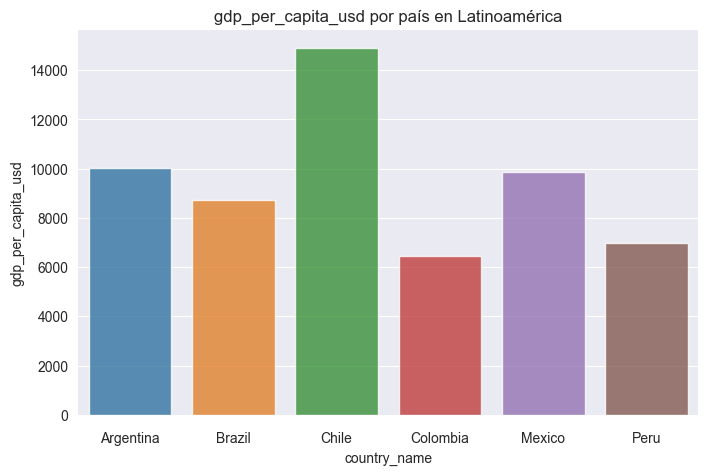

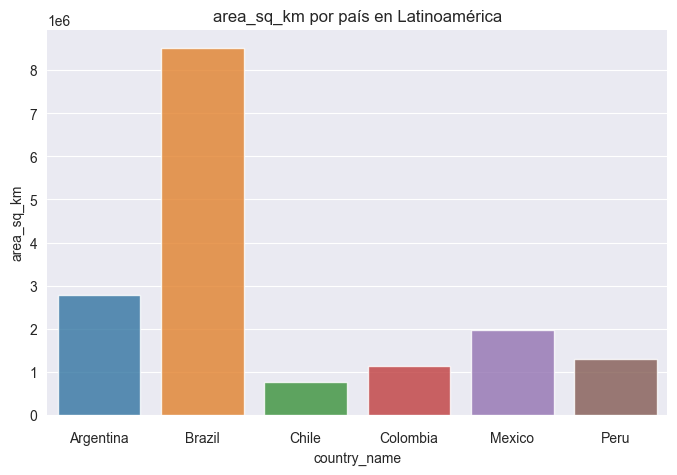

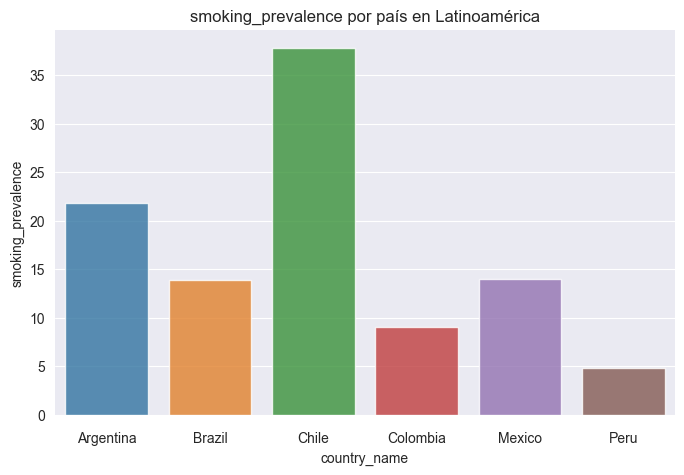

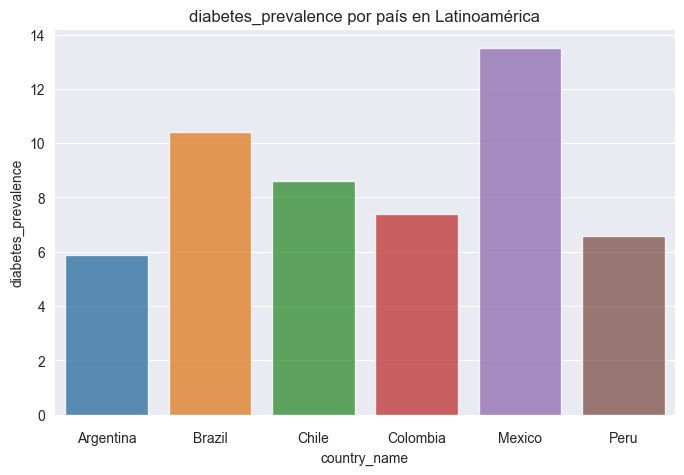

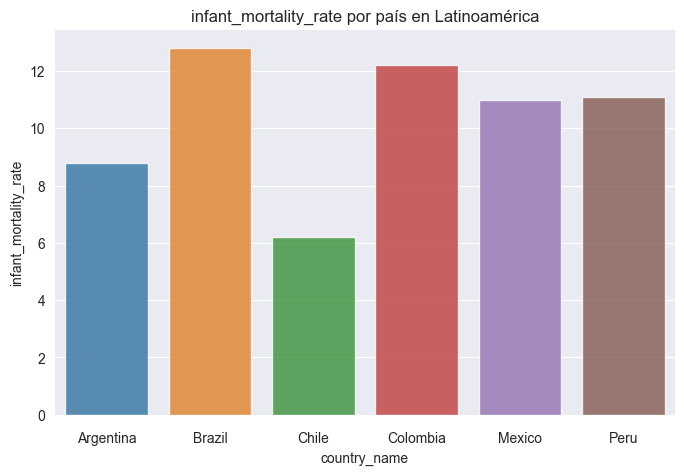

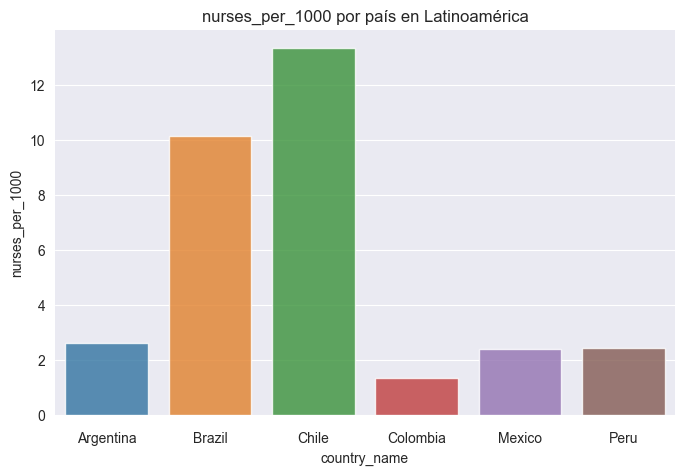

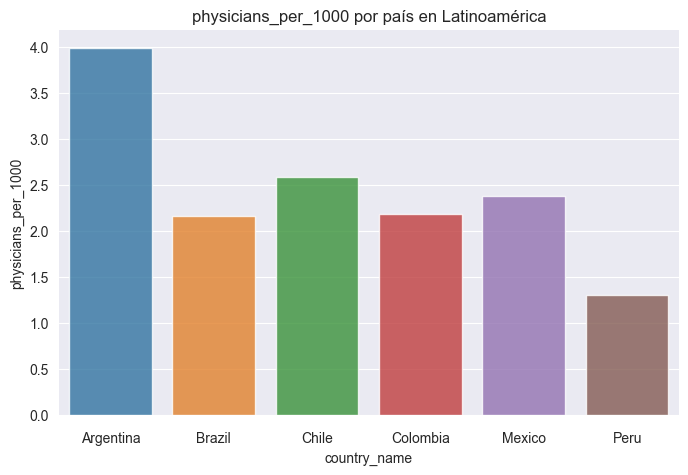

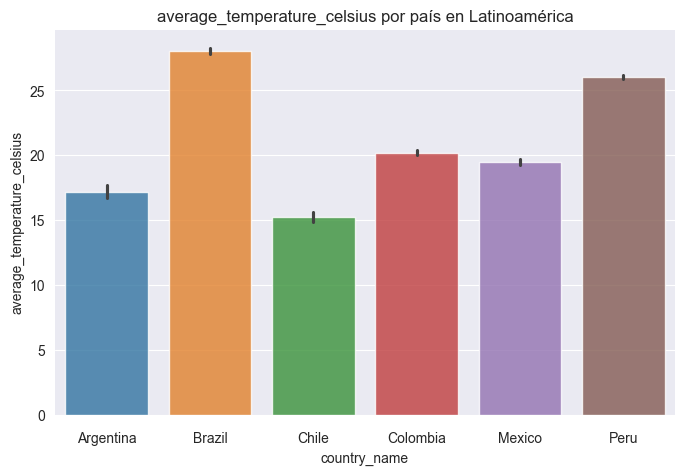

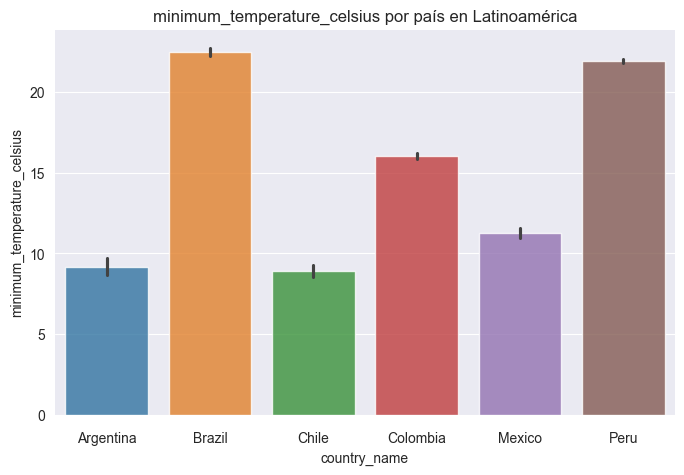

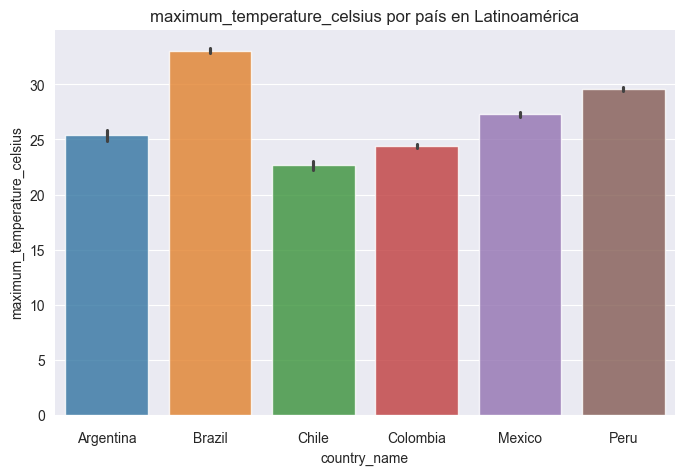

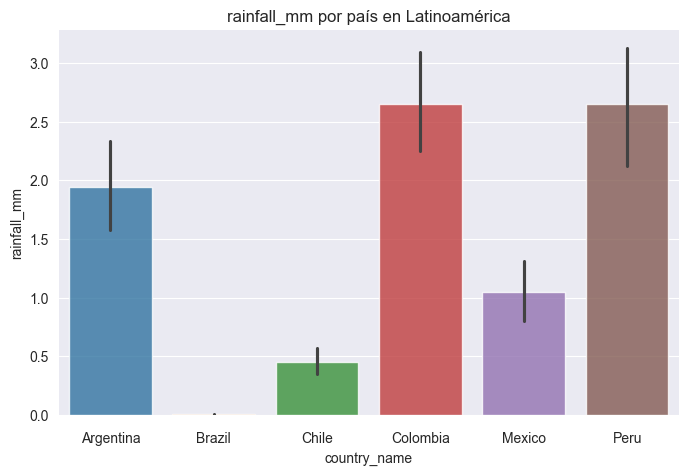

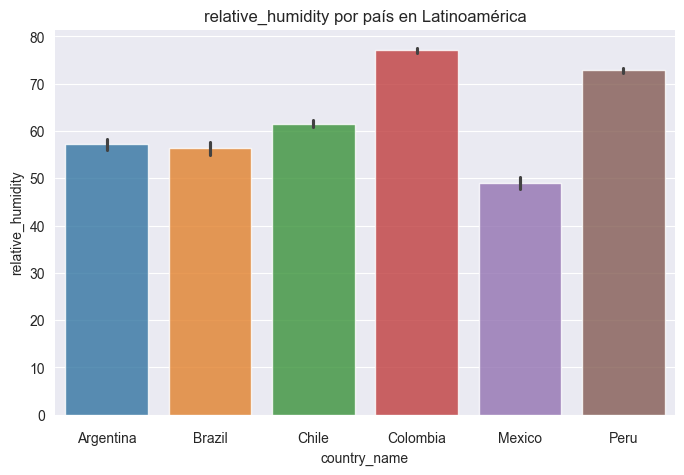

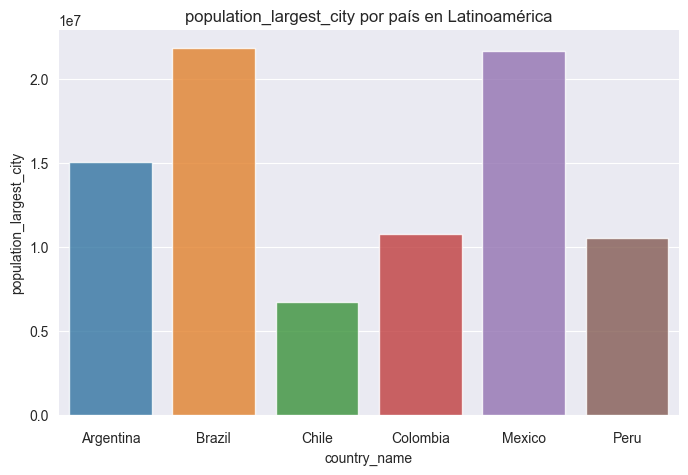

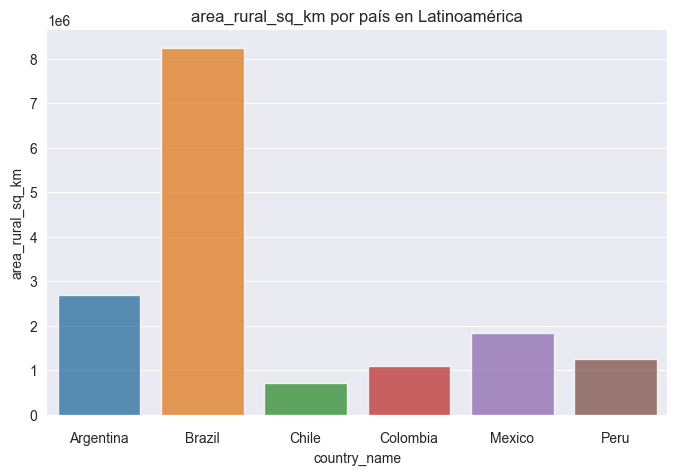

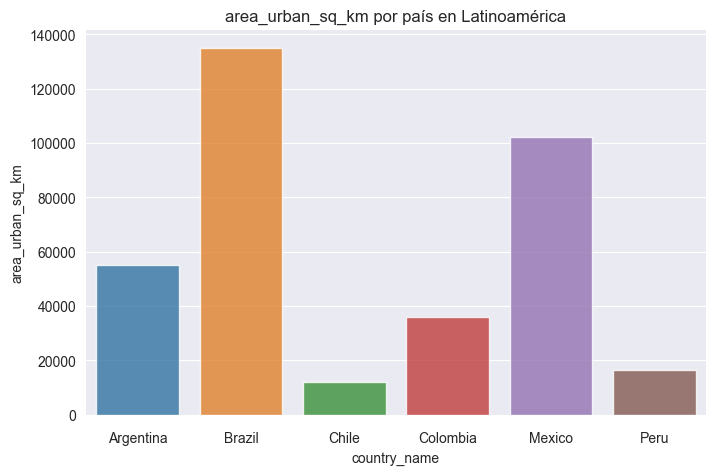

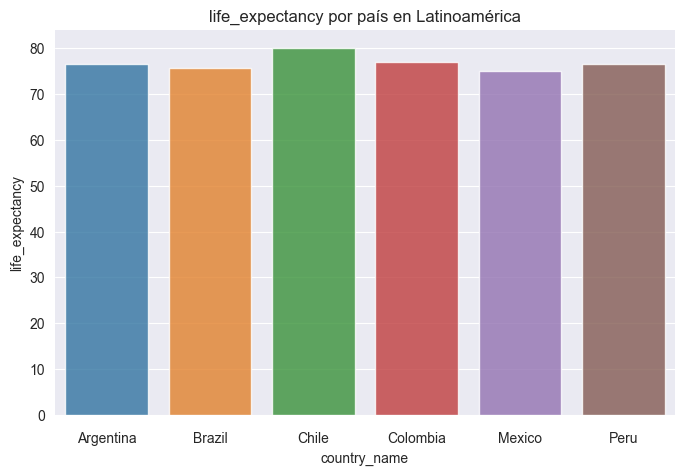

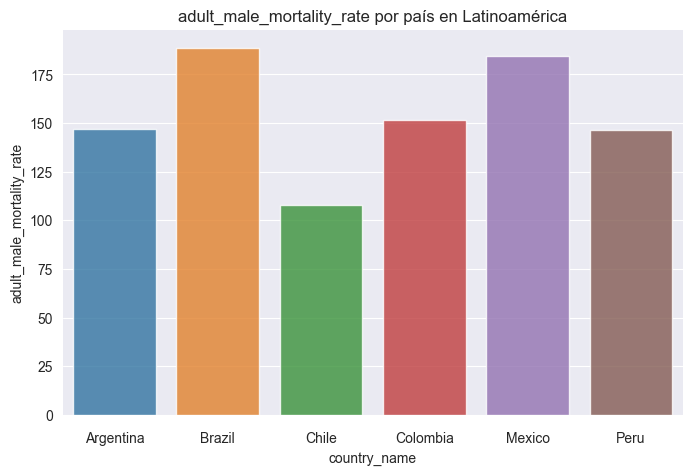

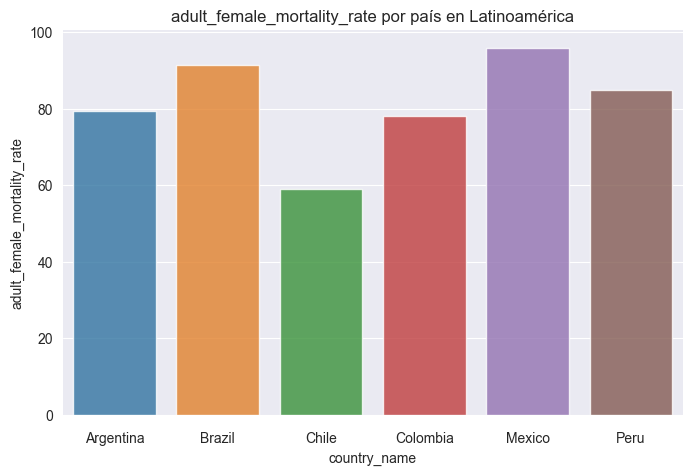

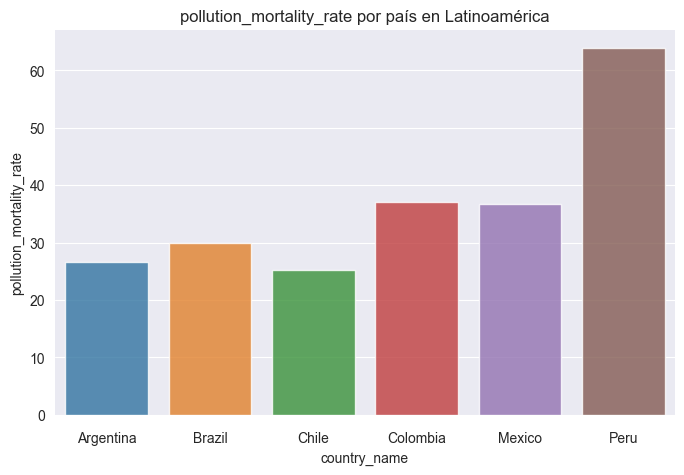

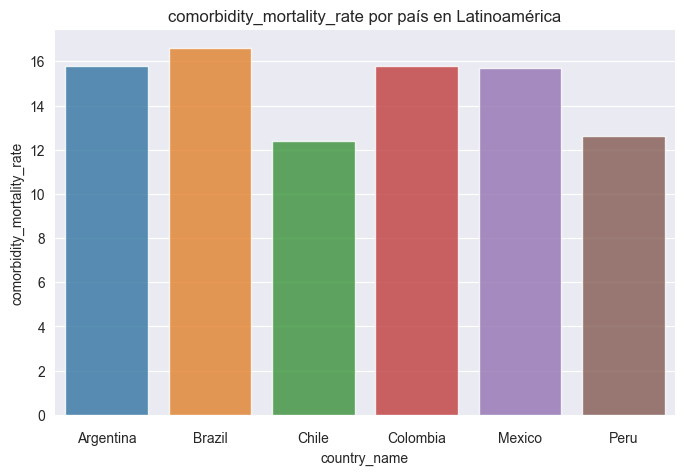

In [34]:
#Se solicita: "Gráficos de barras de países contra el resto de variables."

#iteramos sobre cada columna del dataframe
for i in df_paises_filtrados.columns:
    #si la columnas no es una de las siguientes=
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administrated','new_recovered']:
        fig, ax = plt.subplots(figsize=(8, 5)) #creo la figur y sus ejes, ajusto el tamaño del gráfico
        sns.barplot(x='country_name', y=i , data = df_paises_filtrados, ax=ax,hue='country_name', alpha=0.8) #se crea a traves de seaborn un grafico de barra vertical
        sns.set_style('darkgrid')
        sns.despine(left=True,offset=5,trim=True)
        plt.title(f'{i} por país en Latinoamérica')
        plt.show()


De estas gráficas pudimos ver que Brasil y México son los países de mayor población y que podrían representar un mercado prometedor, que México y Colombia son los países con mayor densidad de población.
Por otra parte, Chile sobresale con su PBI per cápita, por lo que no debería dejar de ser tenido en cuenta, lo mismo que Argentina. Argentina es el país con mayor tasa de médicos cada 1000 habitantes y de enfermeros son Chile y Brasil respectivamente.


También generamos gráficos histplot para analizar algunas columnas, como ‘cumulative_confirmed’, que nos muestra una distribución altamente asimétrica con una gran dispersión y la presencia de varios outliers.

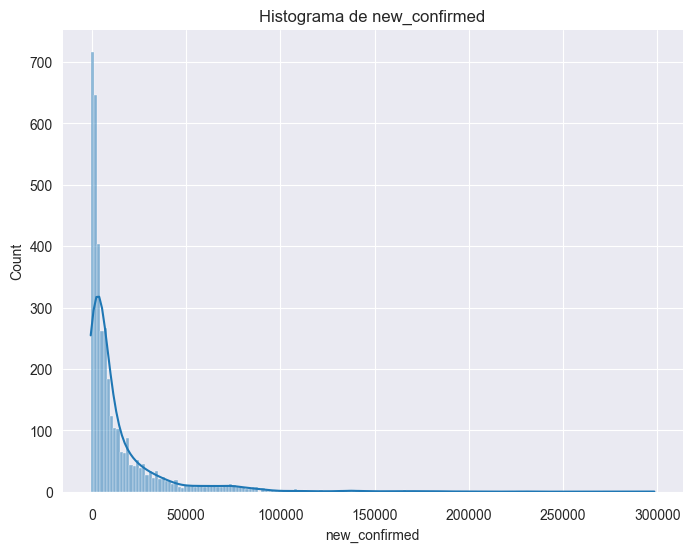

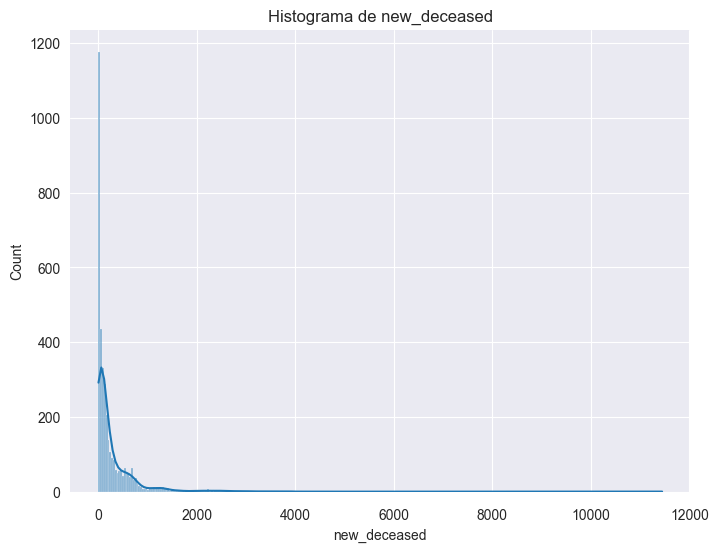

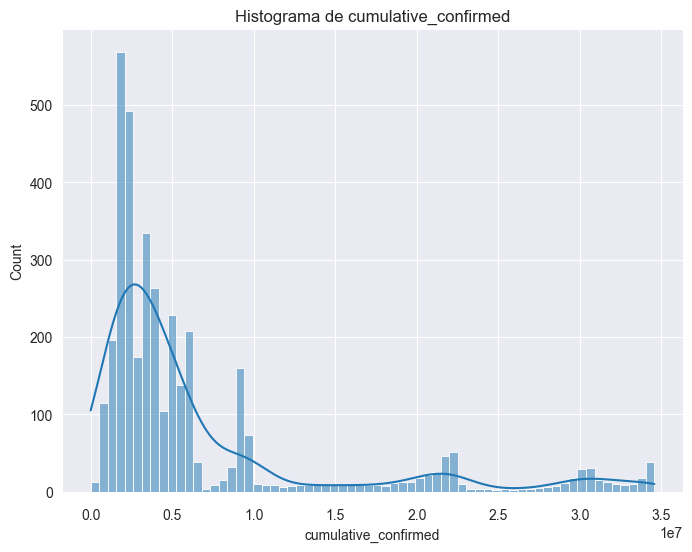

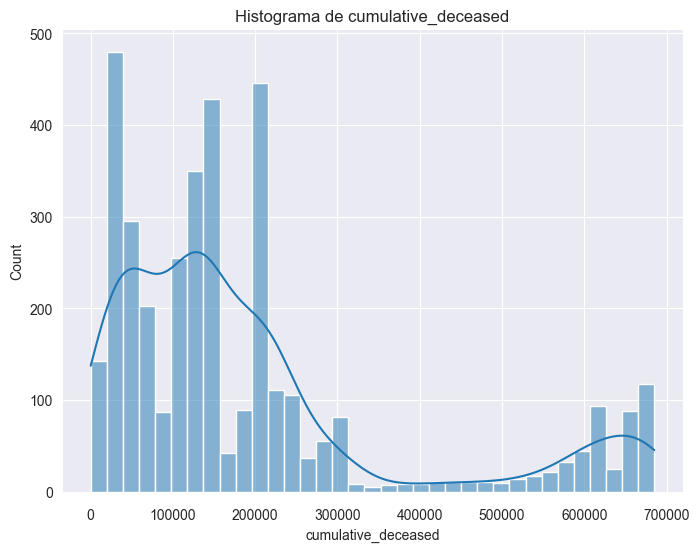

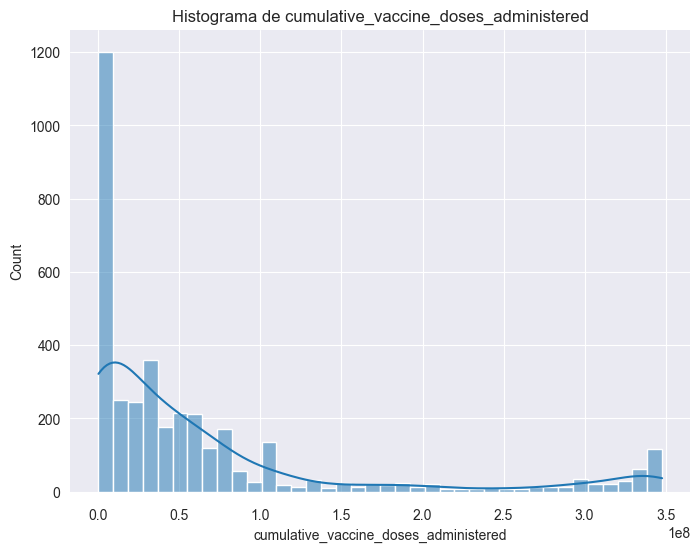

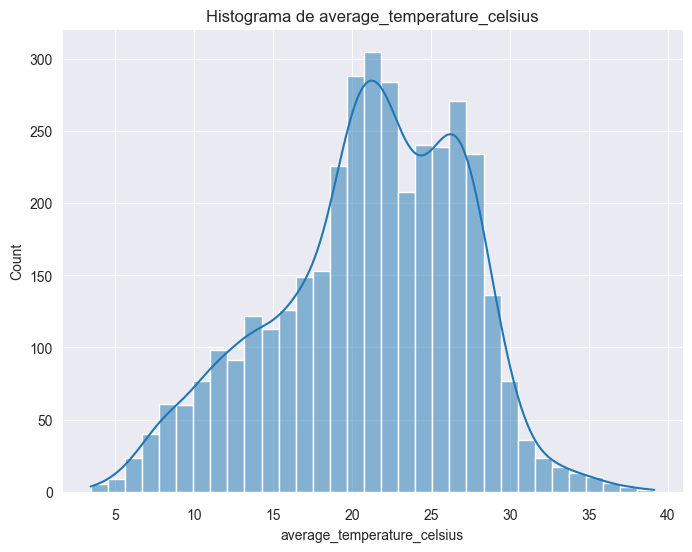

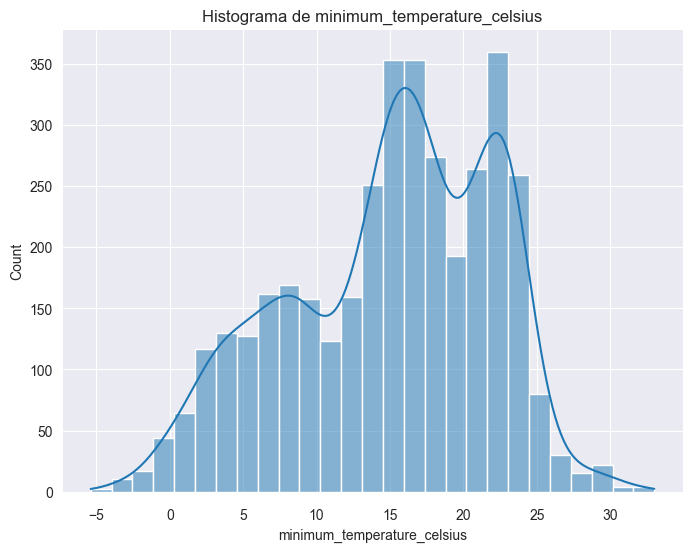

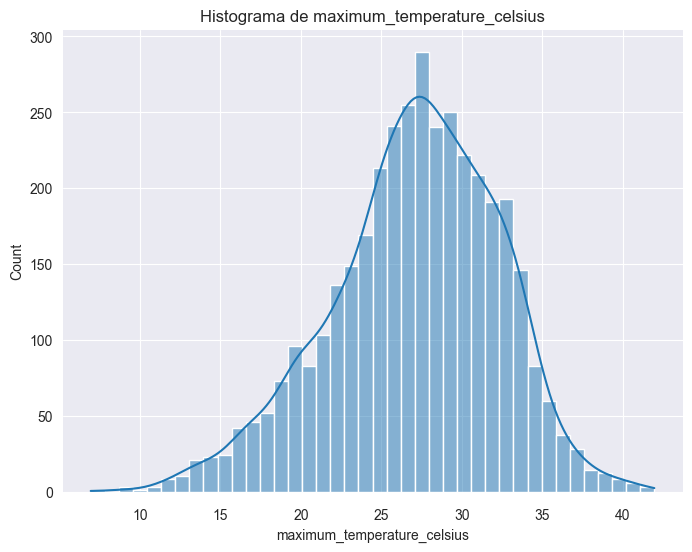

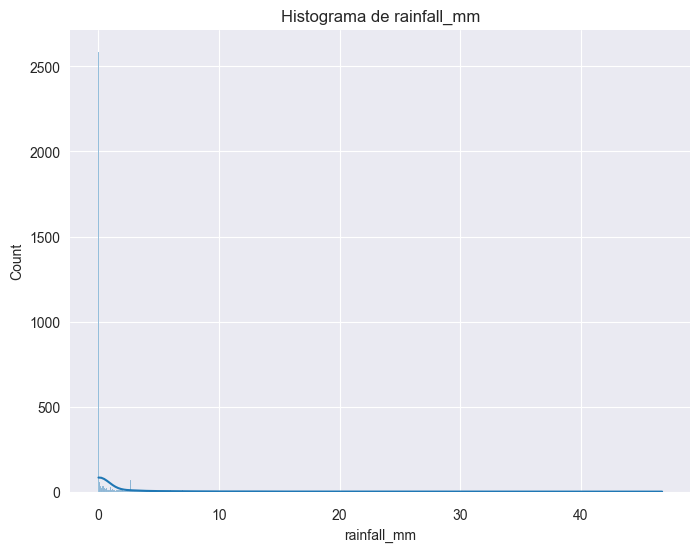

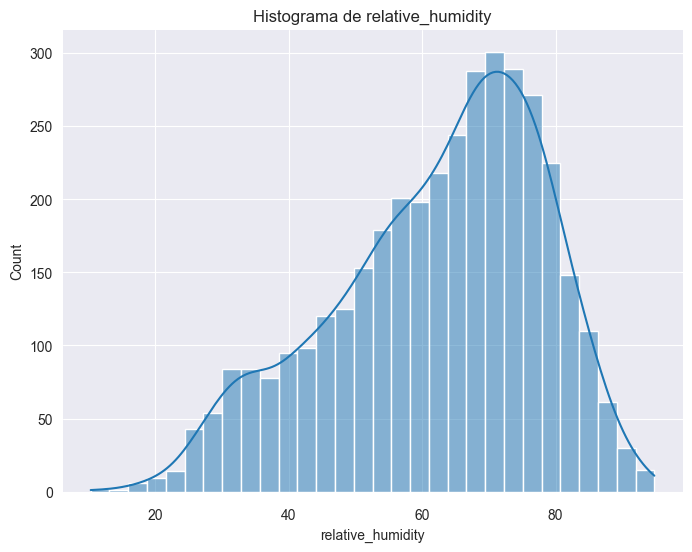

In [35]:
#Se solicita: "Histogramas de las variables que “Sí” tenga cambios de valores"

#Defino las columnas que me interesa gráficar el histograma
columnas_histograma = ['new_confirmed','new_deceased', 'cumulative_confirmed', 'cumulative_deceased','cumulative_vaccine_doses_administered','average_temperature_celsius','minimum_temperature_celsius', 'maximum_temperature_celsius','rainfall_mm','relative_humidity']

#Se repite el proceso con un ciclo for pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos.Creo el ciclo for que itere de a una columna y genere un histograma 
for i in df_paises_filtrados[columnas_histograma]:
    fig, ax = plt.subplots(figsize=(8,6)) #creo la figura y sus ejes, ajusto el tamaño del gráfico
    sns.histplot(data=df_paises_filtrados[i], kde=True)
    sns.set_style
    sns.despine(left=True,offset=5,trim=True)
    plt.title(f'Histograma de {i}')
    plt.show()

Procederemos a realizar un analisis enfocados en algunas variables específicas, para analizar la variable average_temperature y la variable new_confirmed, con el fin de tratar de entender el comportamiento de los casos respecto a la temperatura.

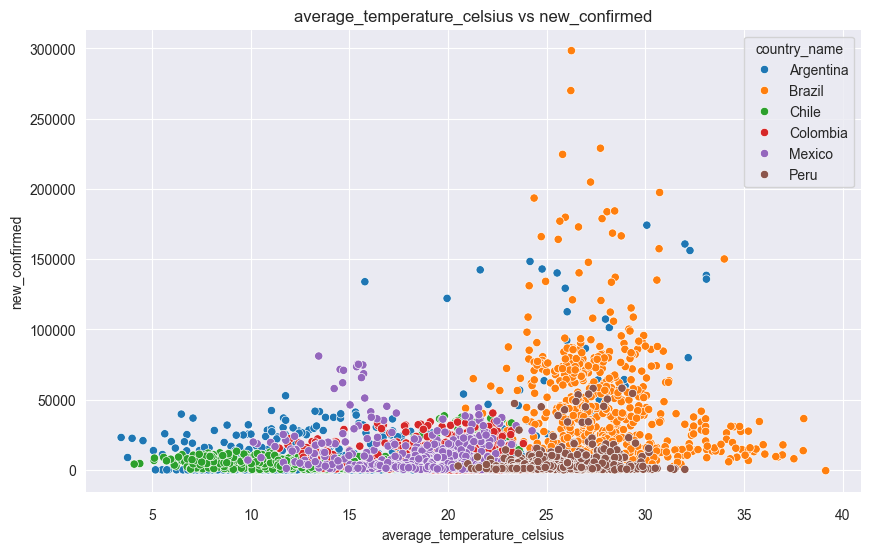

In [36]:
#Se solicita: "Diagrama de dispersión de la temperatura media contra los casos confirmados"

fig, ax = plt.subplots(figsize=(10,6)) #creo la figura y sus ejes, ajusto el tamaño del gráfico
sns.scatterplot(x='average_temperature_celsius',y='new_confirmed',data=df_paises_filtrados, hue='country_name') #creo el grpafico de dispersión
plt.title('average_temperature_celsius vs new_confirmed')
sns.set_style
sns.despine(left=True,offset=5,trim=True)

plt.show()

De este gráfico podemos observar que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo, en otros países si se puede observar una relación entre la temperatura y la cantidad de casos confirmados.

Como vimos que la temperatura tiene alguna relación con los casos confirmados, vamos a realizar un análisis de la temperatura promedio con la cantidad de muertes.

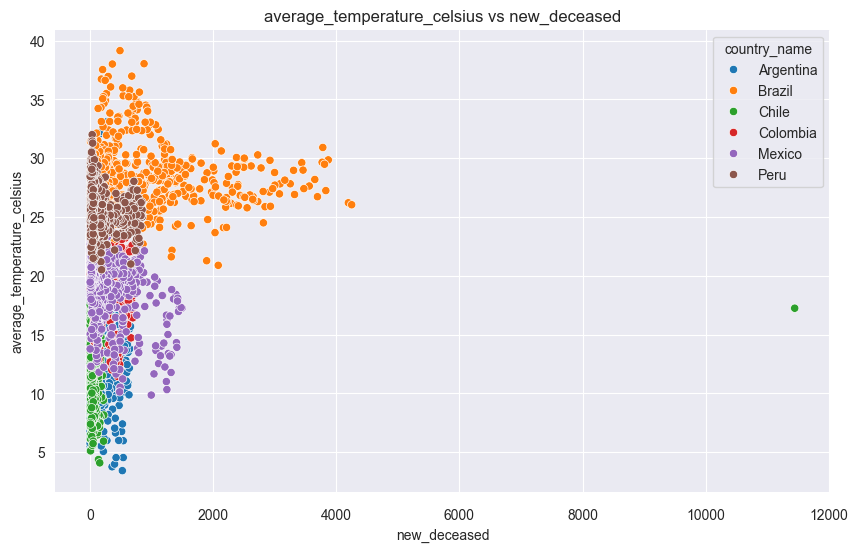

In [37]:
#Se solicita: "Diagrama de dispersión de la temperatura media contra las muertes confirmadas."

#se repite la gráfica anterior, pero se modifica la variable de interés.

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(y='average_temperature_celsius',x='new_deceased',data=df_paises_filtrados, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
sns.set_style
sns.despine(left=True,offset=5,trim=True)

plt.show()

En la grafica  se puede apreciar un comportamiento similar al de los casos confirmados, en algunos países la temperatura no influye en la cantidad de muertes, sin embargo, en otros países si se puede observar una relación entre la temperatura y la cantidad de muertes.

Ahora si veamos como se comportan las variables en un estudio longitudinal, es decir a lo largo del tiempo.

Por lo tanto, se hace una primera aproximación y observaremos las dosis administradas por mes en todos los países.

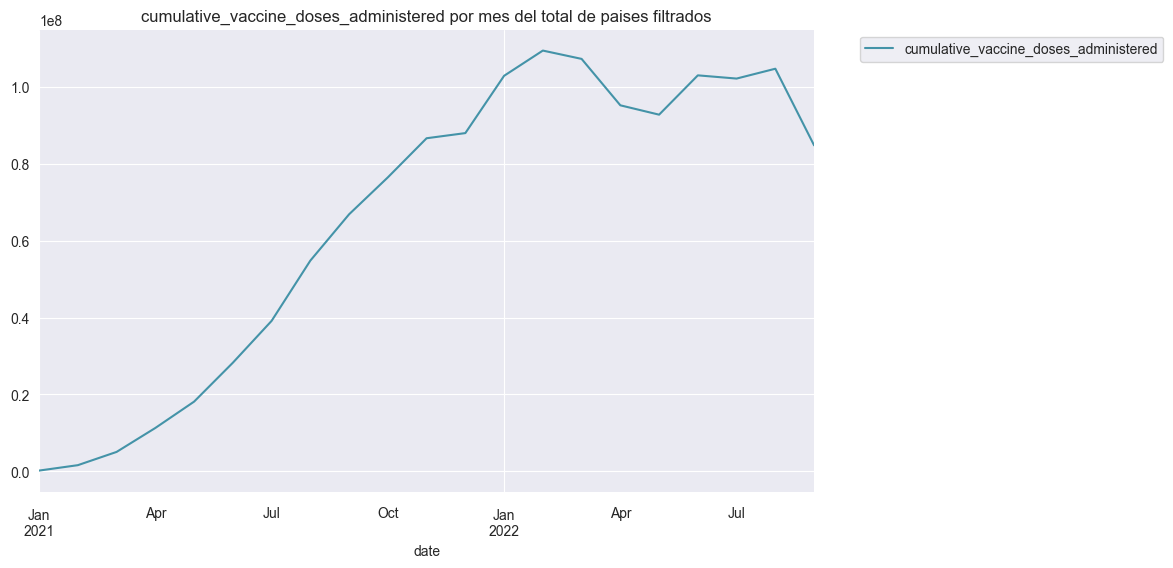

In [39]:
#Se solicita: "Comportamiento de las dosis administradas de todos los países (Valor medio).""
 
fig, ax = plt.subplots(figsize=(10,6)) #creo la figura y sus ejes, ajusto el tamaño del gráfico

#En esta primer línea estamos "reconfigurando" los datos y pidiendole que agrupe por la media de la columna de manera mensual
df_paises_filtrados.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot(color='#4493A8') 
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes del total de paises filtrados')
sns.set_style
sns.despine(left=True,offset=5,trim=True)

plt.show()


Procedemos hacer un gráfico más detallado por la evolución de dosis administradas por mes de cada país

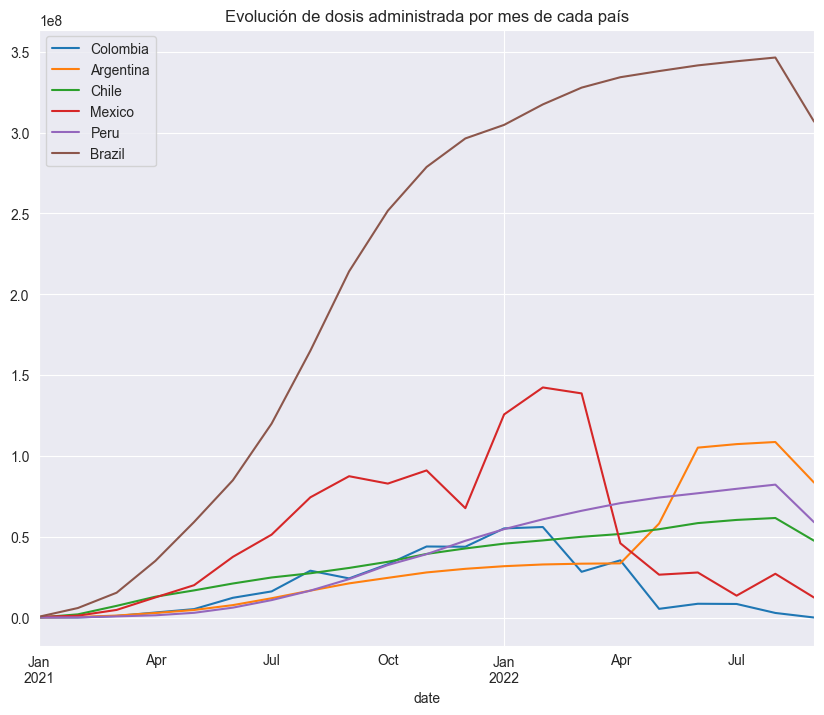

In [46]:
#Se solicita "Evolución de dosis administradas por mes de cada país"
#Lista los nombres de países que me interesa
paises_6 = ['Colombia','Argentina','Chile','Mexico','Peru','Brazil']

fig, ax = plt.subplots(figsize=(10,8) )#creo la figura y sus ejes, ajusto el tamaño del gráfico

# Bucle para iterar sobre los países y trazar la evolución de dosis administradas por mes para cada uno
for i,pais in enumerate(paises_6):
    # Filtro el DataFrame para obtener solo los datos del país actual y luego realizar un promedio mensual de las dosis administradas
    df_paises_filtrados[df_paises_filtrados['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()


plt.title('Evolución de dosis administrada por mes de cada país') # Agrego tí0tulo al gráfico
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') # Agrego leyenda al gráfico, ajustando la posición
plt.legend(paises_6) # Agrego leyenda con los nombres de los países



plt.show() #meustro el gráfico

Si realizamos un análisis  de las dosis administradas por mes en cada país, podemos observar que en algunos países la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo, sin embargo, en otros países la cantidad de dosis administradas ha ido disminuyendo. Esto puede ser debido a muchos factores, como la cantidad de vacunas disponibles, la cantidad de personas que se han vacunado, entre otros.

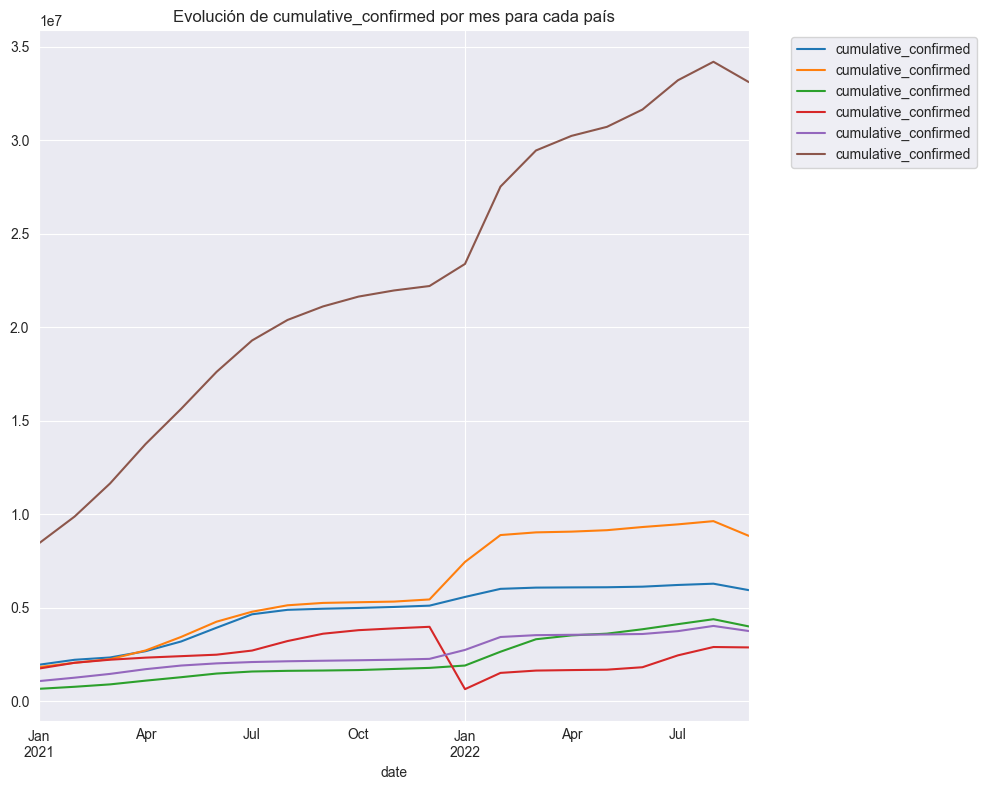

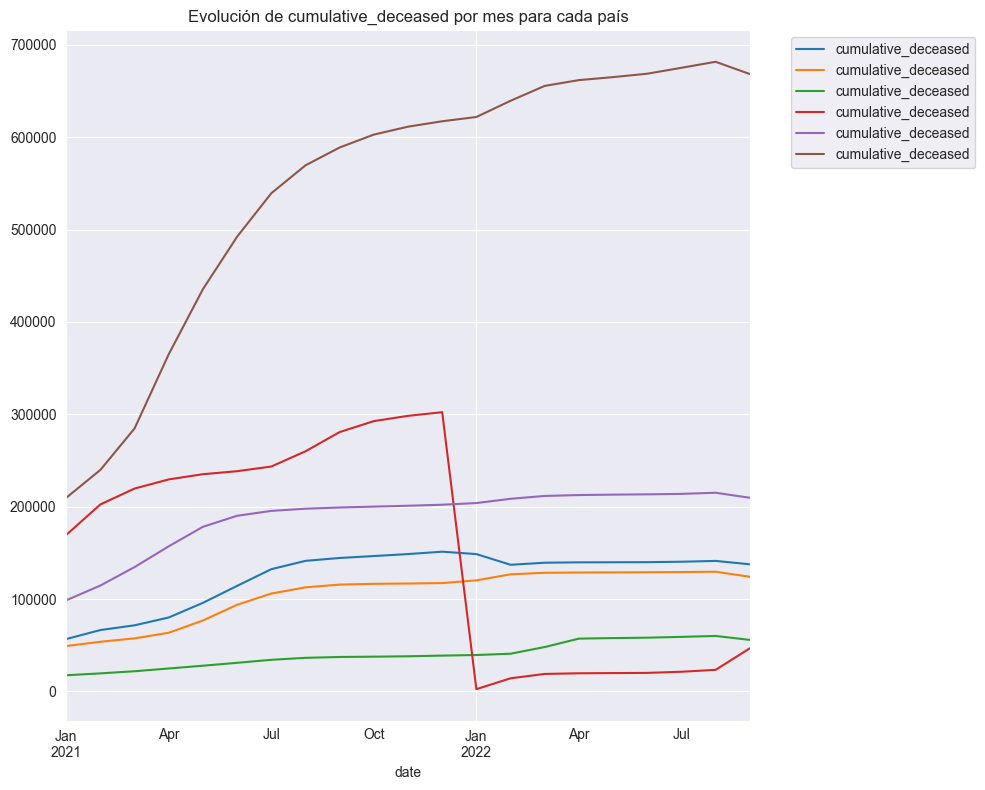

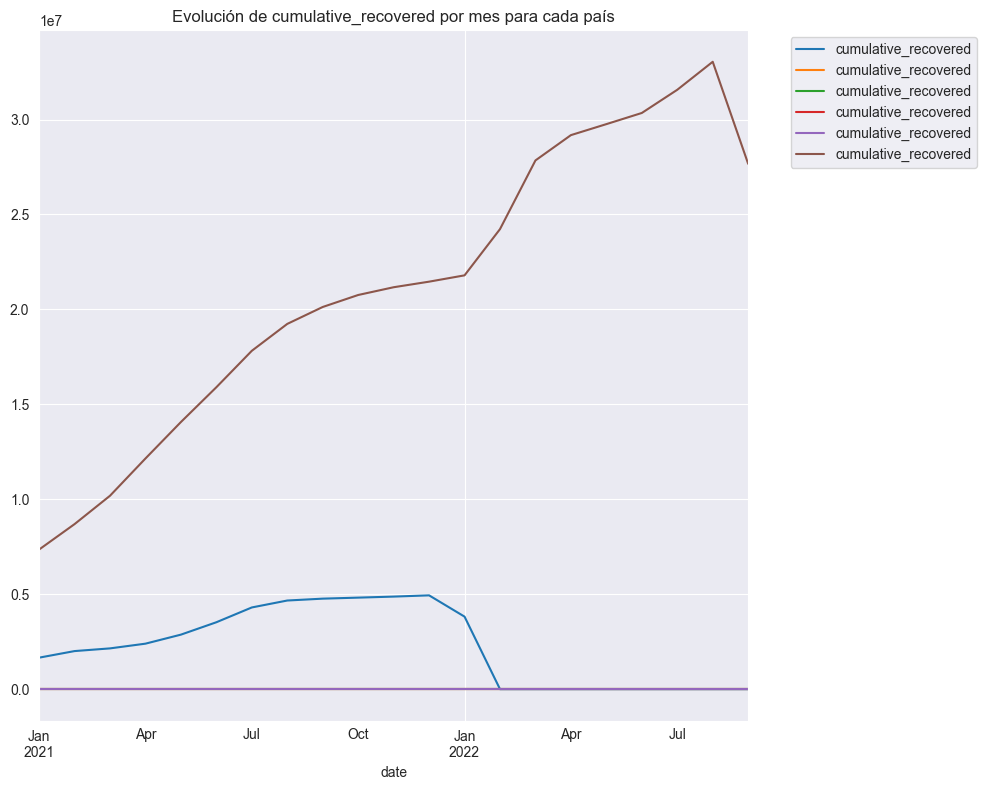

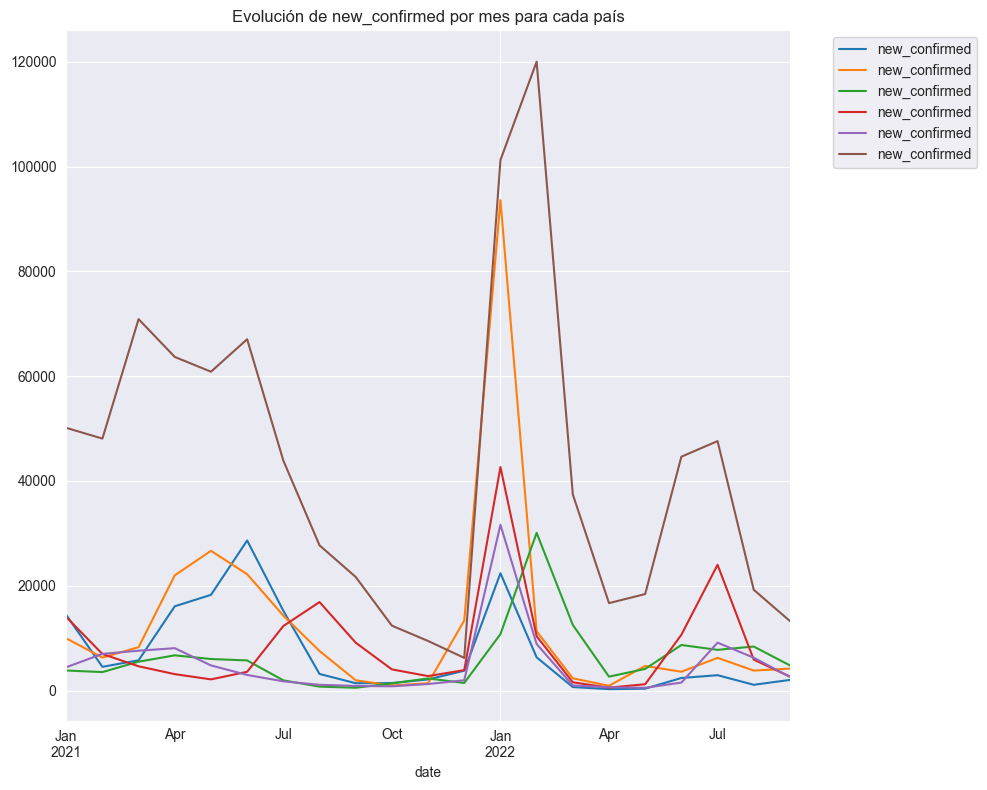

In [47]:
# Lista de columnas a graficar
columnas = ['cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'new_confirmed']

# Iterar sobre las columnas y crear una figura para cada una
for columna in columnas:
    fig, ax = plt.subplots(figsize=(10, 8))
    for i, pais in enumerate(paises_6):
        df_pais = df_paises_filtrados[df_paises_filtrados['country_name'] == pais]
        df_pais.resample('ME').mean(numeric_only=True)[columna].plot()

    # Configuración del gráfico actual
    ax.set_title(f'Evolución de {columna} por mes para cada país')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
  
    plt.show()

En el gráfico de la muerte en los países: el país con mas muertes ha tenido es Brasil, seguido de México, Colombia, Argentina, Perú y Chile. Sin embargo, esto no quiere decir que estos paises sean los que peor han manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

La disminución de casos en méxico puede ser una perdida de datos o una disminución real de casos, esto se puede analizar en un estudio posterior.

En el gráfico de casos confirmados: El país que más casos confirmados ha tenido es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Esto no quiere decir que manejaran peor la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.



Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

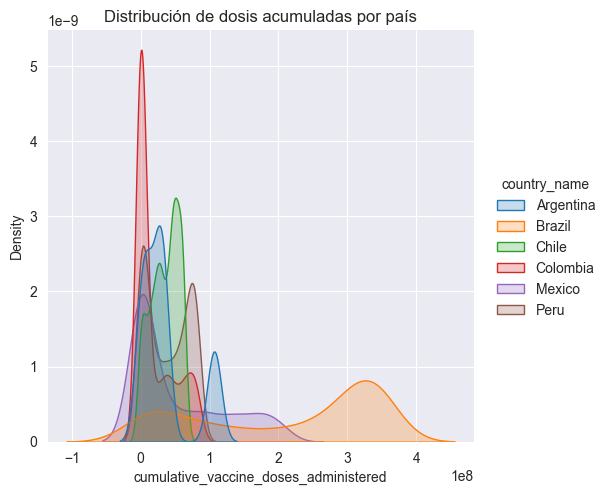

In [48]:
#Dosis acumuladas por país

sns.displot(df_paises_filtrados, x='cumulative_vaccine_doses_administered',hue='country_name', kind='kde', fill=True)
plt.title('Distribución de dosis acumuladas por país')

De los países que peor manejaron la pandemia fue Brasil, seguido de México, Colombia, Argentina, Perú y Chile, se puede observar que la cantidad de muertes y casos confirmados es mayor en estos países ademas de ser desproporcionada la cantidad de vacunas administradas.

In [49]:
df_paises_filtrados.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

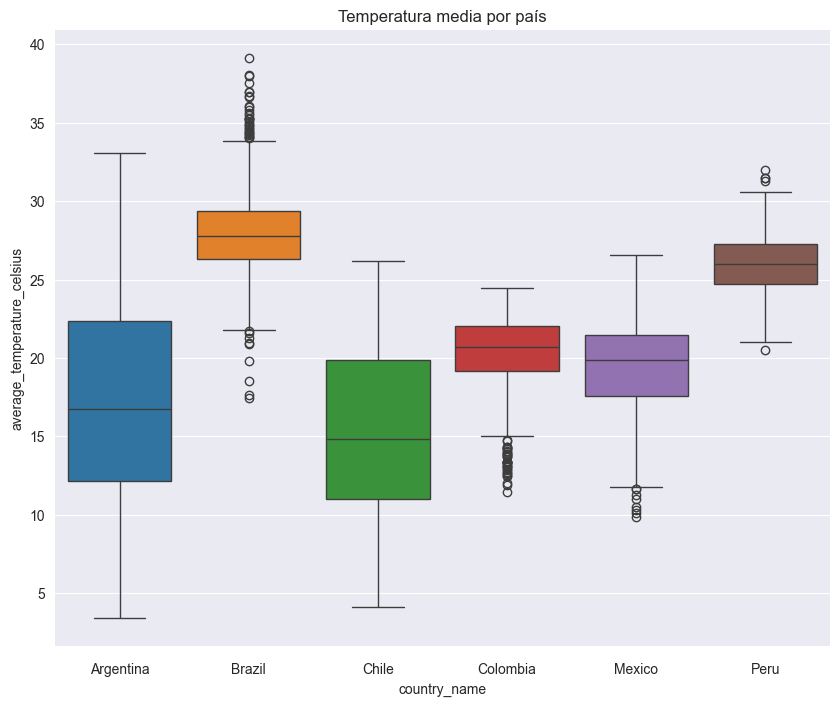

In [50]:
#Boxplot de temperatura media de cada país.

fig, ax = plt.subplots(figsize=(10,8))
sns.set_style('darkgrid')

sns.boxplot(df_paises_filtrados, x='country_name', y='average_temperature_celsius', hue='country_name')

sns.set_style('darkgrid')
sns.despine(left=True,offset=5,trim=True)
plt.title('Temperatura media por país')
plt.show()

Seguimos viendo como se comportan las variables de a traves de violinplots.

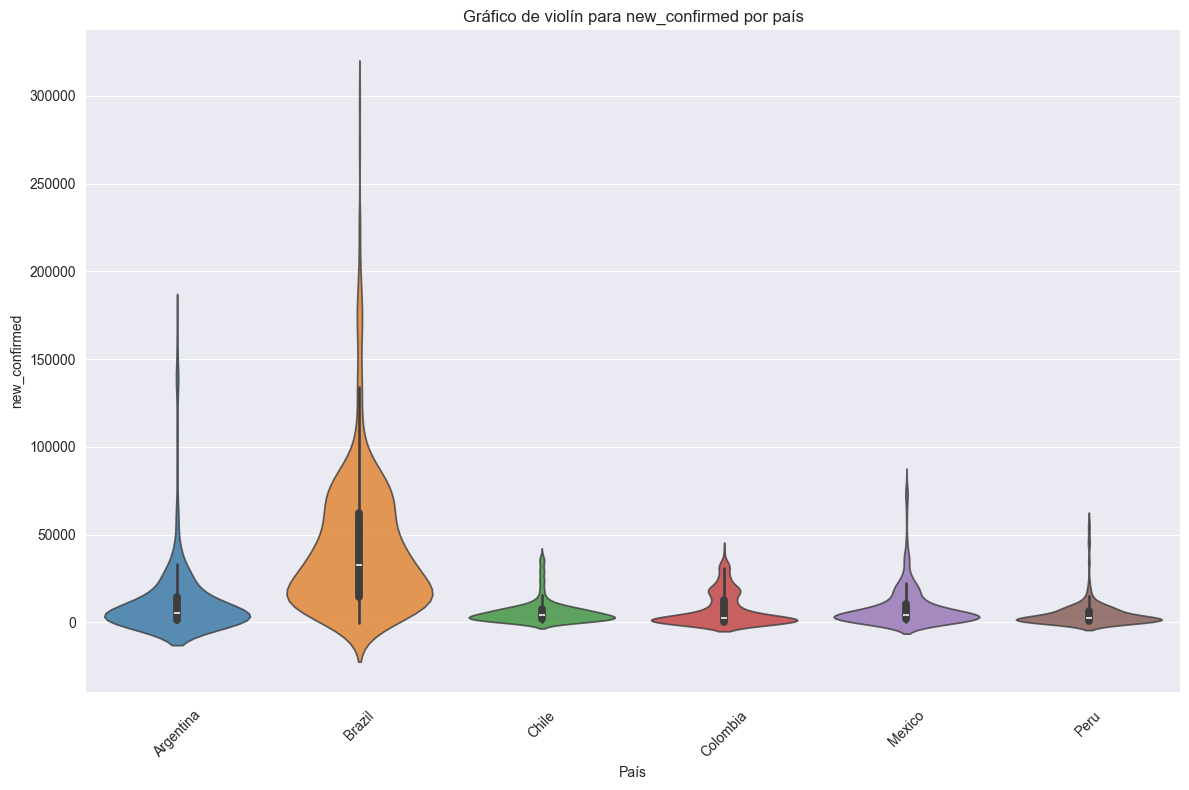

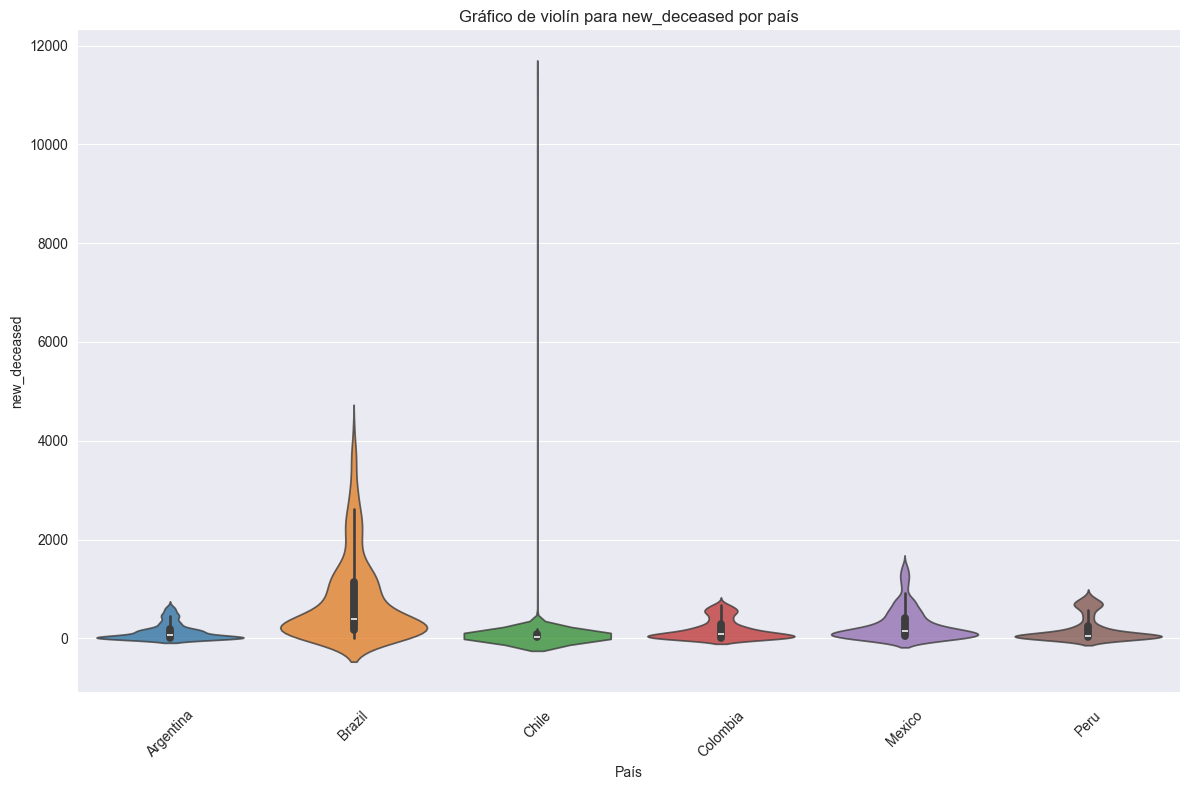

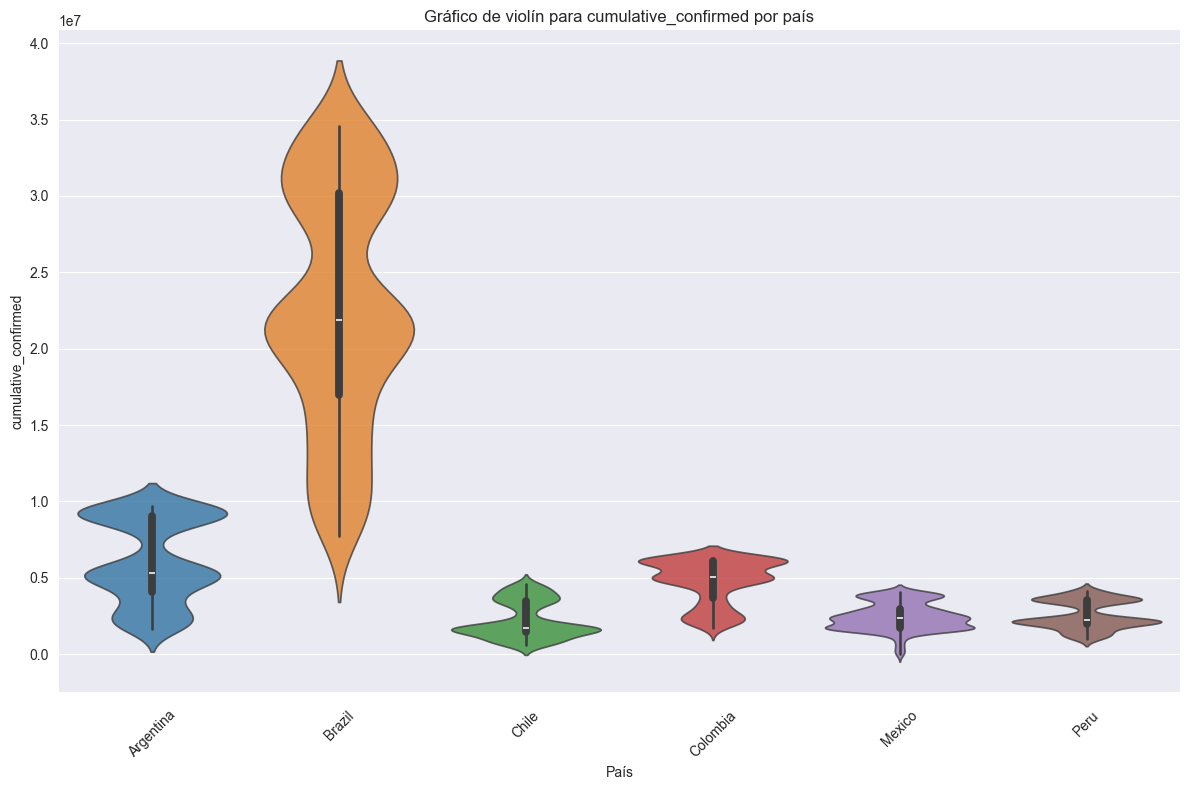

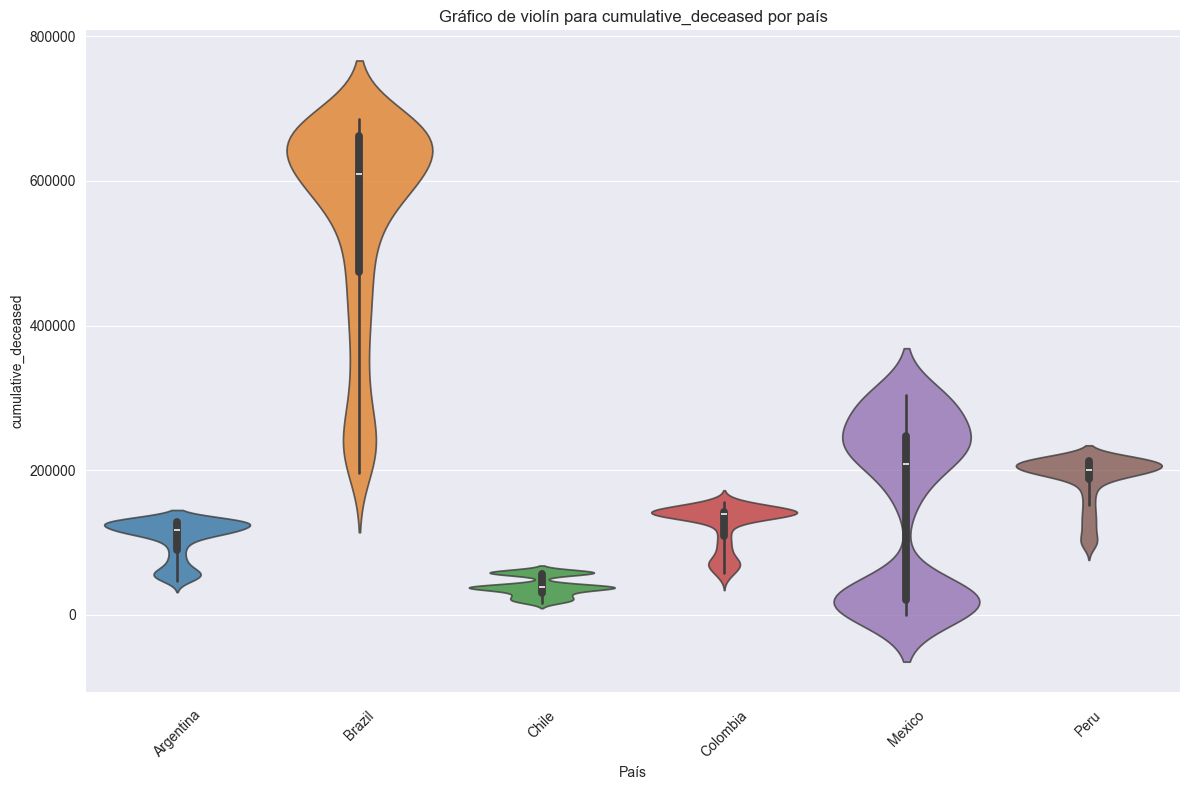

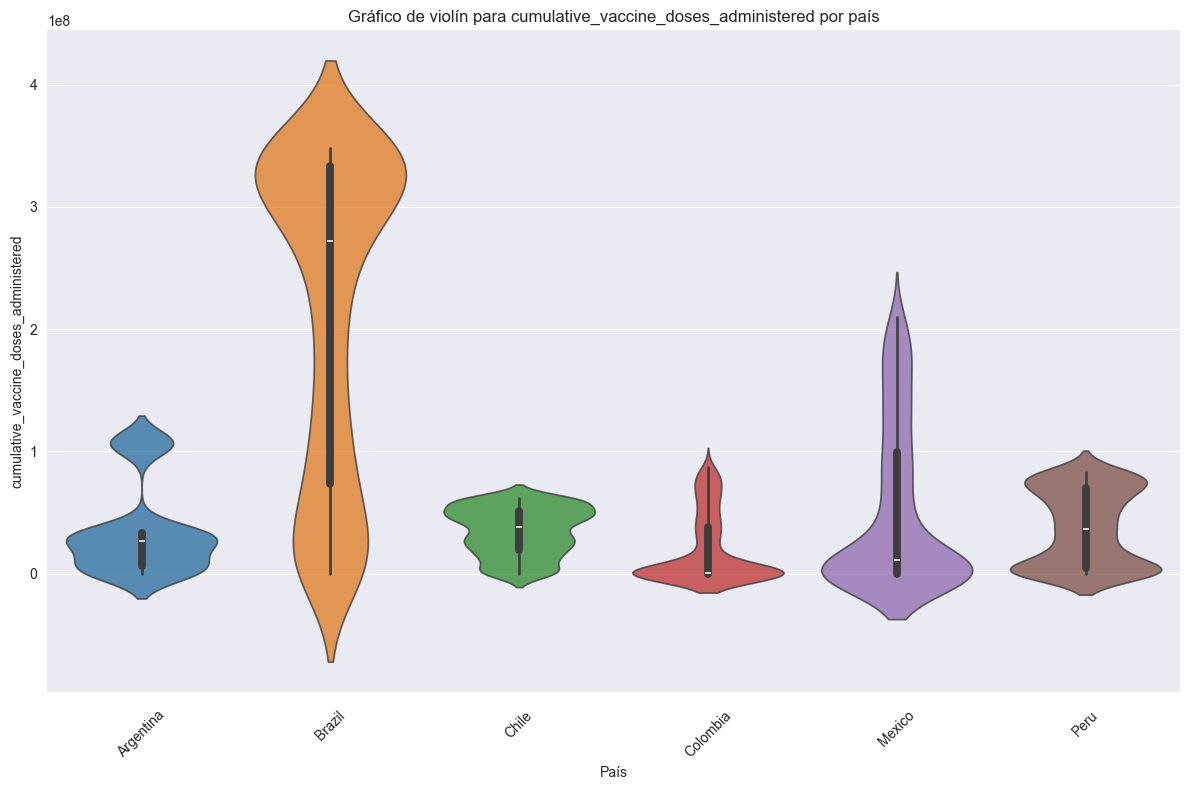

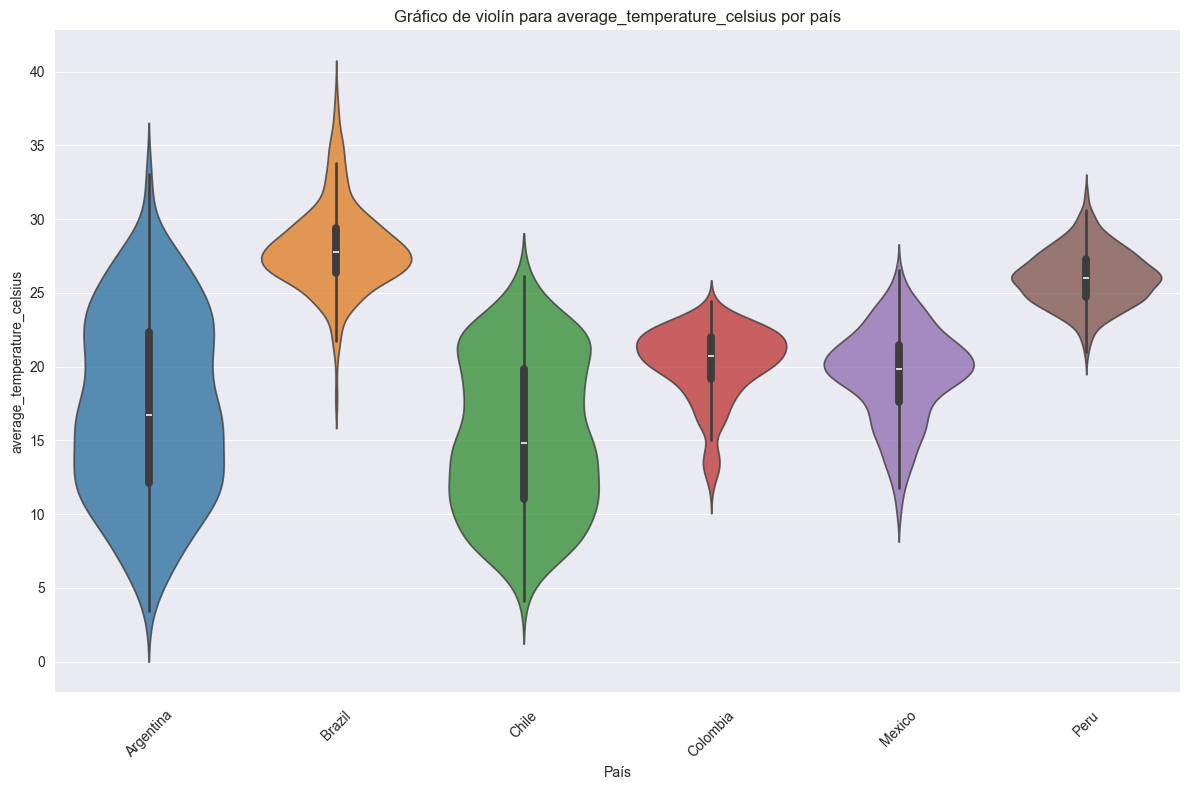

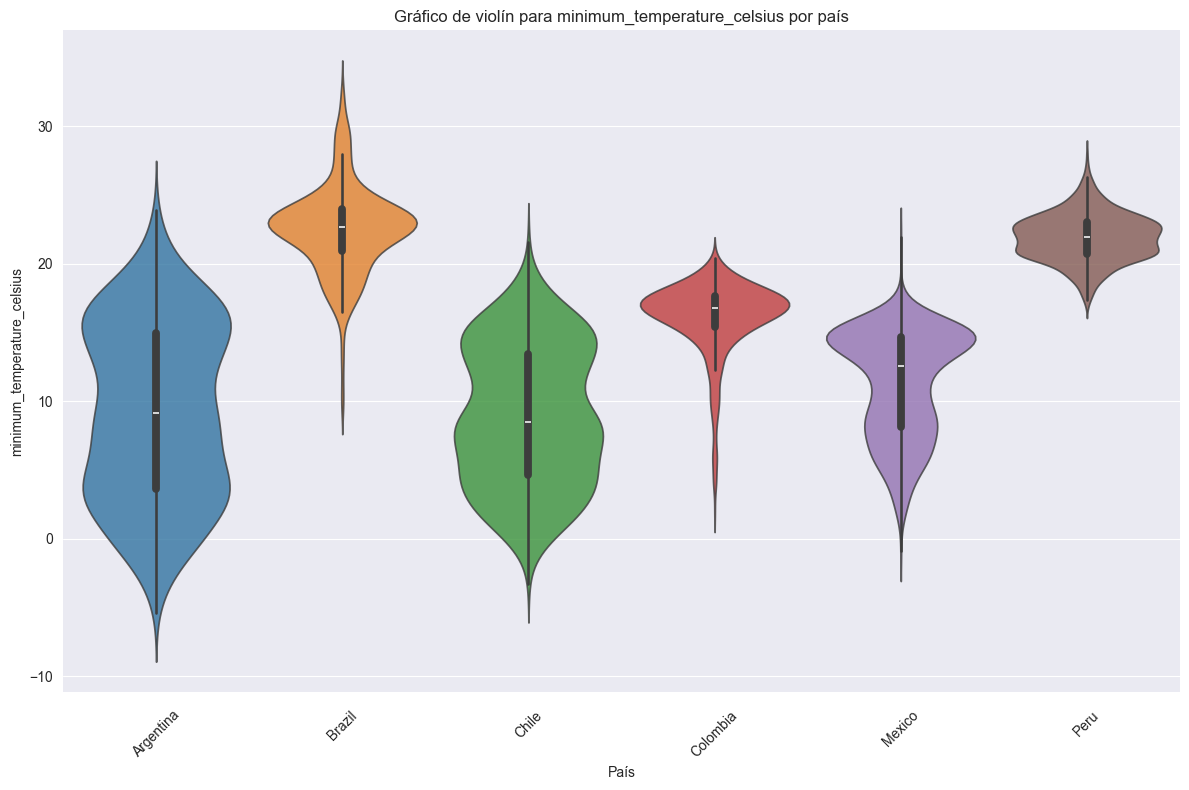

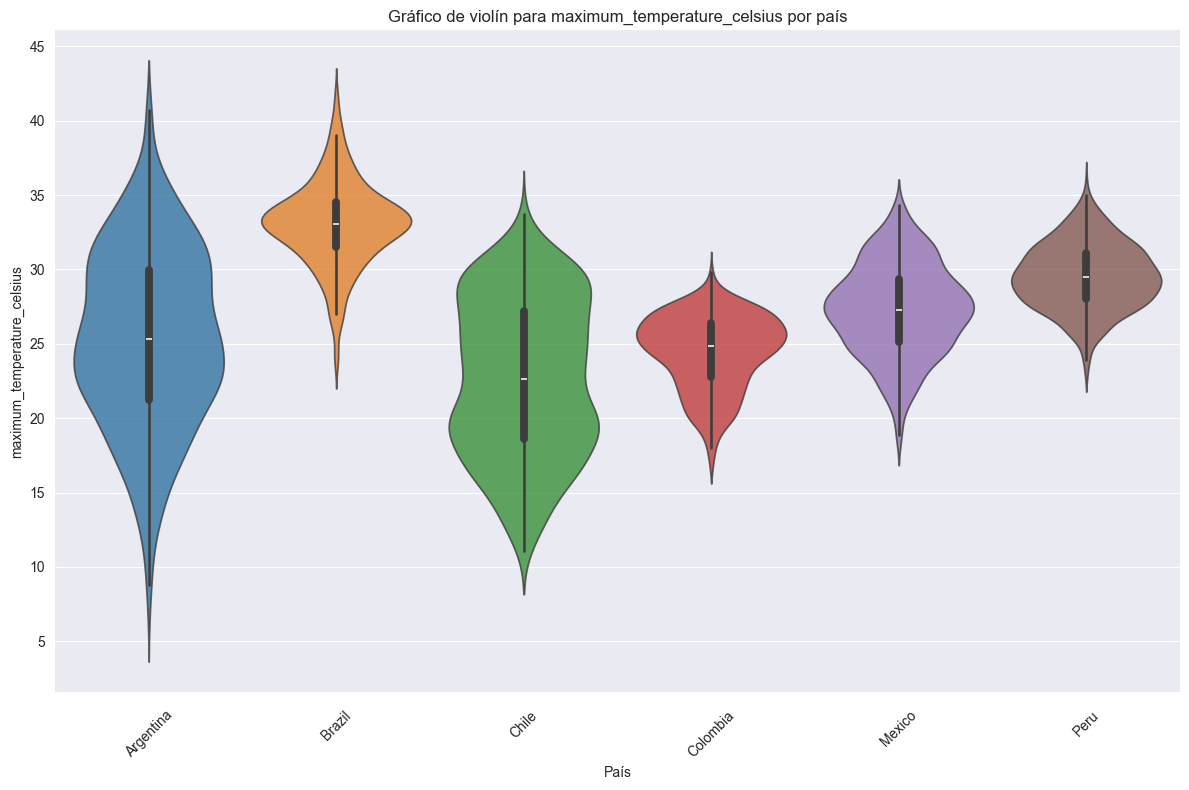

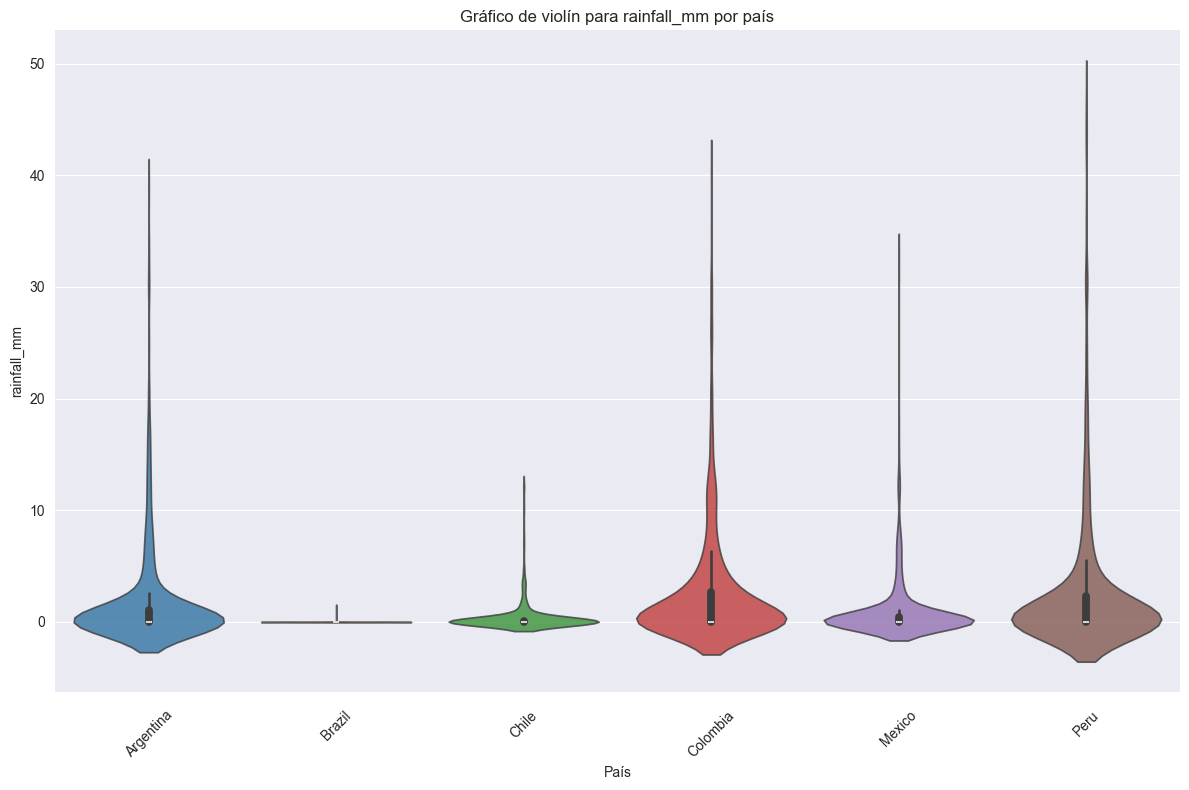

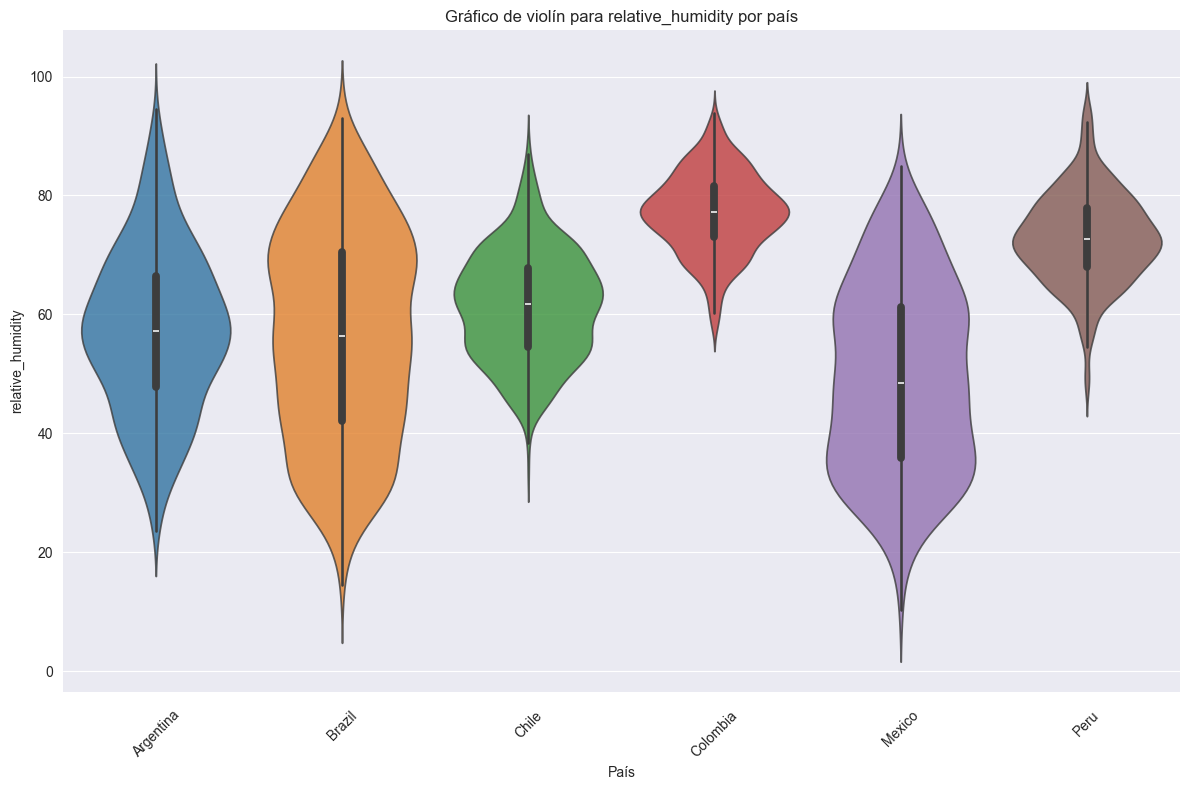

In [51]:

#Violinplot de las variables que “Sí” tenga cambios de valores.

columnas_violin = ['new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered','average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity']

# Crear un gráfico de violín para cada columna
for columna in columnas_violin:
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=df_paises_filtrados, x='country_name', y=columna, hue='country_name', alpha=0.8)
    plt.title(f'Gráfico de violín para {columna} por país')
    plt.ylabel(columna)
    plt.xlabel('País')
    sns.set_style('darkgrid')
    sns.despine(left=True,offset=5,trim=True)

    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
    plt.tight_layout()
    plt.show()


([<matplotlib.axis.XTick at 0x13563546450>,
 [Text(0, 0, '00-09'),
  Text(1, 0, '10-19'),
  Text(2, 0, '20-29'),
  Text(3, 0, '30-39'),
  Text(4, 0, '40-49'),
  Text(5, 0, '50-59'),
  Text(6, 0, '60-69'),
  Text(7, 0, '70-79'),
  Text(8, 0, 'and-older')])

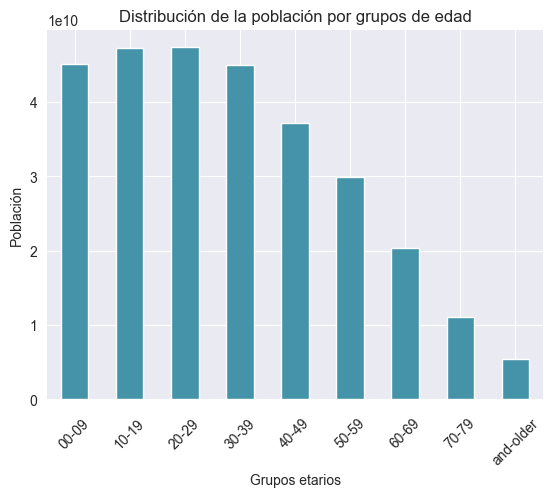

In [52]:
#Distribución de la población por grupos de edad

columnas_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29','population_age_30_39', 'population_age_40_49', 'population_age_50_59','population_age_60_69', 'population_age_70_79','population_age_80_and_older']
distribucion_edades = df_paises_filtrados[columnas_edad].sum()

distribucion_edades.plot(kind='bar',stacked=True, color='#4493A8')

plt.title('Distribución de la población por grupos de edad')
plt.xlabel('Grupos etarios')
plt.ylabel('Población')
sns.set_style('darkgrid')
sns.despine(left=True,offset=5,trim=True)

plt.xticks(range(len(columnas_edad)), [col.split('_')[-2] +'-' +col.split('_')[-1] for col in columnas_edad], rotation=45)

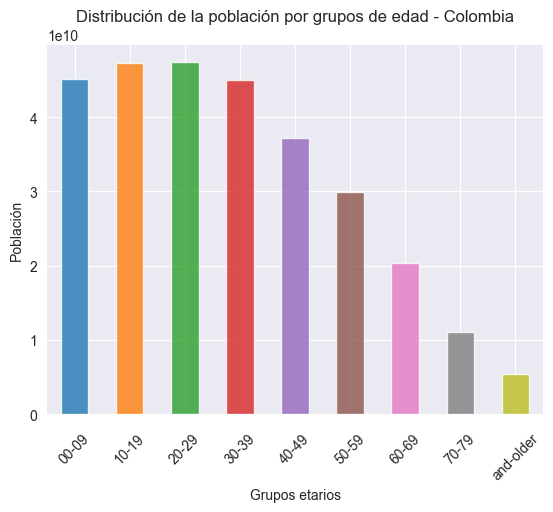

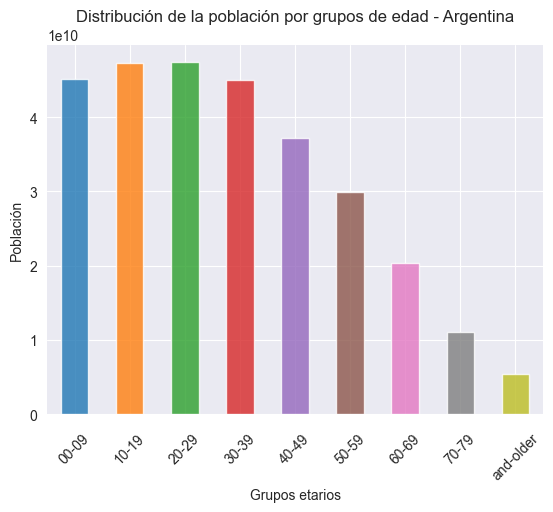

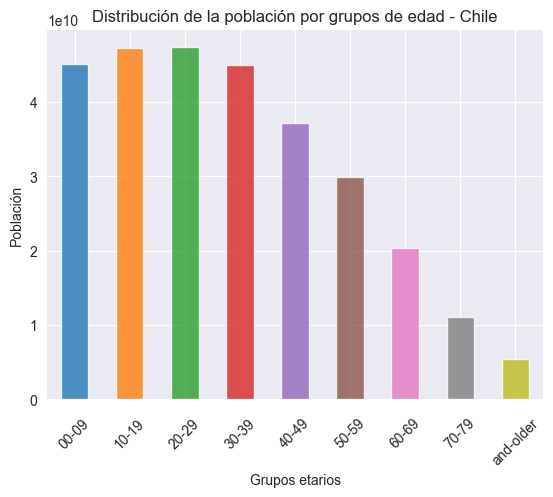

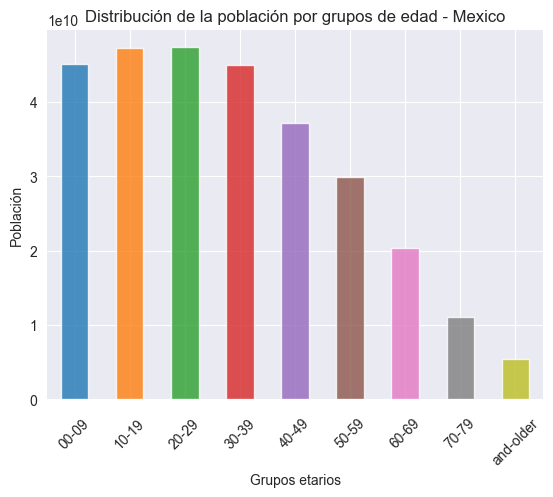

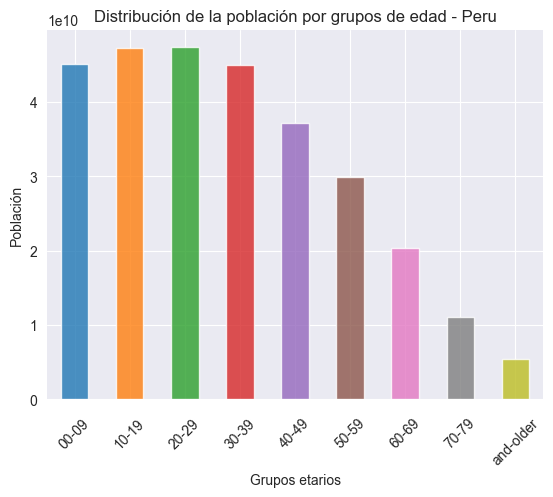

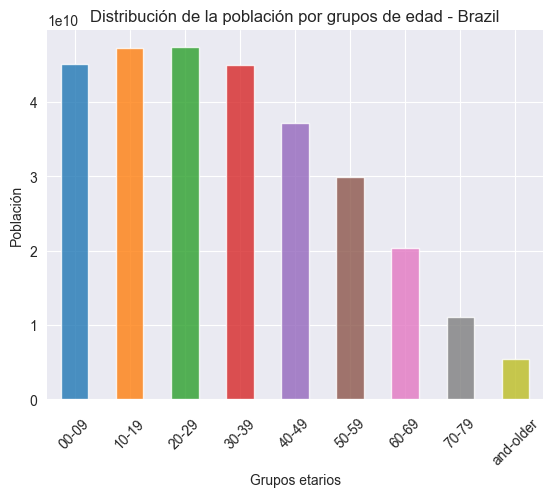

In [53]:
# Iterar sobre cada país y crear un gráfico de barras para la distribución de edades
columnas_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29','population_age_30_39', 'population_age_40_49', 'population_age_50_59','population_age_60_69', 'population_age_70_79','population_age_80_and_older']
distribucion_edades = df_paises_filtrados[columnas_edad].sum()

for pais in paises_6:
    # Filtrar el DataFrame por el país actual
    df_pais = df_paises_filtrados[df_paises_filtrados['country_name'] == pais]
       
    # Crear el gráfico de barras
    distribucion_edades.plot(kind='bar', stacked=True,alpha=0.8, color=sns.color_palette())
    
    # Configuración del gráfico
    plt.title(f'Distribución de la población por grupos de edad - {pais}')
    plt.xlabel('Grupos etarios')
    plt.ylabel('Población')
    sns.set_style('darkgrid')
    sns.despine(left=True,offset=5,trim=True)

    plt.xticks(range(len(columnas_edad)), [col.split('_')[-2] +'-' +col.split('_')[-1] for col in columnas_edad], rotation=45)
    
    # Mostrar el gráfico
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

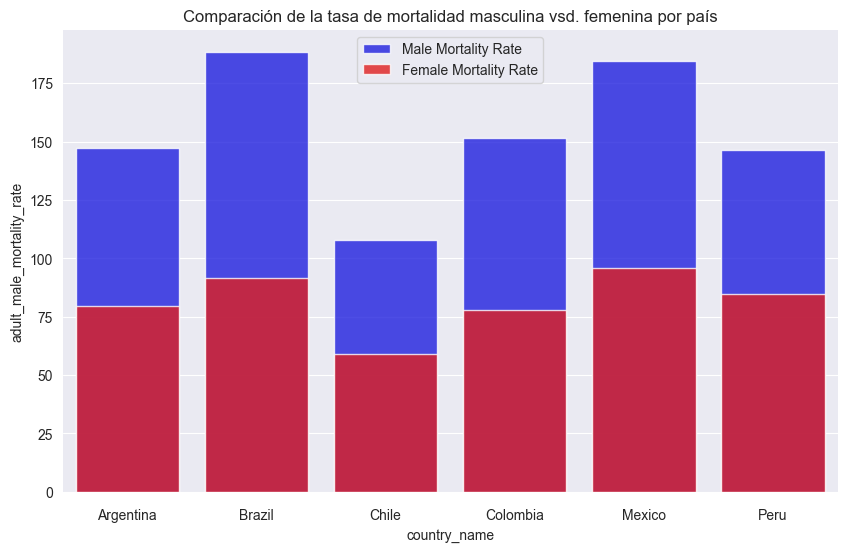

In [59]:
#Realizamos el diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

plt.figure(figsize=(10,6))

sns.barplot(data=df_paises_filtrados, x='country_name', y='adult_male_mortality_rate', color='blue', alpha=0.8, label='Male Mortality Rate')
sns.barplot(data=df_paises_filtrados, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.8, label='Female Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vsd. femenina por país')
sns.set_style('darkgrid')
sns.despine(left=True,offset=5,trim=True)

plt.show

De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.



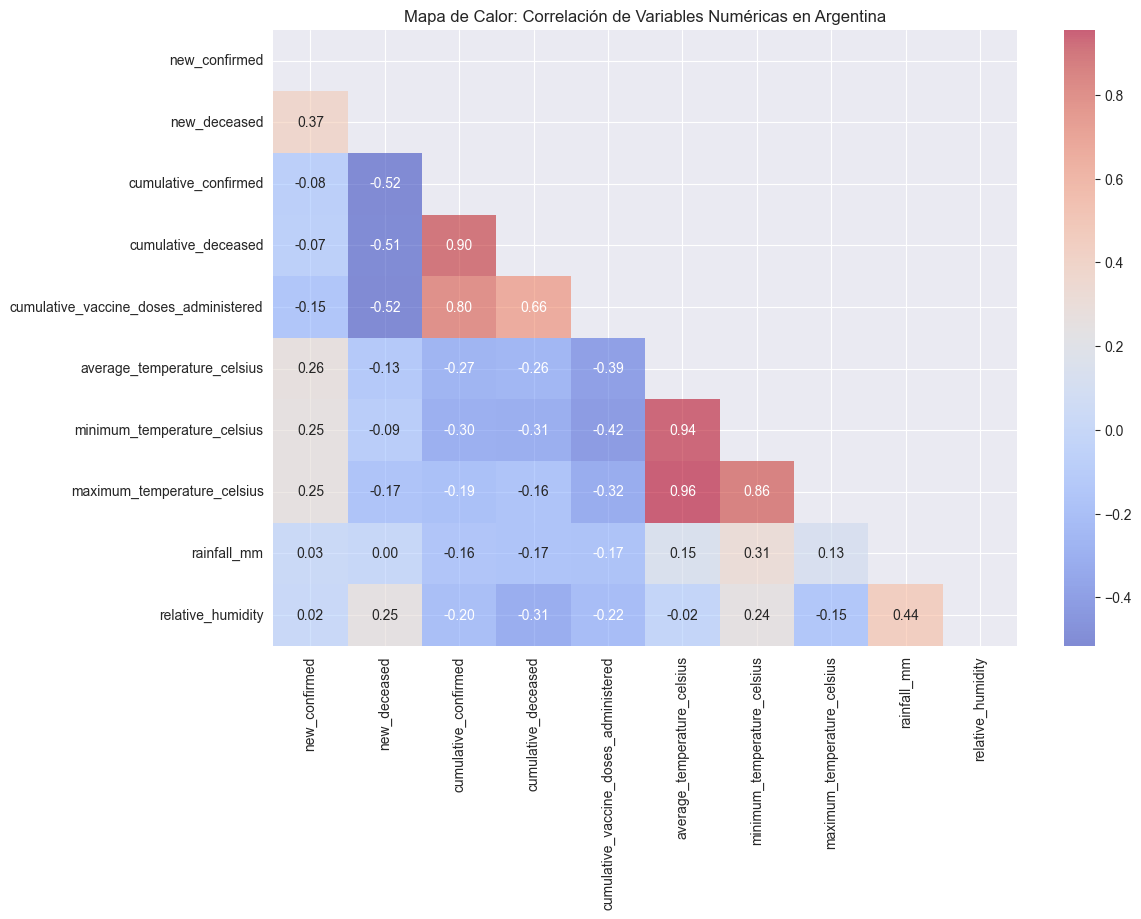

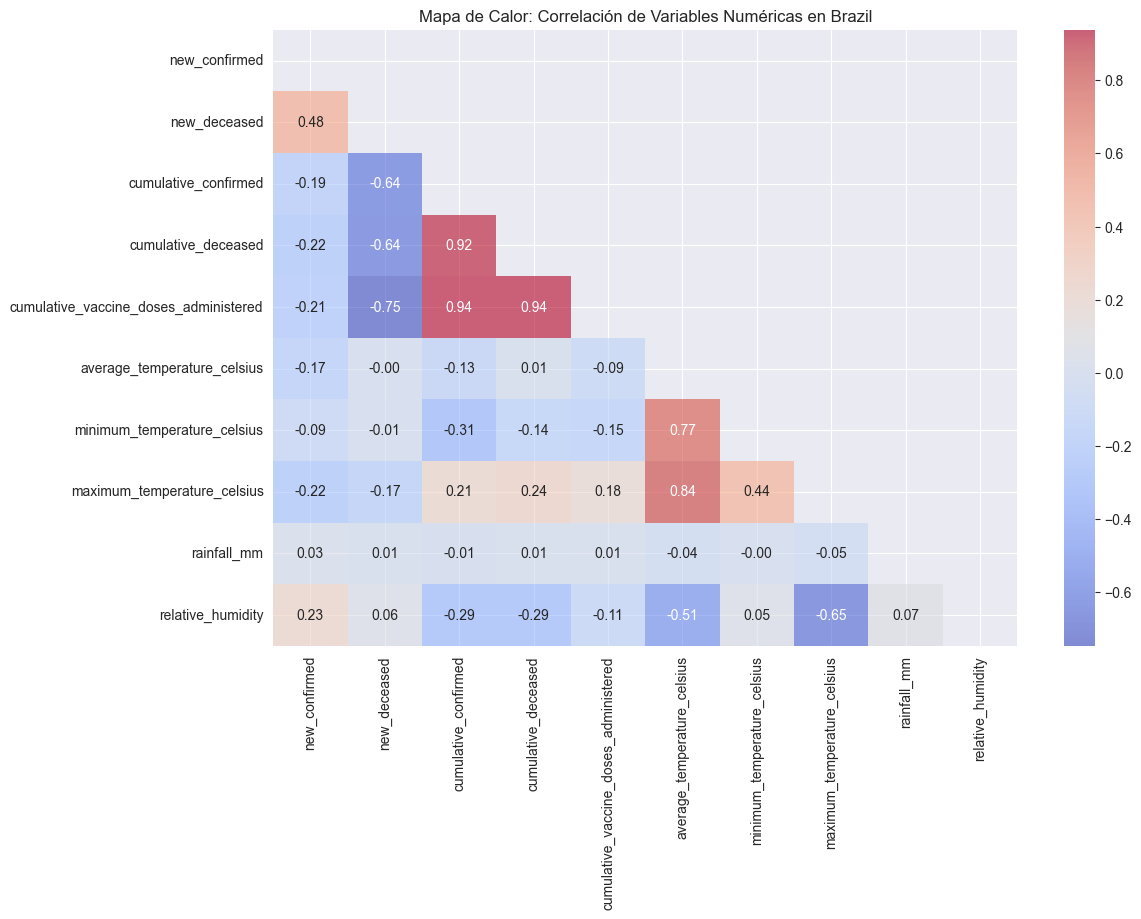

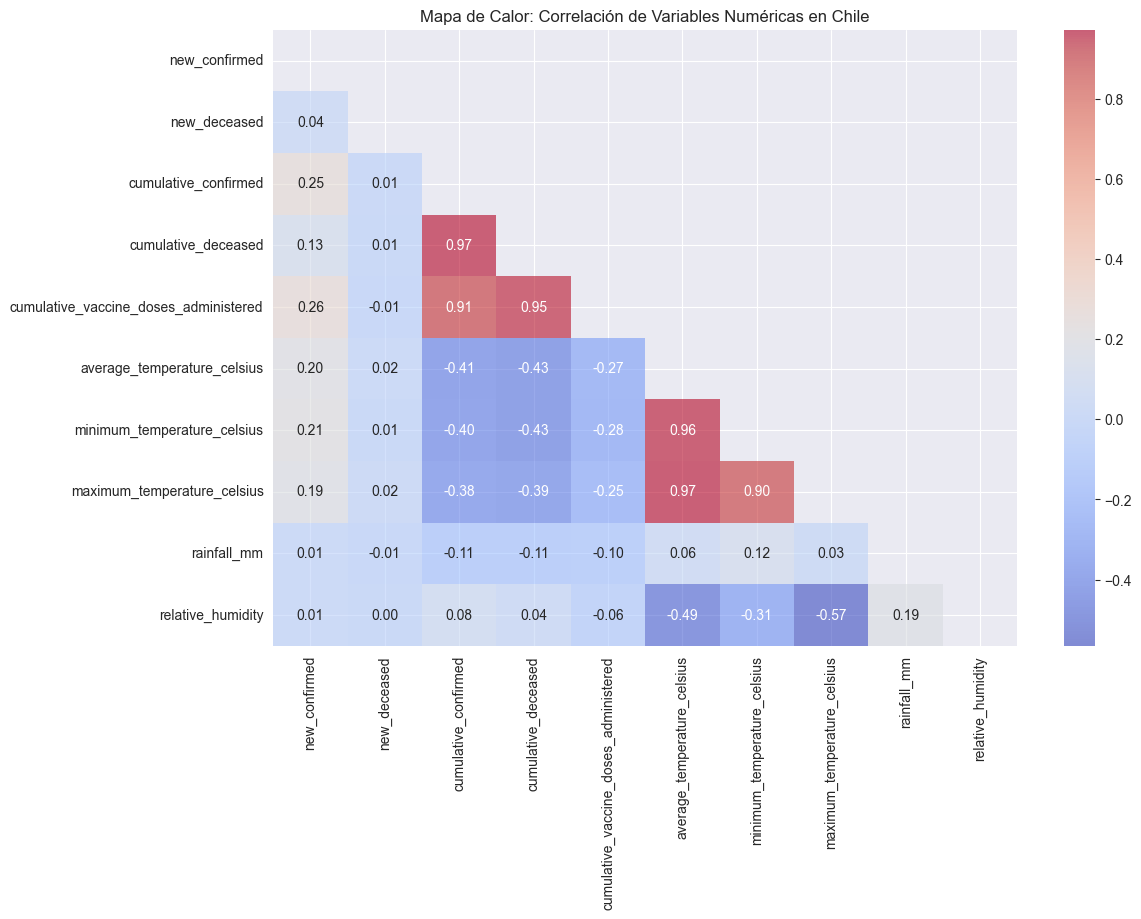

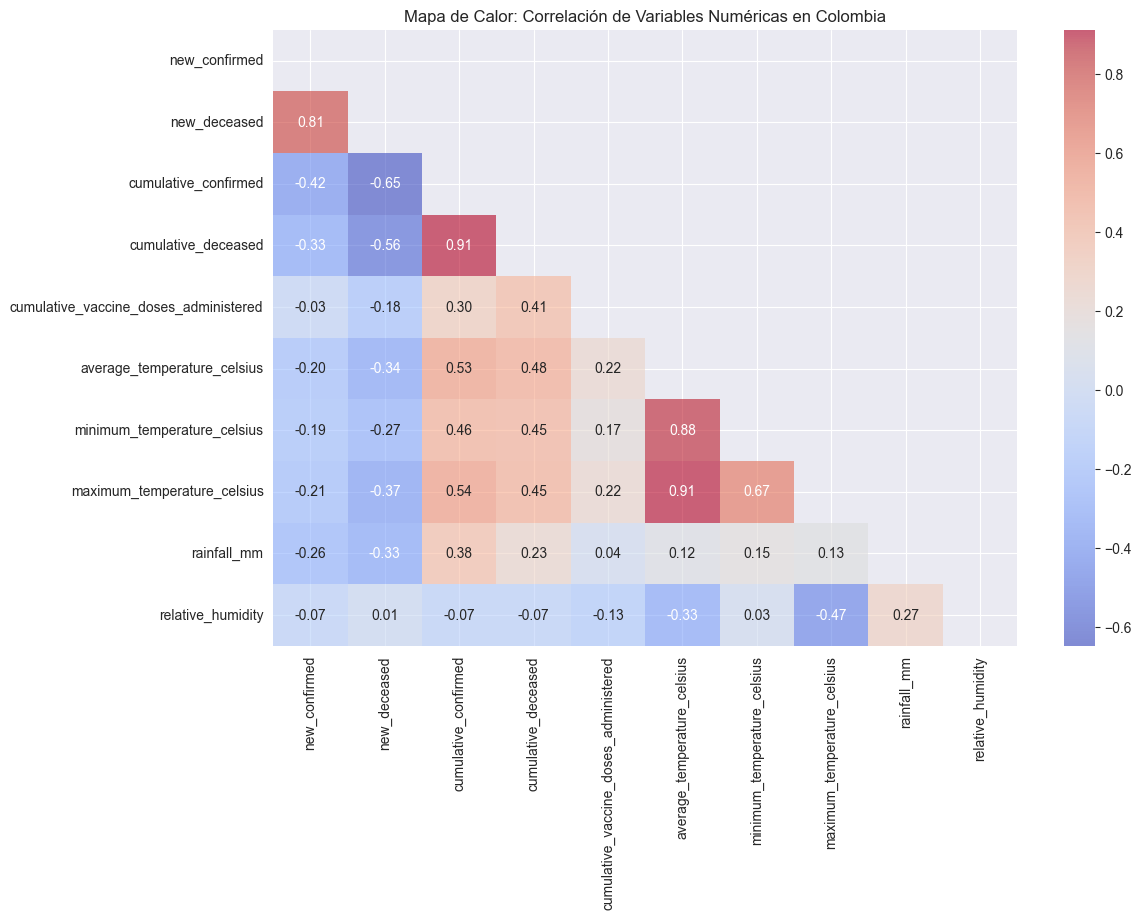

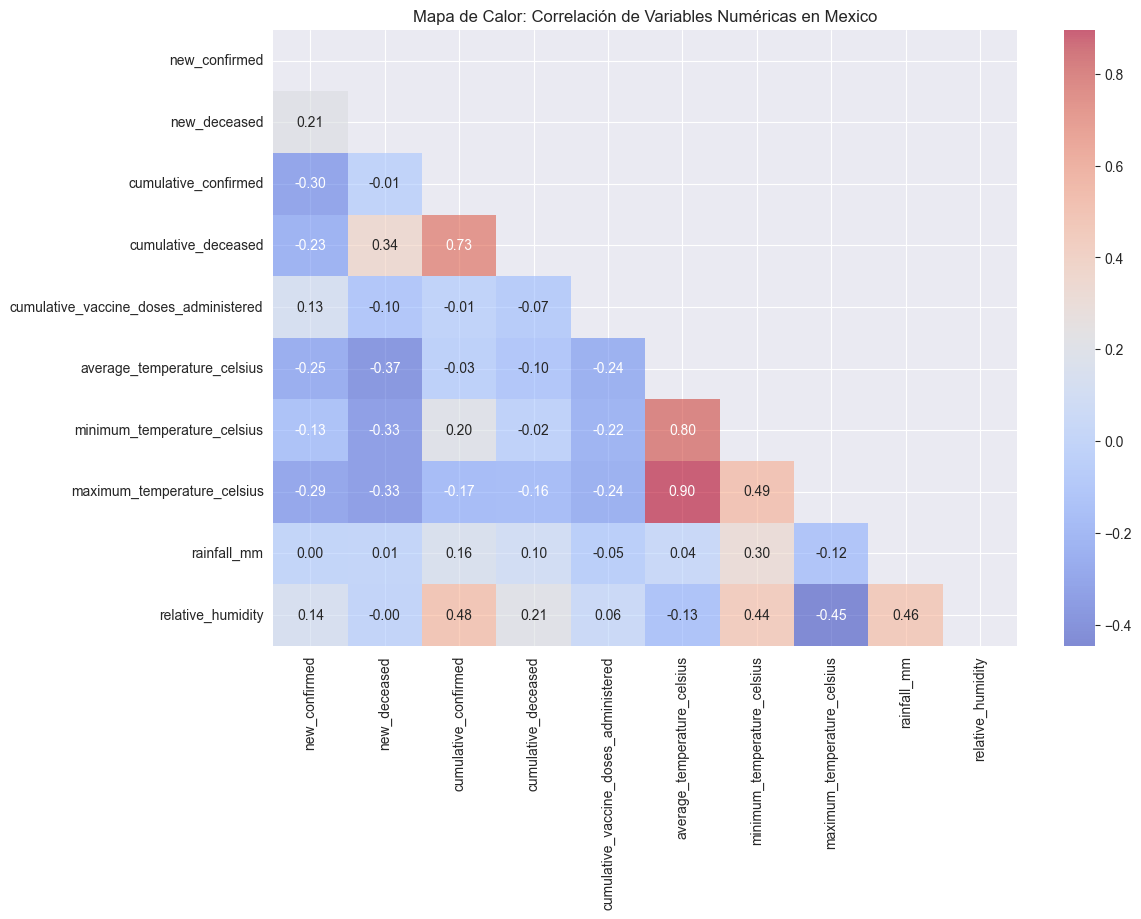

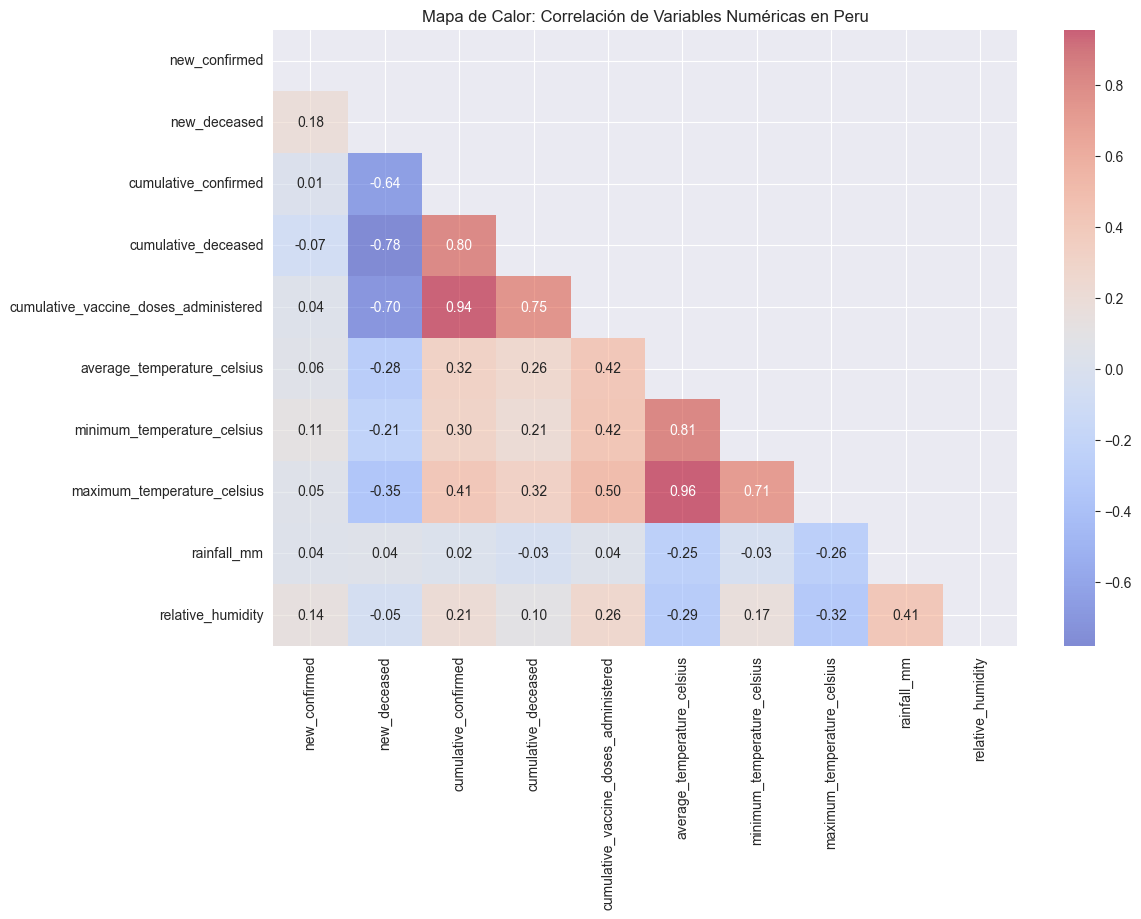

In [55]:
# Seleccionar las columnas específicas
columnas_seleccionadas = ['new_confirmed', 'new_deceased', 'cumulative_confirmed','cumulative_deceased', 'cumulative_vaccine_doses_administered','average_temperature_celsius','minimum_temperature_celsius', 'maximum_temperature_celsius','rainfall_mm', 'relative_humidity']

# Iterar sobre cada país
for pais in df_paises_filtrados['country_name'].unique():
    # Filtrar el DataFrame por el país actual y las columnas seleccionadas
    df_pais = df_paises_filtrados[df_paises_filtrados['country_name'] == pais][columnas_seleccionadas]
    
    # Calcular la matriz de correlación para el país actual
    matriz_correlacion_pais = df_pais.corr()
    
    mascara = np.triu(np.ones_like(matriz_correlacion_pais, dtype=bool))

    # Crear el mapa de calor para el país actual
    plt.figure(figsize=(12, 8))
    sns.heatmap(matriz_correlacion_pais, mask= mascara, annot=True, cmap='coolwarm', fmt=".2f", alpha=0.6)
    plt.title(f'Mapa de Calor: Correlación de Variables Numéricas en {pais}')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

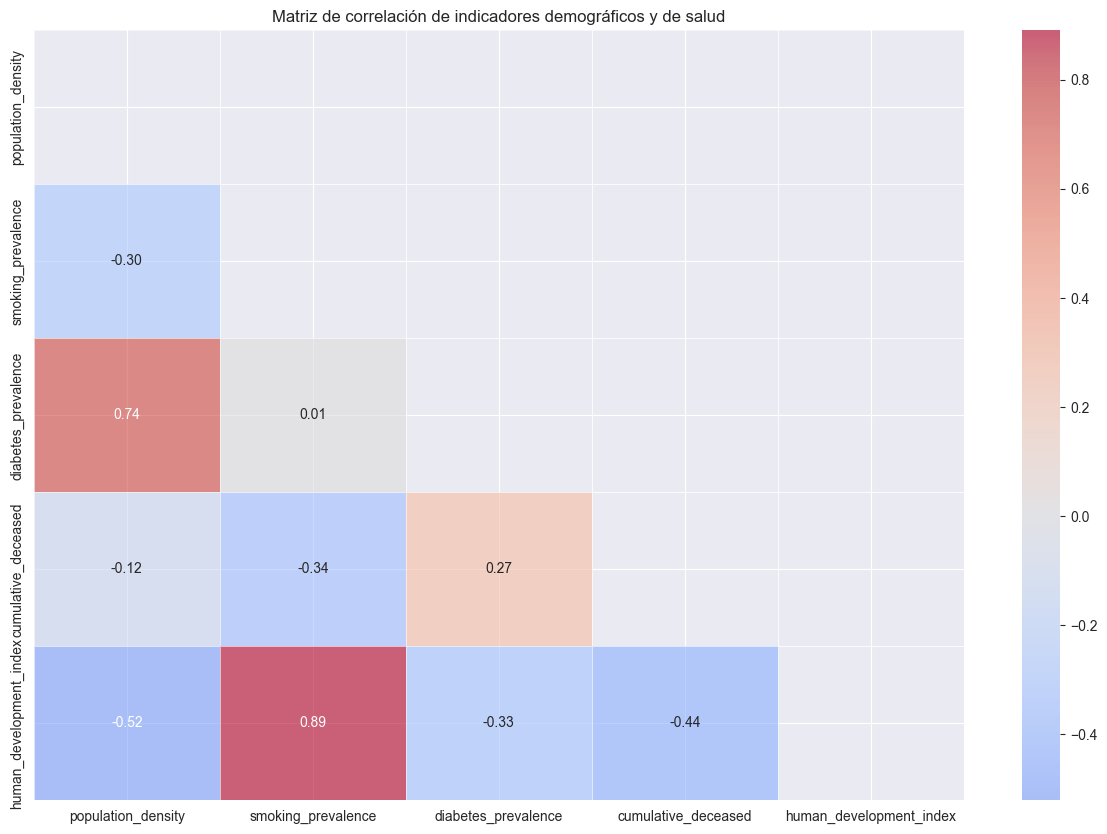

In [56]:
#Matriz de correlación de indicadores demográficos y de salud.

columnas_matriz = ['population_density','smoking_prevalence','diabetes_prevalence','cumulative_deceased','human_development_index']
matriz_correlacion_2 = df_paises_filtrados[columnas_matriz].corr()

mascara = np.triu(np.ones_like(matriz_correlacion_2, dtype=bool))

plt.figure(figsize=(15,10))

sns.heatmap(matriz_correlacion_2, mask=mascara, annot=True, fmt='.2f' , linewidths=.5, cmap='coolwarm', center=0, alpha=0.6)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los países seleccionados, sin embargo, esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.

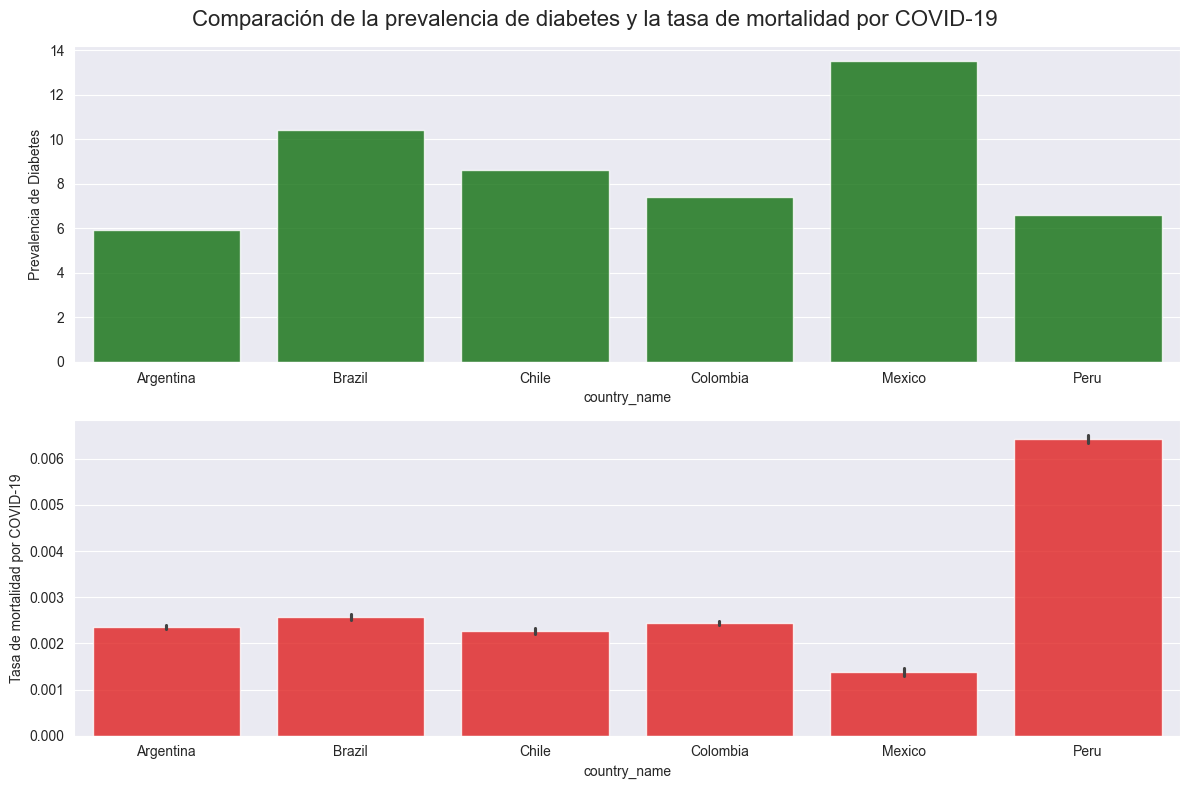

In [60]:
#Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Primer gráfico de barras para la prevalencia de la diabetes
sns.barplot(data=df_paises_filtrados, x='country_name', y='diabetes_prevalence', color='green', alpha=0.8, ax=ax)
ax.set_ylabel('Prevalencia de Diabetes')

# Segundo gráfico de barras para la tasa de mortalidad por COVID-19
sns.barplot(data=df_paises_filtrados, x='country_name', y=df_paises_filtrados['cumulative_deceased'] / df_paises_filtrados['population'], color='red', alpha=0.8, ax=ax2)
ax2.set_ylabel('Tasa de mortalidad por COVID-19')

# Título de la figura
fig.suptitle('Comparación de la prevalencia de diabetes y la tasa de mortalidad por COVID-19', fontsize=16)

# Configuración adicional
plt.tight_layout()  # Ajusta automáticamente la disposición de los subgráficos
plt.show()

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo, se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los países que más casos confirmados y muertes han tenido, además, de ser los países que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

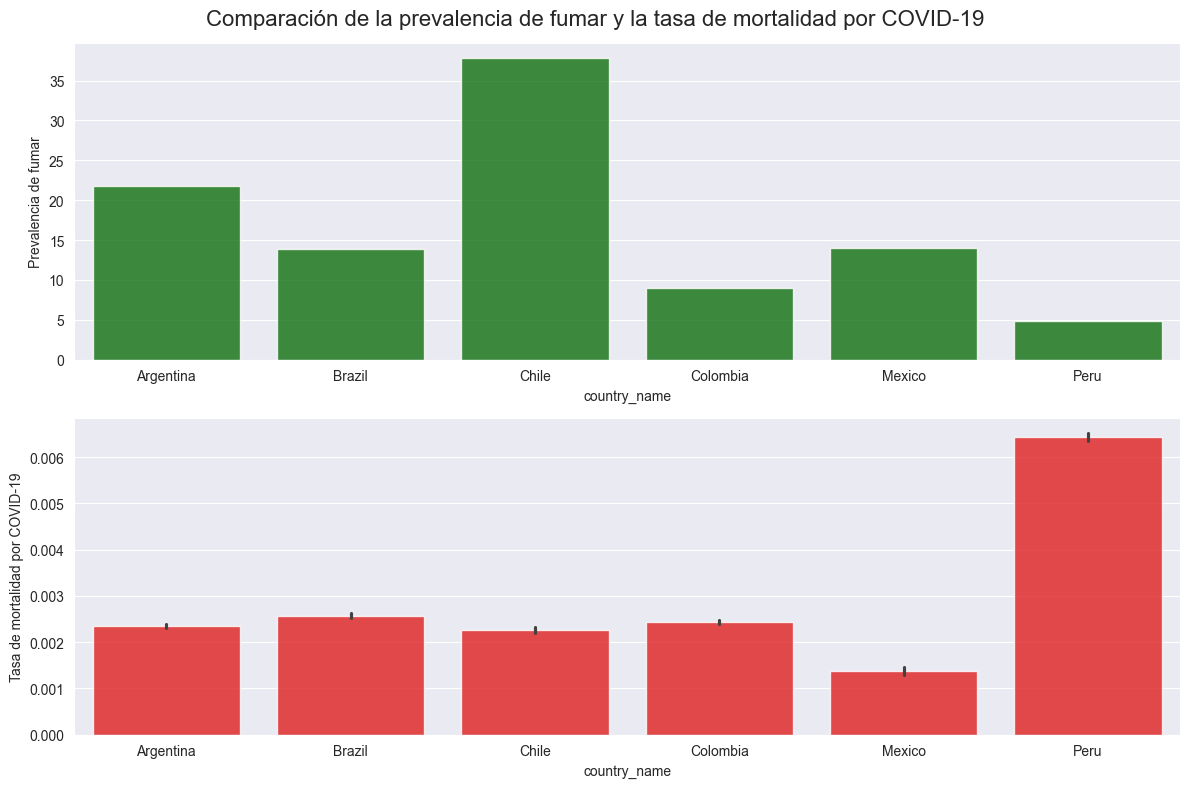

In [61]:
#Comparación de la Prevalencia de smoking y la Tasa de Mortalidad.
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Primer gráfico de barras para la prevalencia de la diabetes
sns.barplot(data=df_paises_filtrados, x='country_name', y='smoking_prevalence', color='green', alpha=0.8, ax=ax,)
ax.set_ylabel('Prevalencia de fumar')

# Segundo gráfico de barras para la tasa de mortalidad por COVID-19
sns.barplot(data=df_paises_filtrados, x='country_name', y=df_paises_filtrados['cumulative_deceased'] / df_paises_filtrados['population'], color='red', alpha=0.8, ax=ax2)
ax2.set_ylabel('Tasa de mortalidad por COVID-19')

# Título de la figura
fig.suptitle('Comparación de la prevalencia de fumar y la tasa de mortalidad por COVID-19', fontsize=16)

# Configuración adicional
plt.tight_layout()  # Ajusta automáticamente la disposición de los subgráficos
plt.show()


TERCER AVANCE

In [62]:
import pandas as pd #importo la libreria pandas
import numpy as np #importo la libreria numpyimport seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df_paises_filtrados_3 = pd.read_csv('DatosFinalesFiltrado.csv')

In [64]:
df_paises_filtrados_3

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru    5032.183871   
3741           PE  2022-09-15           PE         Peru    5032.183871   
3742           PE  2022-09-16           PE         Peru    5032.183871   
3743           PE  2022-09-17           PE         Peru    5032.183871   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    197.233871          2.576906e+06        188954.366129   
3741    197.233871          2.576906e+06        188954.366129   
3742    197.233871          2.576906e+06        188954.366129   
3743    197.233871          2.576906e+06        188954.366129   

      cumulative_vaccine_doses_administered  population  ...  \
0                                   20334.0  44938712.0  ...   
1                                   20529.0  44938712.0  ...   
2                                   25164.0  44938712.0  ...   
3                                   29852.0  44938712.0  ...   
4                                   34162.0  44938712.0  ...   
...                                     ...         ...  ...   
3739                                    0.0  29381884.0  ...   
3740                                    0.0  29381884.0  ...   
3741                                    0.0  29381884.0  ...   
3742                                    0.0  29381884.0  ...   
3743                                    0.0  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

In [65]:
df_paises_filtrados_3['date'] = pd.to_datetime(df_paises_filtrados_3['date'])
df_paises_filtrados_3.set_index('date', inplace=True)

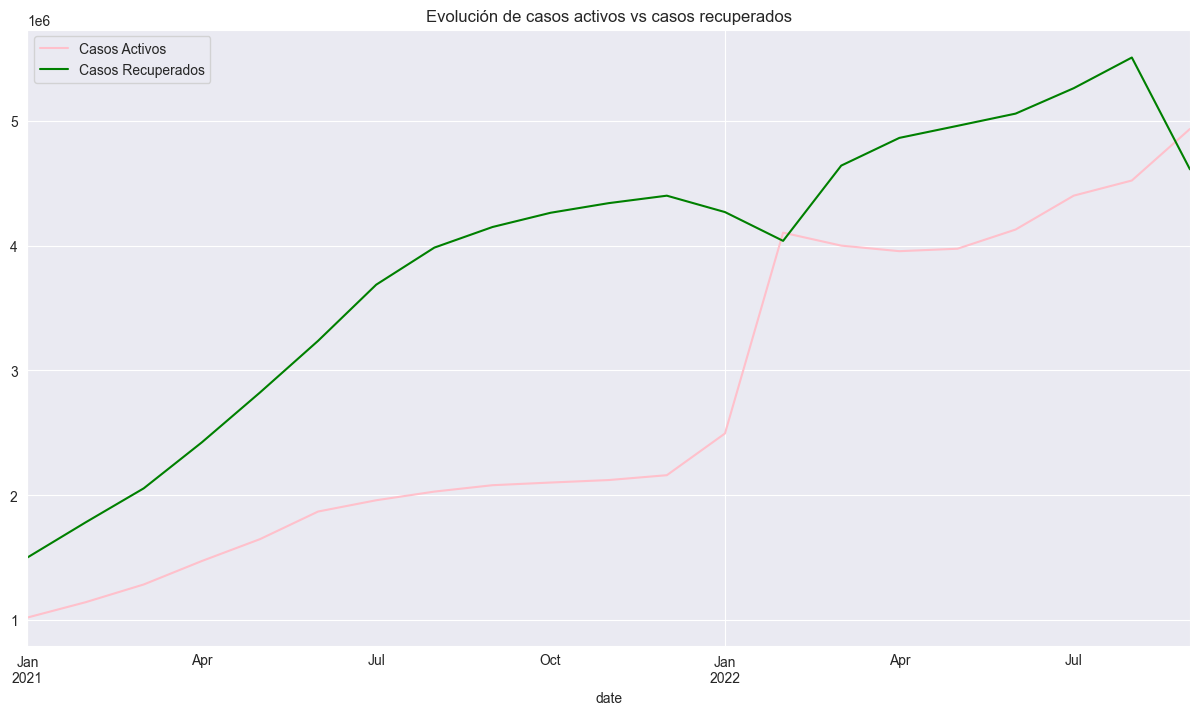

In [66]:
#Evolucion casos activos vs recuperados en LAtinoamerica

#Creación de la figura
plt.figure(figsize=(15,8))

#Creo casos activos
df_paises_filtrados_3['casos_activos']= df_paises_filtrados_3['cumulative_confirmed']-df_paises_filtrados_3['cumulative_deceased']-df_paises_filtrados_3['cumulative_recovered']

#Creación de las graficas

df_paises_filtrados_3.resample('ME').mean(numeric_only=True)['casos_activos'].plot(color='pink', label='Casos Activos')
df_paises_filtrados_3.resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot(color='green', label='Casos Recuperados')
plt.title('Evolución de casos activos vs casos recuperados')
plt.legend(loc='upper left')

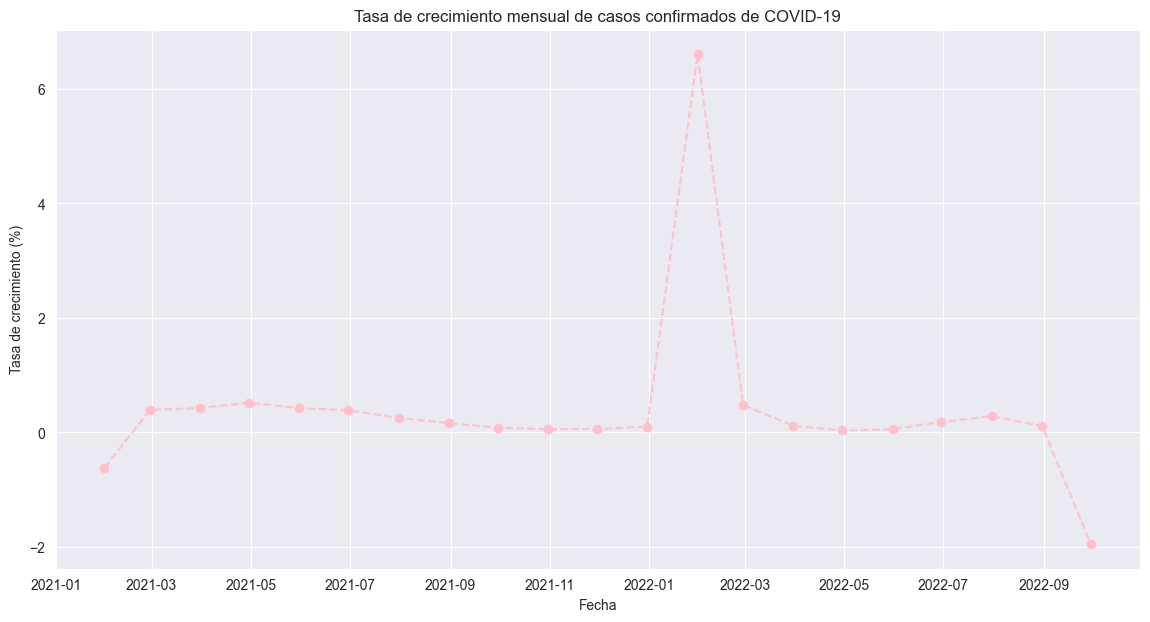

In [67]:
#Tasa de crecimiento(%)

# Calcular la tasa de crecimiento (%)
df_paises_filtrados_3['tasa_crecimiento'] = df_paises_filtrados_3['cumulative_confirmed'].pct_change() * 100

# Eliminar valores NaN y columnas no numéricas
df_numericas = df_paises_filtrados_3.select_dtypes(include=['float64', 'int64']).dropna()

# Resample y calcular la media
df_resampled = df_numericas.resample('ME').mean()

# Graficar la tasa de crecimiento
plt.figure(figsize=(14, 7))
plt.plot(df_resampled.index, df_resampled['tasa_crecimiento'], marker='o', color='pink', linestyle='--')
plt.title('Tasa de crecimiento mensual de casos confirmados de COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Tasa de crecimiento (%)')
plt.grid(True)
plt.show()

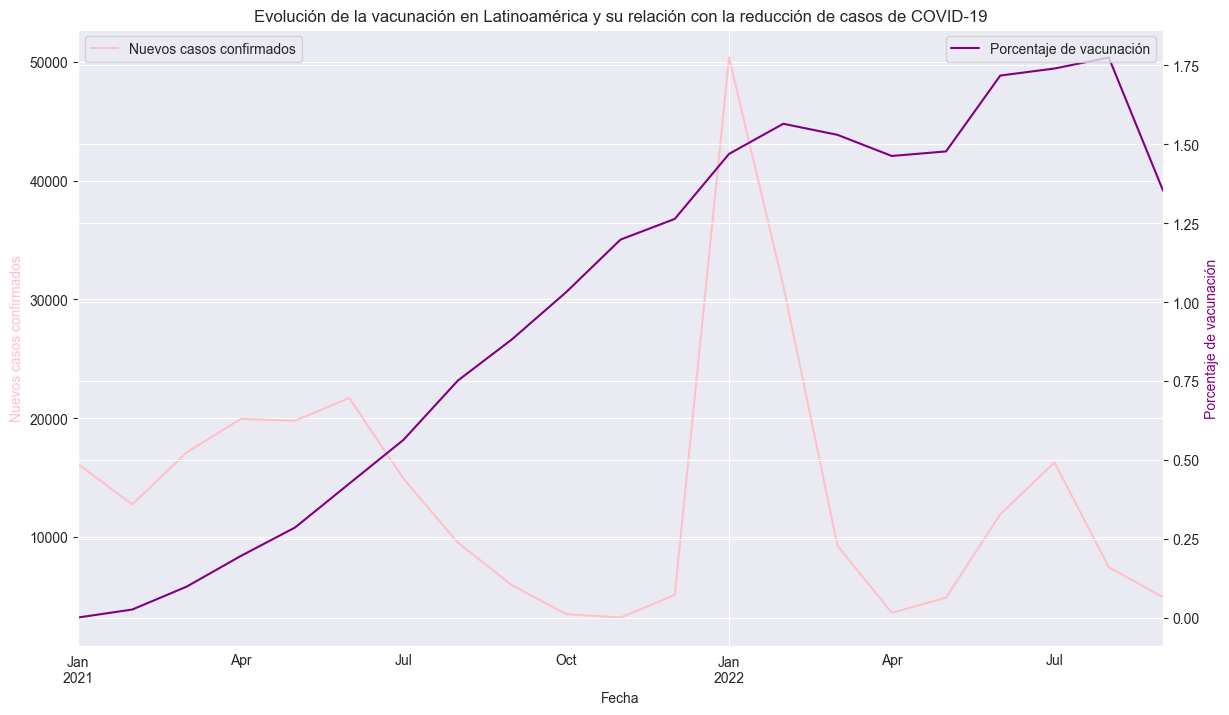

In [69]:
# Evolucion de la vacunación en Latinoamérica y su relación con la reducción de casos de COVID-19
plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()  # Crear un segundo eje y

# Crear porcentaje de vacunación
df_paises_filtrados_3['porcentaje_vacunacion'] = df_paises_filtrados_3['cumulative_vaccine_doses_administered'] / df_paises_filtrados_3['population']

# Graficar los nuevos casos confirmados y el porcentaje de vacunación
df_paises_filtrados_3.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='pink', label='Nuevos casos confirmados')
df_paises_filtrados_3.resample('ME').mean(numeric_only=True)['porcentaje_vacunacion'].plot(ax=ax2, color='purple', label='Porcentaje de vacunación')

# Configuración del gráfico
ax1.set_ylabel('Nuevos casos confirmados', color='pink')
ax2.set_ylabel('Porcentaje de vacunación', color='purple')
ax1.set_xlabel('Fecha')
plt.title('Evolución de la vacunación en Latinoamérica y su relación con la reducción de casos de COVID-19')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()

Text(0, 0.5, 'Pais')

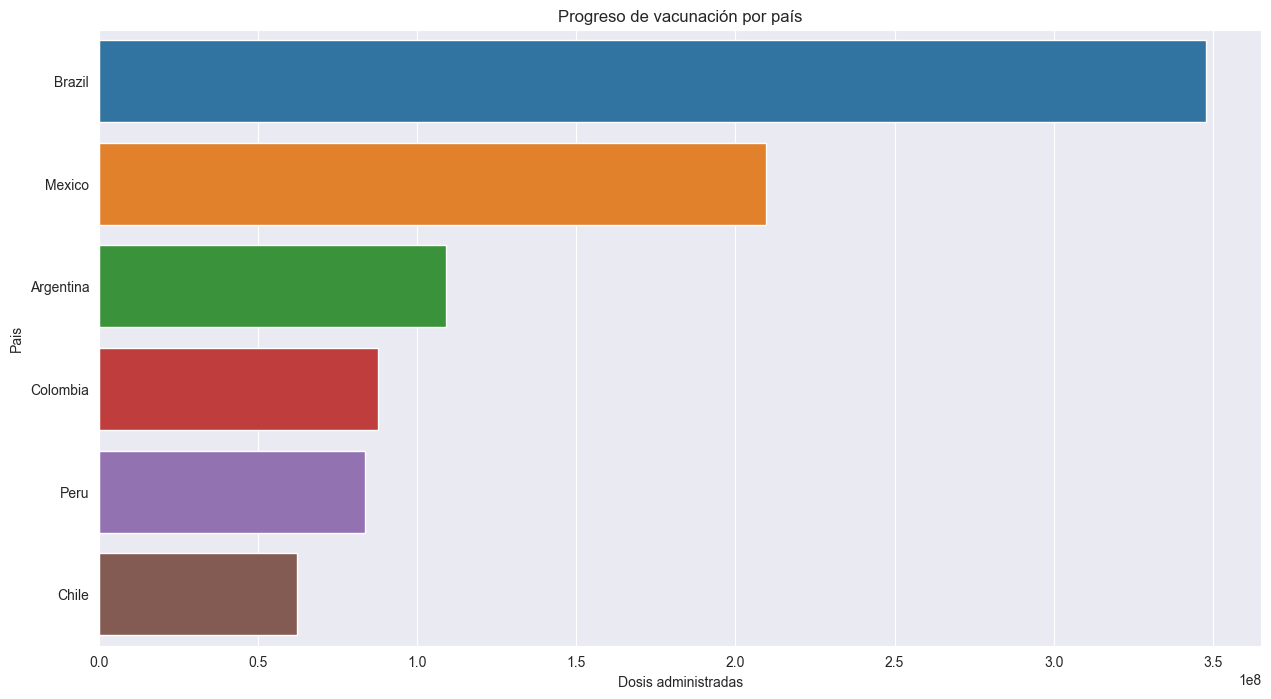

In [70]:
#Progreso de la vacunación por país

datos_vacunacion = df_paises_filtrados_3.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x=datos_vacunacion.values, y=datos_vacunacion.index, hue=datos_vacunacion.index)
plt.title('Progreso de vacunación por país')
plt.xlabel('Dosis administradas')
plt.ylabel('Pais')

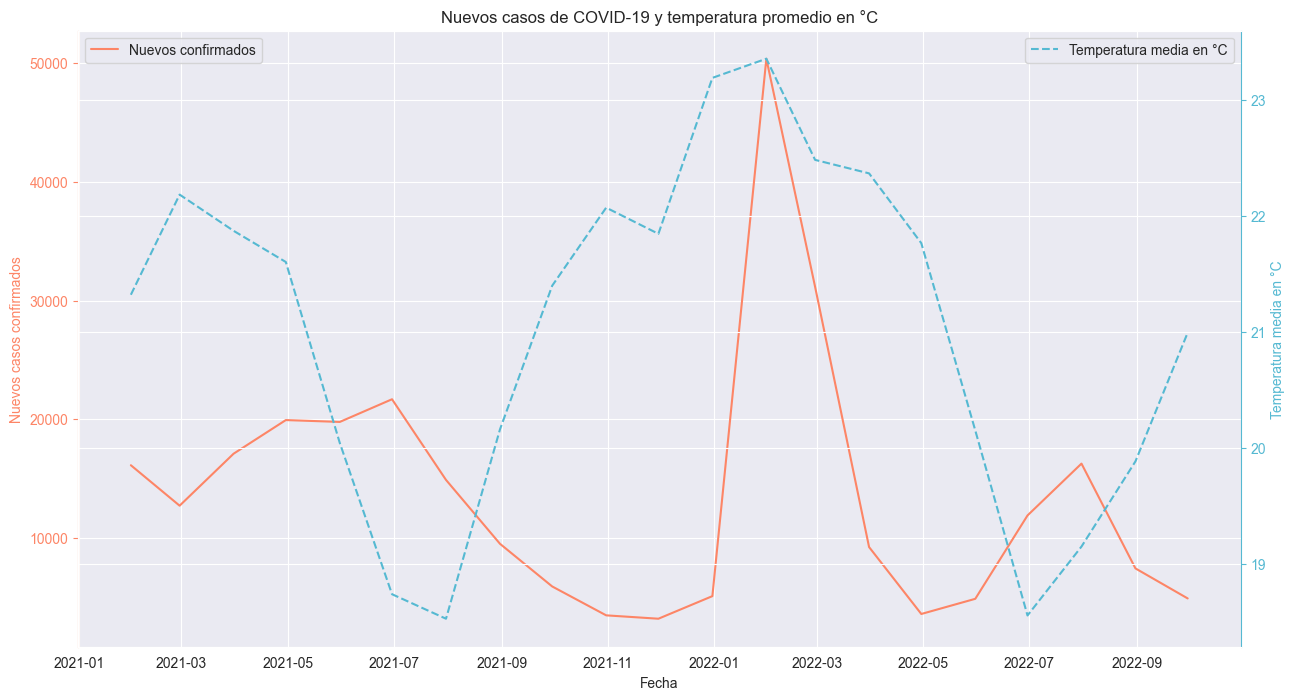

In [72]:
#Nuevos casos y temperatura promedio

# Crear figura y ejes
plt.figure(figsize=(15, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Graficar la línea de nuevos confirmados
ax1.plot(df_paises_filtrados_3.resample('ME').mean(numeric_only=True).index, df_paises_filtrados_3.resample('ME').mean(numeric_only=True)['new_confirmed'], color='#FD8566', label='Nuevos confirmados')

# Graficar la línea de temperatura con estilo punteado
ax2.plot(df_paises_filtrados_3.resample('ME').mean(numeric_only=True).index, df_paises_filtrados_3.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='#55B9D2', label='Temperatura media en °C', linestyle='--')

# Configurar ejes y etiquetas
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='#FD8566')
ax2.set_ylabel('Temperatura media en °C', color='#55B9D2')

# Cambiar color de los ejes y etiquetas
ax1.tick_params(axis='y', colors='#FD8566')  # Color de los ticks del eje y de la izquierda
ax2.tick_params(axis='y', colors='#55B9D2')  # Color de los ticks del eje y de la derecha
ax1.spines['left'].set_color('#FD8566')  # Color del eje y de la izquierda
ax2.spines['right'].set_color('#55B9D2')  # Color del eje y de la derecha

# Título y leyendas
plt.title('Nuevos casos de COVID-19 y temperatura promedio en °C')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Podemos observar que la temperatura promedio ha ido aumentando y los casos confirmados han ido disminuyendo sin embargo hubo un pico antes del mes de marzo pero disminuyó rápidamente, esto puede ser por la cantidad de vacunas administradas o por la cantidad de personas que se han vacunado.

Cada país tiene un impacto debido a la urbanización y la densidad de población, por lo que vamos a analizar la densidad de población en cada país.

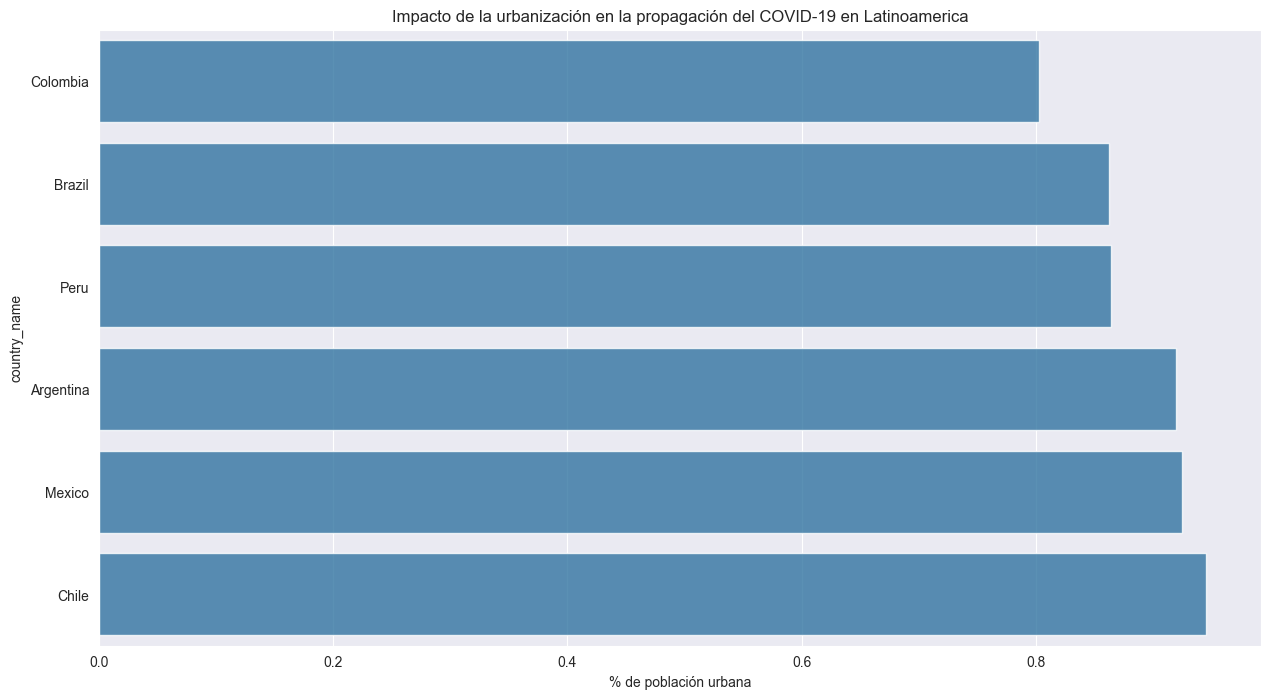

In [73]:
#Impacto de la Urbanización en la Propagación del Covid-19

df_paises_filtrados_3['porcentaje_urbanizacion'] = df_paises_filtrados_3['population_urban']/df_paises_filtrados_3['population']
casos_urbanizacion = df_paises_filtrados_3.groupby('country_name').last().sort_values(by='porcentaje_urbanizacion')

plt.figure(figsize=(15,8))
sns.barplot(x=casos_urbanizacion['porcentaje_urbanizacion'], y=casos_urbanizacion.index,  alpha=0.8)
plt.title('Impacto de la urbanización en la propagación del COVID-19 en Latinoamerica')
plt.xlabel('% de población urbana')
plt.show()

Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana.


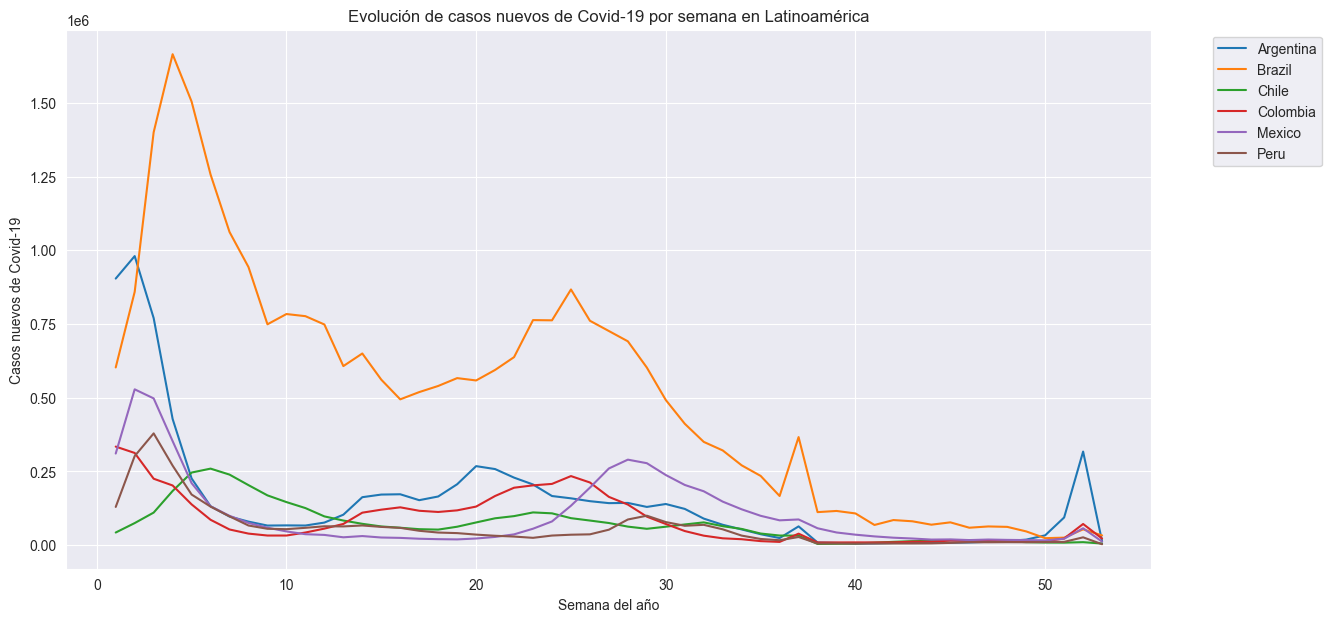

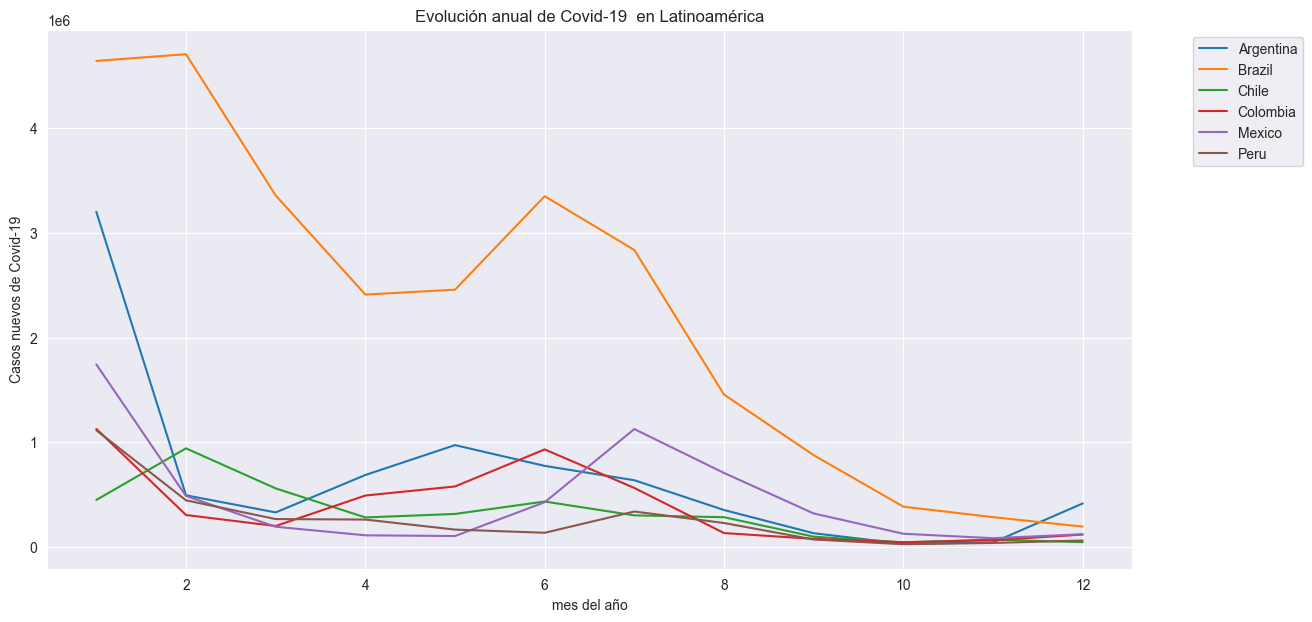

In [74]:
#Evolución de los casos de COVID-19 a lo largo del tiempo
df_paises_filtrados_3['week'] = df_paises_filtrados_3.index.isocalendar().week
casos_semanales= df_paises_filtrados_3.groupby(['week','country_name'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for pais in casos_semanales['country_name'].unique():
    casos_semanales_pais = casos_semanales[casos_semanales['country_name']== pais]
    plt.plot(casos_semanales_pais['week'],casos_semanales_pais['new_confirmed'],label=pais) 

plt.xlabel('Semana del año')
plt.ylabel('Casos nuevos de Covid-19')
plt.title('Evolución de casos nuevos de Covid-19 por semana en Latinoamérica')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


df_paises_filtrados_3['month'] = df_paises_filtrados_3.index.month
casos_mensuales= df_paises_filtrados_3.groupby(['month','country_name'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for pais in casos_mensuales['country_name'].unique():
    casos_mensuales_pais = casos_mensuales[casos_mensuales['country_name']== pais]
    plt.plot(casos_mensuales_pais['month'],casos_mensuales_pais['new_confirmed'],label=pais) 

plt.xlabel('mes del año')
plt.ylabel('Casos nuevos de Covid-19')
plt.title('Evolución anual de Covid-19  en Latinoamérica')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

De la anterior gráfica se puede observar que la cantidad de casos confirmados y muertes ha ido disminuyendo a lo largo del tiempo, sin embargo esto no quiere decir que la pandemia haya terminado, ya que la cantidad de casos confirmados y muertes sigue siendo alta, además se nota un pico en las fechas finales.

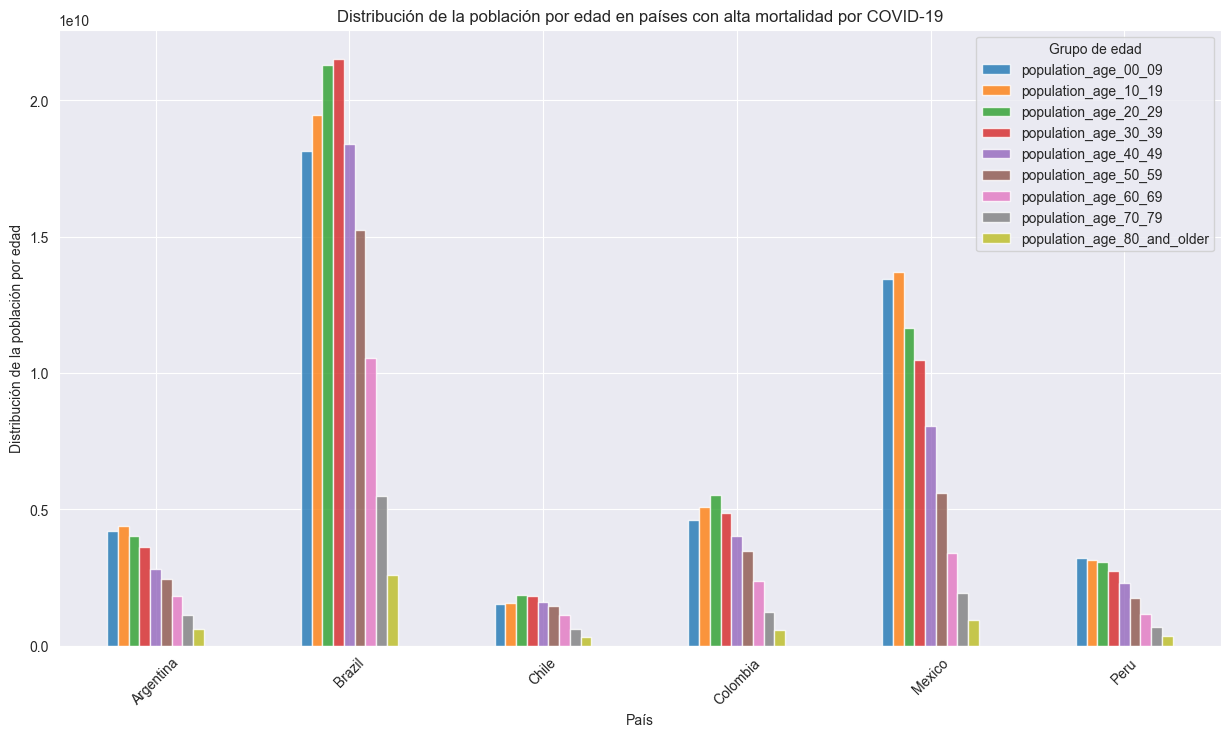

In [75]:
#Distribución de la Población por Edad en Países

# Seleccionar los países con alta mortalidad
paises_alta_mortalidad = df_paises_filtrados_3.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(6).index

# Definir el grupo de edades
grupo_edades = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Calcular la distribución de edades para los países con alta mortalidad
distribucion_edades = df_paises_filtrados_3[df_paises_filtrados_3['country_name'].isin(paises_alta_mortalidad)].groupby('country_name')[grupo_edades].sum()

# Graficar la distribución de la población por edad
distribucion_edades.plot(kind='bar', stacked=False, figsize=(15, 8), alpha=0.8)
plt.title('Distribución de la población por edad en países con alta mortalidad por COVID-19')
plt.xlabel('País')
plt.ylabel('Distribución de la población por edad')
plt.legend(title='Grupo de edad')
plt.xticks(rotation=45)
plt.show()


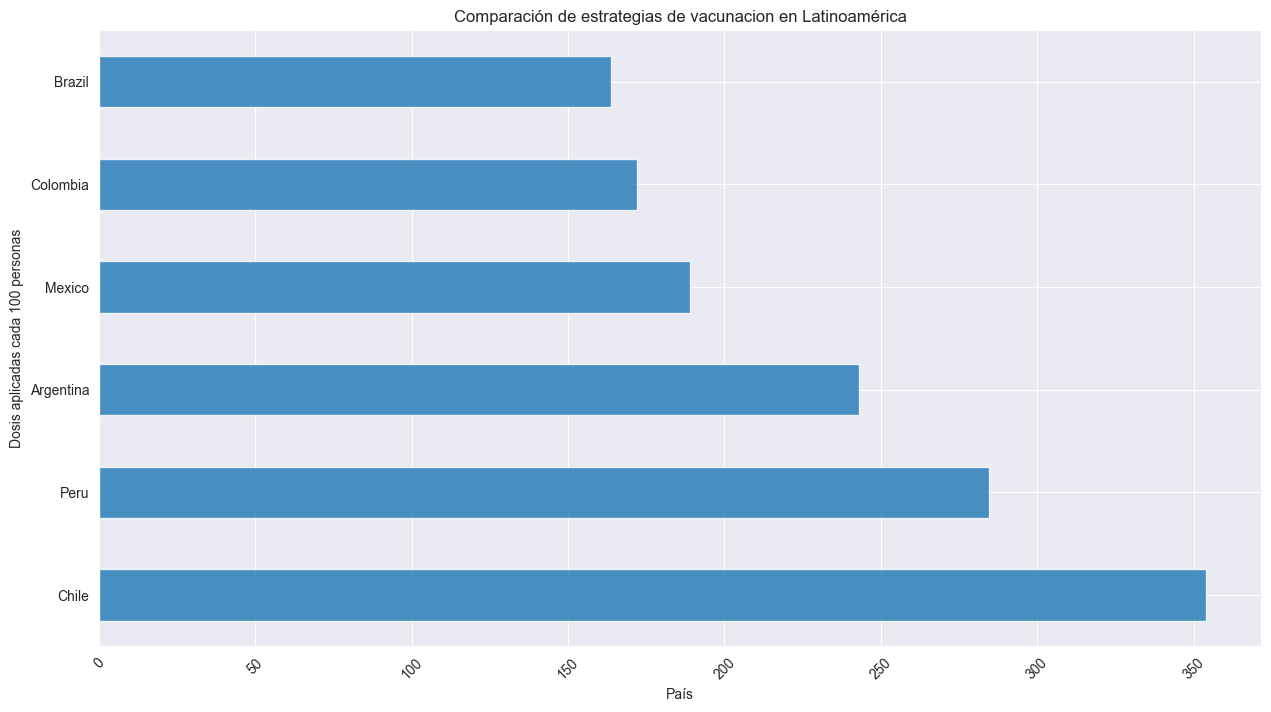

In [76]:
#Comparación de Estrategias de Vacunación en América Latina
estrategia_vacunacion = df_paises_filtrados_3.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / df_paises_filtrados_3.groupby('country_name')['population'].max() * 100
estrategia_vacunacion.sort_values(ascending=False).plot(kind='barh', figsize=(15,8),  alpha=0.8)

plt.title('Comparación de estrategias de vacunacion en Latinoamérica')
plt.xlabel('País')
plt.ylabel('Dosis aplicadas cada 100 personas')
plt.xticks(rotation=45)
plt.show()

Nuevamente vemos el buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.

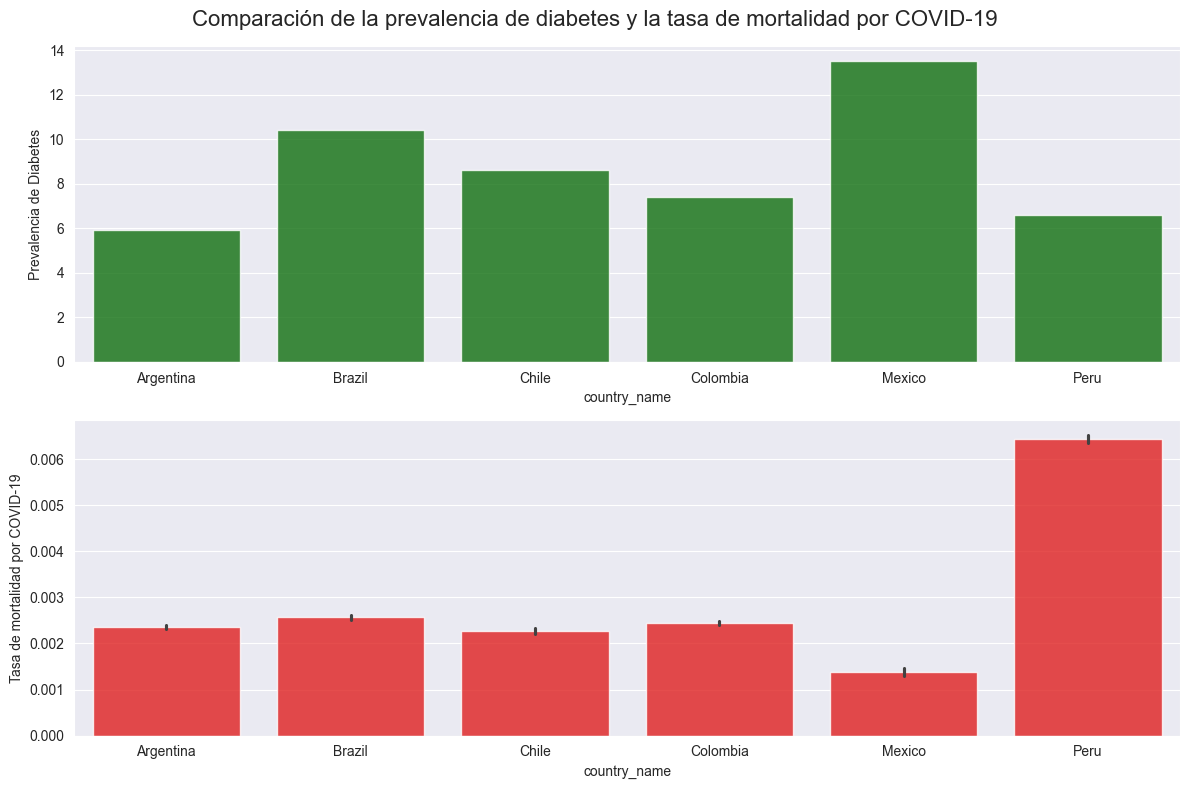

In [78]:
#Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Primer gráfico de barras para la prevalencia de la diabetes
sns.barplot(data=df_paises_filtrados_3, x='country_name', y='diabetes_prevalence', color='green', alpha=0.8, ax=ax)
ax.set_ylabel('Prevalencia de Diabetes')

# Segundo gráfico de barras para la tasa de mortalidad por COVID-19
sns.barplot(data=df_paises_filtrados_3, x='country_name', y=df_paises_filtrados_3['cumulative_deceased'] / df_paises_filtrados_3['population'], color='red', alpha=0.8, ax=ax2)
ax2.set_ylabel('Tasa de mortalidad por COVID-19')

# Título de la figura
fig.suptitle('Comparación de la prevalencia de diabetes y la tasa de mortalidad por COVID-19', fontsize=16)

# Configuración adicional
plt.tight_layout()  # Ajusta automáticamente la disposición de los subgráficos
plt.show()

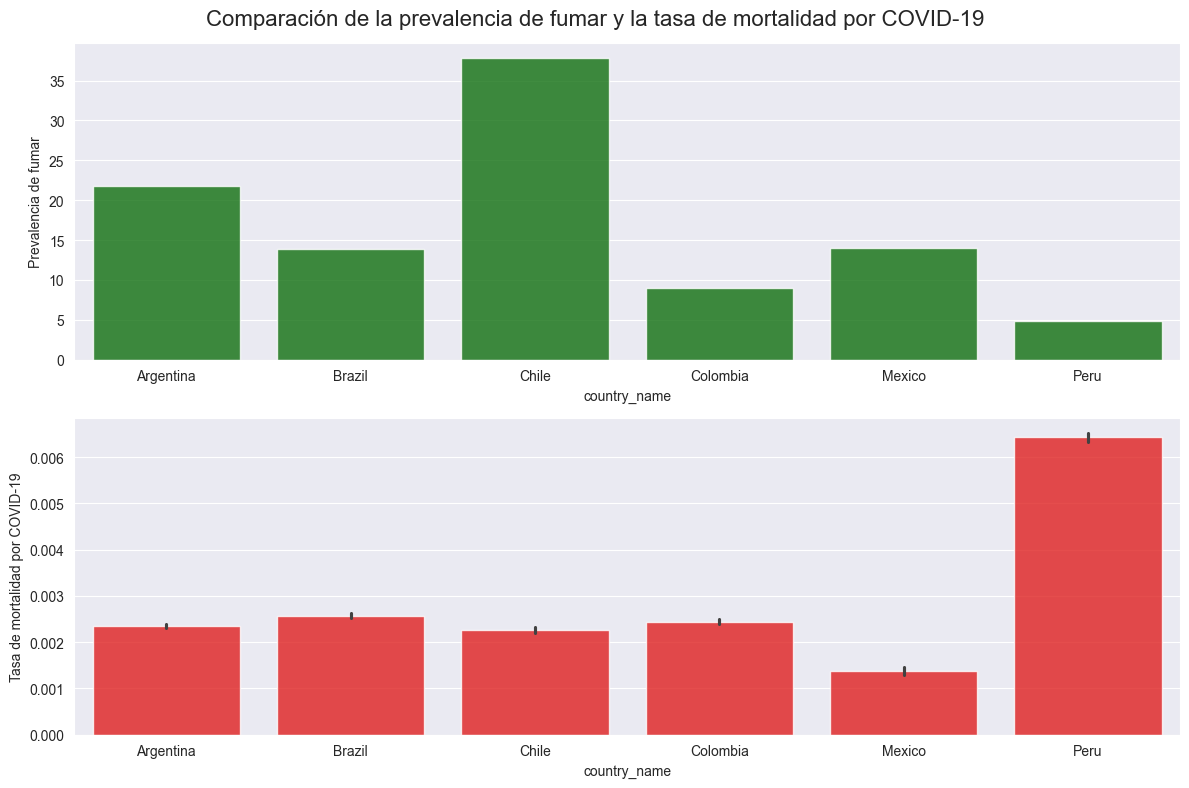

In [79]:
#Comparación de la Prevalencia de smoking y la Tasa de Mortalidad.
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Primer gráfico de barras para la prevalencia de la diabetes
sns.barplot(data=df_paises_filtrados_3, x='country_name', y='smoking_prevalence', color='green', alpha=0.8, ax=ax,)
ax.set_ylabel('Prevalencia de fumar')

# Segundo gráfico de barras para la tasa de mortalidad por COVID-19
sns.barplot(data=df_paises_filtrados_3, x='country_name', y=df_paises_filtrados_3['cumulative_deceased'] / df_paises_filtrados_3['population'], color='red', alpha=0.8, ax=ax2)
ax2.set_ylabel('Tasa de mortalidad por COVID-19')

# Título de la figura
fig.suptitle('Comparación de la prevalencia de fumar y la tasa de mortalidad por COVID-19', fontsize=16)

# Configuración adicional
plt.tight_layout()  # Ajusta automáticamente la disposición de los subgráficos
plt.show()

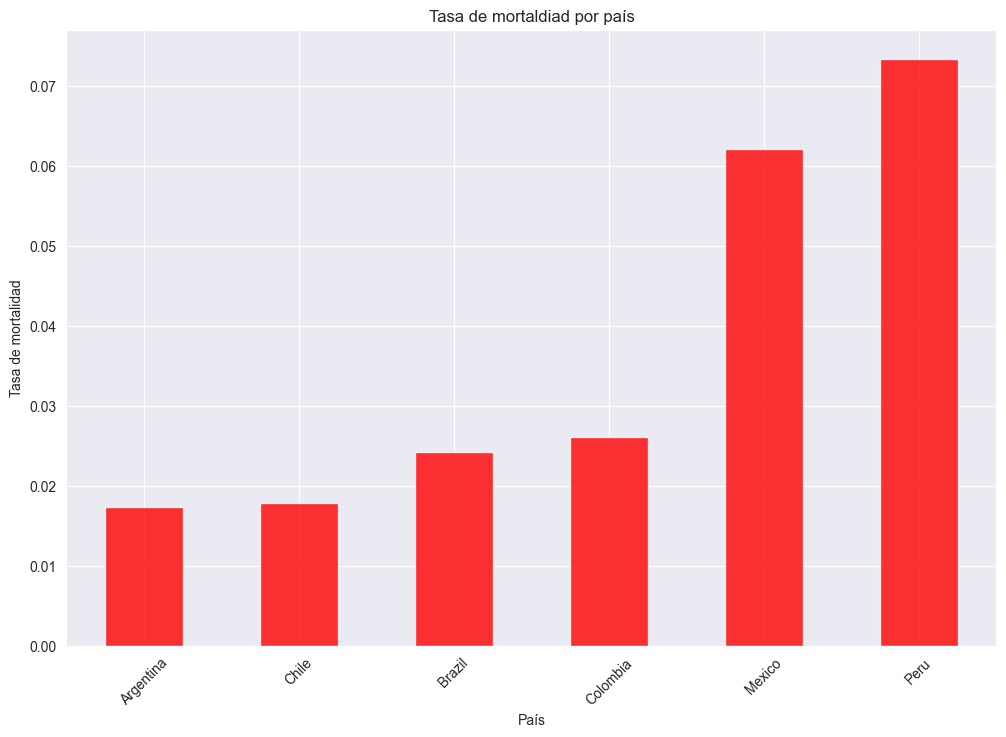

In [80]:
#Mortalidad por pais

df_paises_filtrados_3['ratio_mortalidad'] = df_paises_filtrados_3['cumulative_deceased'] / df_paises_filtrados_3['cumulative_confirmed']
mortalidad = df_paises_filtrados_3.groupby('country_name')['ratio_mortalidad'].last().sort_values()

plt.figure(figsize=(12,8))
mortalidad.plot(kind='bar', color='red', alpha= 0.8)
plt.xlabel('País')
plt.ylabel('Tasa de mortalidad')
plt.title('Tasa de mortaldiad por país')
plt.savefig('Tasa de mortalidad por país')
plt.xticks(rotation=45)

plt.show()

Ahora identificamos que la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos paises son los que más han sufrido por el fumar.

Sin embargo mientras Brasil aparece entre los países con mayor tasa de mortalidad, México aparece entre los ménores. 
Lo mismo pasas entre Chile (mayor) y Argentina (menor)

Por lo que dificilmente pueda entenderse una correlación entre Situaciones Preexistentes y Mortalidad por Covid. 

Text(0.5, 1.0, 'Evolución de la mortalidad en Latinoamérica')

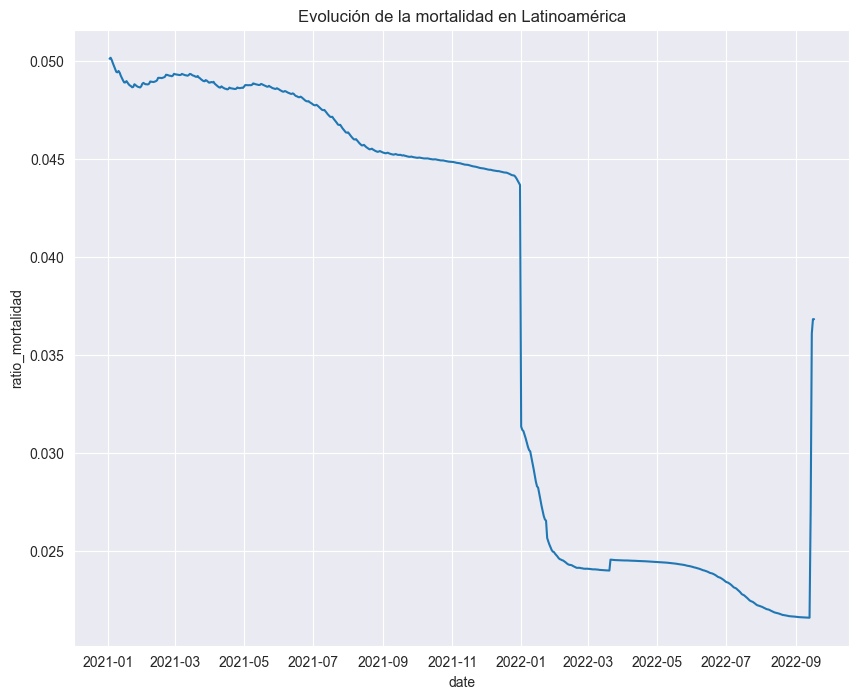

In [81]:
#Evolución de la mortalidad en Latinoamérica

fig, ax = plt.subplots(figsize=(10,8))

sns.lineplot(data=df_paises_filtrados_3, x='date', y='ratio_mortalidad', estimator='mean', errorbar=None)
plt.title('Evolución de la mortalidad en Latinoamérica')

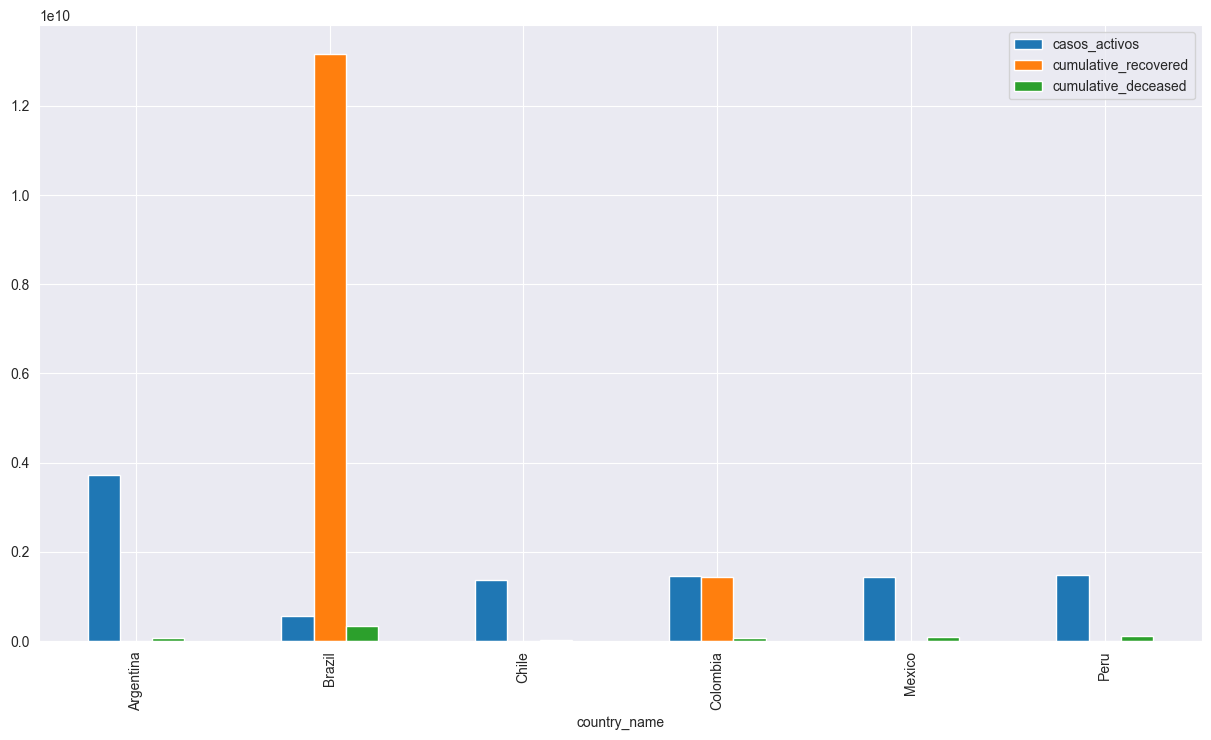

In [83]:
#Comparación de la Situación Actual (Contexto de los datos) 

situacion_actual= df_paises_filtrados_3.groupby('country_name').sum()[['casos_activos','cumulative_recovered','cumulative_deceased']]

situacion_actual.plot(kind='bar', figsize=(15,8))

plt.show()

In [86]:
df_paises_filtrados_3

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    5032.183871   
2022-09-15           PE           PE         Peru    5032.183871   
2022-09-16           PE           PE         Peru    5032.183871   
2022-09-17           PE           PE         Peru    5032.183871   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    197.233871          2.576906e+06        188954.366129   
2022-09-15    197.233871          2.576906e+06        188954.366129   
2022-09-16    197.233871          2.576906e+06        188954.366129   
2022-09-17    197.233871          2.576906e+06        188954.366129   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  comorbidity_mortality_rate  new_recovered  \
date                         ...                                              
2021-01-02       19523766.0  ...                        15.8            0.0   
2021-01-03       19523766.0  ...                        15.8            0.0   
2021-01-04       19523766.0  ...                        15.8            0.0   
2021-01-05       19523766.0  ...                        15.8            0.0   
2021-01-06       19523766.0  ...                        15.8            0.0   
...                     ...  ...                         ...            ...   
2022-09-13       14450757.0  ...                        12.6            0.0   
2022-09-14       14450757.0  ...                        12.6            0.0   
2022-09-15       14450757.0  ...                        12.6            0.0   
2022-09-16       14450757.0  ...                        12.6            0.0   
2022-09-17       14450757.0  ...                        12.6            0.0   

            cumulative_recovered  casos_activos  tasa_crecimiento  \
date                                                                
2021-01-02                   0.0   1.623946e+06               NaN   
2021-01-03                   0.0   1.628723e+06          0.295337   
2021-01-04                   0.0   1.642519e+06     

In [87]:
valores_nulos = df_paises_filtrados_3.isnull().sum()[df_paises_filtrados_3.isnull().sum()>0] 
print(valores_nulos)
print(np.shape(df_paises_filtrados_3))

tasa_crecimiento    1
dtype: int64
(3744, 56)


In [88]:
df_paises_filtrados_3['tasa_crecimiento'].fillna(method='ffill', inplace=True)

# Verificar que ya no hay valores nulos
print(df_paises_filtrados_3.isnull().sum())

# Comprobar las dimensiones del DataFrame después de rellenar los valores nulos
print(np.shape(df_paises_filtrados_3))

location_key                             0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_age_70_79                     0
population_

C:\Users\User\AppData\Local\Temp\ipykernel_2556\1420780012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_paises_filtrados_3['tasa_crecimiento'].fillna(method='ffill', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_2556\1420780012.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_paises_filtrados_3['tasa_crecimiento'].fillna(method='ffill', inplace=True)


In [90]:
df_paises_filtrados_3.to_csv('df_paises_filtrados_dashboard.csv')

In [ ]:
import pandas as pd

df_paises_filtrados_3 = pd.read_csv(r"C:\Users\Documents\veronica\cursos\DAtAANALYDTIC\M4\PI_4\df_paises_filtrados_dashboard.csv")